# Initial Attempts (please disregard)

In [1]:
import numpy as np
import math

def create_sinusoidal_image_set():
    """
    Returns a list of 12 synthetic 'images', each shaped [3, 3, 3].
    Dimension meaning:
      - images[t][row, col, channel]
        where t in [0..11] for each 'month'
        channel: 0=R, 1=G, 2=B
    Three special pixels: (0,0), (1,1), (2,2) follow a sinusoid over the 12 time steps.
    The other 6 pixels are random each month.
    """
    num_time_steps = 12
    height, width, channels = 3, 3, 3

    # Amplitude and offset for the sinusoidal pattern
    # We'll keep them 8-bit in [0..255], e.g. center=128, amplitude=50
    center_val = 128
    amplitude = 50

    # We'll store the 12 images in a list
    images = []

    for t in range(num_time_steps):
        # Create a blank image of shape 3x3x3
        # We'll fill with random values first
        img = np.random.randint(
            low=0, high=256, size=(height, width, channels), dtype=np.uint8
        )

        # For the three special pixels, do a sinusoid for each channel
        # Let's do the same wave for R, G, B, but you could shift phases if you want
        # wave_value = center_val + amplitude * sin(2π * t / 12)
        wave = center_val + amplitude * math.sin(2 * math.pi * t / num_time_steps)

        # Convert to integer
        wave_val = int(round(wave))

        # The 3 special pixels
        special_pixels = [(0, 0), (1, 1), (2, 2)]
        for (r, c) in special_pixels:
            # Set R, G, B to wave_val
            img[r, c, 0] = wave_val   # R
            img[r, c, 1] = wave_val   # G
            img[r, c, 2] = wave_val   # B

        images.append(img)

    return images

# ---- Example usage: ----
if __name__ == "__main__":
    images_3x3 = create_sinusoidal_image_set()

    # Let's print out some info:
    print(f"Number of images: {len(images_3x3)}")
    print("Shape of each image:", images_3x3[0].shape)
    print("\nExample of image[0]:\n", images_3x3[0])
    print("\n...and so on. The 3 special pixels should follow a sinus wave over time.")


Number of images: 12
Shape of each image: (3, 3, 3)

Example of image[0]:
 [[[128 128 128]
  [100 187 122]
  [138 197  62]]

 [[128  53  34]
  [128 128 128]
  [250 119  51]]

 [[140 107 208]
  [ 46  76  88]
  [128 128 128]]]

...and so on. The 3 special pixels should follow a sinus wave over time.


In [2]:
import os
import math
import numpy as np
from PIL import Image

def create_sinusoidal_image_set():
    """
    Creates 12 synthetic images (3×3, RGB):
      - 3 'special' pixels at (0,0), (1,1), (2,2) follow a sinusoidal wave over 12 months.
      - Other 6 pixels are random each month.

    Returns:
      A list of length 12, each element is a NumPy array of shape [3,3,3] in uint8.
    """
    num_time_steps = 12
    height, width, channels = 3, 3, 3

    # Sinusoid amplitude & center for the special pixels
    center_val = 128
    amplitude = 50

    # Container for all monthly images
    images = []

    for t in range(num_time_steps):
        # Create a random 3×3×3 array for the base image
        img = np.random.randint(low=0, high=256, size=(height, width, channels), dtype=np.uint8)

        # Compute the sinusoidal value for this time step
        # wave(t) = center_val + amplitude * sin(2π * t / 12)
        wave = center_val + amplitude * math.sin(2 * math.pi * t / num_time_steps)
        wave_val = int(round(wave))

        # The 3 special pixels
        special_pixels = [(0, 0), (1, 1), (2, 2)]
        for (r, c) in special_pixels:
            # Assign R, G, B channels the same sinusoidal value
            img[r, c, 0] = wave_val  # R
            img[r, c, 1] = wave_val  # G
            img[r, c, 2] = wave_val  # B

        images.append(img)
    return images

def save_images_as_png(images, out_dir="toy_data"):
    """
    Saves each image (NumPy array) in 'images' as PNG into 'out_dir'.
    """
    os.makedirs(out_dir, exist_ok=True)
    for i, img_arr in enumerate(images):
        # Convert array -> PIL Image (must specify 'RGB' mode)
        pil_img = Image.fromarray(img_arr, mode='RGB')
        fname = f"{out_dir}/month_{i+1}.png"
        pil_img.save(fname)
        print(f"Saved {fname}")

# ---------------------
# Example usage
# ---------------------
if __name__ == "__main__":
    # 1. Create 12 synthetic 3×3 RGB images
    images_3x3 = create_sinusoidal_image_set()

    # 2. Save them as PNG files in 'toy_data/' folder
    save_images_as_png(images_3x3, out_dir="toy_data")

    # After running:
    #  - The "toy_data/" folder will contain:
    #     month_1.png, month_2.png, ..., month_12.png
    #  - Each is a 3×3 color image, with 3 special "sinusoidal" pixels.


Saved toy_data/month_1.png
Saved toy_data/month_2.png
Saved toy_data/month_3.png
Saved toy_data/month_4.png
Saved toy_data/month_5.png
Saved toy_data/month_6.png
Saved toy_data/month_7.png
Saved toy_data/month_8.png
Saved toy_data/month_9.png
Saved toy_data/month_10.png
Saved toy_data/month_11.png
Saved toy_data/month_12.png


In [ ]:
import os
import csv
from PIL import Image

def extract_features_from_pngs(input_dir="toy_data", output_csv="pixel_features.csv"):
    """
    Reads each PNG named 'month_1.png'..'month_12.png' in `input_dir`.
    For each pixel (3x3 grid):
      - row, col (1-based indices)
      - R, G, B
      - 'Month' (integer, 1..12)

    Exports all rows into `output_csv`.
    """

    # Prepare a list of rows for CSV
    # Each row is [Month, Row, Col, R, G, B]
    data_rows = []

    # We'll assume the naming scheme: month_i.png for i in [1..12]
    num_months = 12
    for month in range(1, num_months + 1):
        fname = f"month_{month}.png"
        path = os.path.join(input_dir, fname)

        if not os.path.isfile(path):
            print(f"Warning: {path} not found. Skipping.")
            continue

        # Open the image with PIL
        img = Image.open(path).convert('RGB')  # ensure RGB mode
        width, height = img.size
        # We expect 3x3
        if width != 3 or height != 3:
            print(f"Warning: {path} is not 3x3. Found {width}x{height}. Skipping or adjusting code.")
            # But let's continue anyway

        # Loop over each pixel
        for r in range(height):      # r in [0..2]
            for c in range(width):   # c in [0..2]
                R, G, B = img.getpixel((c, r))
                # Convert to 1-based indexing for row/col
                row_idx = r + 1
                col_idx = c + 1
                # Add a record
                data_rows.append([
                    month,       # Month
                    row_idx,     # Row
                    col_idx,     # Col
                    R, G, B
                ])

    # Write out to CSV
    with open(output_csv, mode='w', newline='') as f:
        writer = csv.writer(f)
        # Header
        writer.writerow(["Month", "Row", "Col", "R", "G", "B"])
        writer.writerows(data_rows)

    print(f"Exported features to {output_csv} with {len(data_rows)} rows.")

# ---------------
# Example usage
# ---------------
if __name__ == "__main__":
    extract_features_from_pngs(
        input_dir="toy_data",         # folder with month_1.png ... month_12.png
        output_csv="pixel_features.csv"  # output CSV
    )


Exported features to pixel_features.csv with 108 rows.


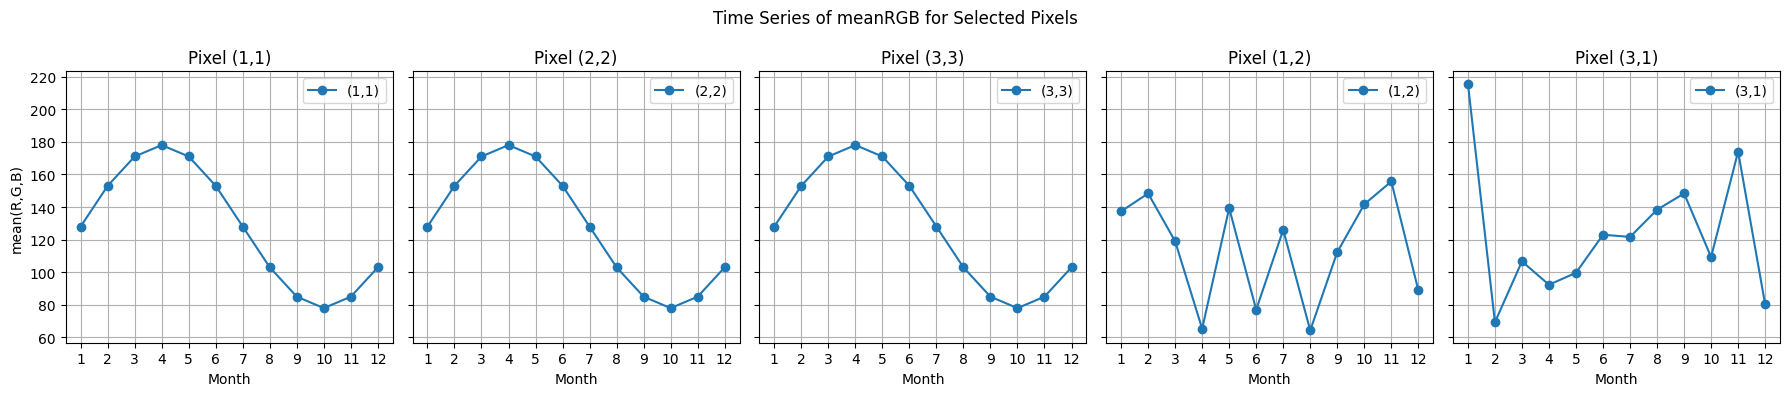

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_sin_vs_random(csv_path="/content/pixel_features.csv"):
    """
    Reads 'pixel_features.csv' with columns: Month, Row, Col, R, G, B.
    Plots time series for the 3 'sinusoidal' pixels (1,1), (2,2), (3,3)
    plus 2 random pixels.
    """

    if not os.path.isfile(csv_path):
        print(f"Error: {csv_path} not found.")
        return

    # 1. Read CSV into a Pandas DataFrame
    df = pd.read_csv(csv_path)

    # 2. Create a small function to compute "brightness"
    #    or average of R/G/B for each row.
    def mean_rgb(row):
        return (row["R"] + row["G"] + row["B"]) / 3.0

    df["meanRGB"] = df.apply(mean_rgb, axis=1)

    # 3. Identify the special "sinusoidal" pixels
    sinusoidal_pixels = [(1,1), (2,2), (3,3)]
    # Also pick two random ones (your choice)
    random_pixels = [(1,2), (3,1)]  # or any other row,col in [1..3]

    # 4. We'll store each pixel's data in a dictionary:
    #    pixel_data[(row,col)] = DataFrame subset
    pixel_data = {}
    for (r,c) in sinusoidal_pixels + random_pixels:
        sub = df[(df["Row"]==r) & (df["Col"]==c)].copy()
        # Sort by Month to ensure correct order
        sub.sort_values("Month", inplace=True)
        pixel_data[(r,c)] = sub

    # 5. Plot
    #    We'll create one subplot per pixel, for 5 total subplots.
    #    You can adapt the layout as needed.
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18,4), sharey=True)
    fig.suptitle("Time Series of meanRGB for Selected Pixels")

    # Collect all pixels in a single list
    all_pixels = sinusoidal_pixels + random_pixels
    for i, (r,c) in enumerate(all_pixels):
        ax = axs[i]
        sub = pixel_data[(r,c)]
        # Plot "Month" vs "meanRGB"
        ax.plot(sub["Month"], sub["meanRGB"], marker='o', label=f"({r},{c})")
        ax.set_title(f"Pixel ({r},{c})")
        ax.set_xlabel("Month")
        # Only label Y axis once for clarity
        if i == 0:
            ax.set_ylabel("mean(R,G,B)")
        ax.set_xticks(range(1,13))  # months 1..12
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

# -----------
# Example usage
# -----------
if __name__ == "__main__":
    plot_sin_vs_random("/content/pixel_features.csv")


ts_data shape: torch.Size([1, 12, 3]) 
 tensor([[[128., 128., 128.],
         [153., 153., 153.],
         [171., 171., 171.],
         [178., 178., 178.],
         [171., 171., 171.],
         [153., 153., 153.],
         [128., 128., 128.],
         [103., 103., 103.],
         [ 85.,  85.,  85.],
         [ 78.,  78.,  78.],
         [ 85.,  85.,  85.],
         [103., 103., 103.]]])

Output shape: torch.Size([1, 12, 3])
Output tensor:
 tensor([[[ 1.3151, -1.1079, -0.2072],
         [ 1.3149, -1.1082, -0.2067],
         [ 1.3148, -1.1085, -0.2063],
         [ 1.3146, -1.1087, -0.2059],
         [ 1.3145, -1.1090, -0.2055],
         [ 1.3144, -1.1092, -0.2052],
         [ 1.3143, -1.1094, -0.2049],
         [ 1.3142, -1.1095, -0.2046],
         [ 1.3141, -1.1097, -0.2044],
         [ 1.3140, -1.1097, -0.2043],
         [ 1.3140, -1.1098, -0.2042],
         [ 1.3140, -1.1098, -0.2042]]], grad_fn=<NativeLayerNormBackward0>)


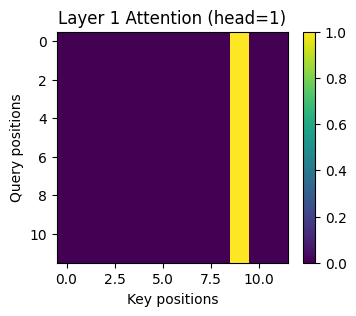

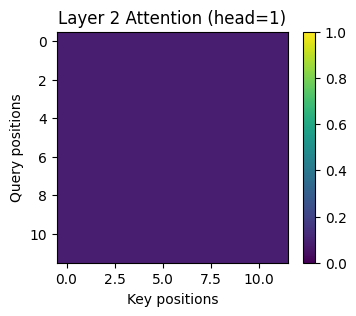

In [ ]:
import math
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

#################################
# 1. READ CSV & EXTRACT TIME SERIES
#################################

def load_time_series(csv_path="/content/pixel_features.csv", row=1, col=1):
    df = pd.read_csv(csv_path)
    sub = df[(df["Row"] == row) & (df["Col"] == col)].copy()
    sub.sort_values("Month", inplace=True)
    arr = sub[["R","G","B"]].values  # shape => (12,3)
    ts_tensor = torch.tensor(arr, dtype=torch.float).unsqueeze(0)  # => (1,12,3)
    return ts_tensor


#################################
# 2. SIMPLE POSITIONAL ENCODING
#################################

class SimplePosEncoding(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        # x: (B,T,D)
        B, T, D = x.shape
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1)*(i+1)/30.0)
                x[:, t, i] += offset
        return x


#########################################
# 3. MULTI-HEAD SELF-ATTENTION w/ attn
#########################################

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

        self.last_attn = None

    def forward(self, x):
        B, T, _ = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)

        def split_heads(tensor):
            return tensor.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        Q = split_heads(Q)
        K = split_heads(K)
        V = split_heads(V)

        d_k = self.head_dim
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)  # (B,num_heads,T,T)
        attn = torch.softmax(scores, dim=-1)  # (B,num_heads,T,T)
        out = torch.matmul(attn, V)           # (B,num_heads,T,head_dim)

        # Merge heads
        out = out.transpose(1,2).contiguous().view(B, T, self.d_model)
        out = self.out_linear(out)

        self.last_attn = attn.detach().cpu()  # store for inspection
        return out


#########################################
# 4. COMPLETE “TRANSFORMER BLOCK” (with skip)
#########################################

class TransformerBlock(nn.Module):
    """
    A more canonical Transformer block:
      1) x_attn = SelfAttn( x )
      2) x = x + x_attn
      3) x = LayerNorm(x)
      4) x_ff = FeedForward( x )
      5) x = x + x_ff
      6) x = LayerNorm(x)
    """
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)

        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

        self.last_attn = None

    def forward(self, x):
        # 1) Self-attn
        x_attn = self.attn(x)
        # 2) Residual
        x = x + x_attn
        # 3) Norm
        x = self.norm1(x)

        self.last_attn = self.attn.last_attn  # store

        # 4) FF
        x_ff = self.ff(x)
        # 5) Residual
        x = x + x_ff
        # 6) Norm
        x = self.norm2(x)

        return x


######################################
# 5. MINI-TRANSFORMER (2 LAYERS)
######################################

class MiniTransformer(nn.Module):
    def __init__(self, d_model=3, num_heads=1, ff_hidden=64, num_layers=2):
        super().__init__()
        self.pos_encoding = SimplePosEncoding()
        self.layers = nn.ModuleList(
            [TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)]
        )
        self.last_attns = []

    def forward(self, x):
        x = self.pos_encoding(x)
        self.last_attns = []
        for layer in self.layers:
            x = layer(x)
            self.last_attns.append(layer.last_attn)
        return x


######################################
# 6. MAIN DEMO
######################################

def main(csv_path="/content/pixel_features.csv"):
    # 1. Load 12-month time series for pixel(1,1), => (1,12,3)
    ts_data = load_time_series(csv_path, row=1, col=1)
    print("ts_data shape:", ts_data.shape, "\n", ts_data)

    # 2. Build the more typical mini-transformer (with skip connections)
    model = MiniTransformer(d_model=3, num_heads=1, ff_hidden=8, num_layers=2)

    # 3. Forward pass
    out = model(ts_data)
    print("\nOutput shape:", out.shape)
    print("Output tensor:\n", out)

    # 4. Visualize attention in each layer
    for layer_idx, attn_mat in enumerate(model.last_attns):
        # attn_mat shape => (B=1, num_heads=1, T=12, T=12)
        attn_mat = attn_mat.squeeze(0).squeeze(0)  # => (12,12)
        plt.figure(figsize=(4,3))
        plt.imshow(attn_mat, cmap='viridis', vmin=0, vmax=1)
        plt.colorbar()
        plt.title(f"Layer {layer_idx+1} Attention (head=1)")
        plt.xlabel("Key positions")
        plt.ylabel("Query positions")
        plt.show()


if __name__ == "__main__":
    main()


In [ ]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt

####################################
# 1. DATASET
####################################

class PixelTimeSeriesDataset(Dataset):
    """
    Reads pixel_features.csv with columns [Month, Row, Col, R, G, B].
    We have 9 unique (Row,Col) in a 3x3 image.
    For each (row,col), we gather 12 months => shape (12,3).
    Label = 0 if (row,col) is one of the diagonal (1,1),(2,2),(3,3),
            else label = 1.
    """
    def __init__(self, csv_path="/content/pixel_features.csv"):
        super().__init__()
        df = pd.read_csv(csv_path)
        # We'll group by (Row,Col)
        self.samples = []
        grouped = df.groupby(["Row","Col"])
        for (r,c), group in grouped:
            # Sort by Month, gather R,G,B => shape(12,3)
            group_sorted = group.sort_values("Month")
            arr = group_sorted[["R","G","B"]].to_numpy()  # shape => (12,3)
            ts_tensor = torch.tensor(arr, dtype=torch.float)
            # Determine label
            # Class 0 if diagonal => r==c, else 1
            label = 0 if r == c else 1
            self.samples.append((ts_tensor, label))

    def __len__(self):
        return len(self.samples)  # 9 total

    def __getitem__(self, idx):
        ts_data, label = self.samples[idx]
        # shape is (12,3), label is int
        return ts_data, torch.tensor(label, dtype=torch.long)


####################################
# 2. SIMPLE POSITIONAL ENCODING
####################################
class SimplePosEncoding(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        # x shape: (batch_size, seq_len=12, d_model=3)
        B, T, D = x.shape
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1)*(i+1)/30.0)
                x[:, t, i] += offset
        return x

####################################
# 3. MULTI-HEAD SELF-ATTENTION
####################################

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        # x: (B,T,d_model)
        B, T, _ = x.shape
        Q = self.q_linear(x)  # => (B,T,d_model)
        K = self.k_linear(x)
        V = self.v_linear(x)

        # Reshape for multi-head
        def split_heads(tensor):
            return tensor.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        Q = split_heads(Q)
        K = split_heads(K)
        V = split_heads(V)

        d_k = self.head_dim
        # Q@K^T => (B,num_heads,T,T)
        scores = torch.matmul(Q, K.transpose(-2,-1)) / math.sqrt(d_k)
        attn = torch.softmax(scores, dim=-1)  # (B,num_heads,T,T)
        out = torch.matmul(attn, V)          # (B,num_heads,T,head_dim)

        # Merge heads
        out = out.transpose(1,2).contiguous().view(B, T, self.d_model)
        out = self.out_linear(out)
        return out

####################################
# 4. TRANSFORMER BLOCK (with skip)
####################################

class TransformerBlock(nn.Module):
    def __init__(self, d_model=3, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)

        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        # 1) self-attn
        x_attn = self.attn(x)
        # 2) skip + norm
        x = self.norm1(x + x_attn)

        # 3) feed-forward
        x_ff = self.ff(x)
        # 4) skip + norm
        x = self.norm2(x + x_ff)
        return x

####################################
# 5. MINI TRANSFORMER CLASSIFIER
####################################
class MiniTransformerClassifier(nn.Module):
    """
    - 2 layer Transformer
    - Then average pool over time steps
    - Then final linear -> 2-class output
    """
    def __init__(self, d_model=3, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2):
        super().__init__()
        self.posenc = SimplePosEncoding()
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)
        ])
        # classification head
        self.linear_out = nn.Linear(d_model, n_classes)

    def forward(self, x):
        # x shape: (B,T=12,d_model=3)
        x = self.posenc(x)
        for layer in self.layers:
            x = layer(x)
        # Now x => (B,T,d_model)
        # We'll average over T
        x_mean = x.mean(dim=1)  # => (B,d_model)
        logits = self.linear_out(x_mean)  # => (B,n_classes)
        return logits

####################################
# 6. MAIN: TRAIN/TEST
####################################
def main(csv_path="/content/pixel_features.csv"):
    # 1) Build the dataset of 9 samples
    dataset = PixelTimeSeriesDataset(csv_path)
    print("Total samples:", len(dataset))  # Should be 9

    # 2) Split train/test, e.g. 6 train, 3 test
    train_size = 6
    test_size = len(dataset) - train_size
    train_ds, test_ds = random_split(dataset, [train_size, test_size])

    # 3) Dataloaders
    train_loader = DataLoader(train_ds, batch_size=2, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=3, shuffle=False)

    # 4) Model
    model = MiniTransformerClassifier(
        d_model=3, num_heads=1, ff_hidden=8, num_layers=2, n_classes=2
    )
    print(model)

    # 5) Loss & optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-2)

    # 6) Training Loop
    epochs = 20
    for ep in range(1, epochs+1):
        model.train()
        total_loss = 0.0
        for batch_x, batch_y in train_loader:
            # batch_x => shape (B,T=12,3)
            # batch_y => shape (B)
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * batch_x.size(0)

        avg_loss = total_loss / len(train_loader.dataset)

        # Evaluate on test
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                logits = model(batch_x)
                preds = torch.argmax(logits, dim=1)
                correct += (preds == batch_y).sum().item()
                total += batch_y.size(0)

        acc = correct/total if total>0 else 0
        print(f"Epoch {ep}, Train Loss={avg_loss:.4f}, Test Acc={acc:.2f}")

if __name__ == "__main__":
    main()


Total samples: 9
MiniTransformerClassifier(
  (posenc): SimplePosEncoding()
  (layers): ModuleList(
    (0-1): 2 x TransformerBlock(
      (attn): MultiHeadSelfAttention(
        (q_linear): Linear(in_features=3, out_features=3, bias=True)
        (k_linear): Linear(in_features=3, out_features=3, bias=True)
        (v_linear): Linear(in_features=3, out_features=3, bias=True)
        (out_linear): Linear(in_features=3, out_features=3, bias=True)
      )
      (norm1): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=3, out_features=8, bias=True)
        (1): ReLU()
        (2): Linear(in_features=8, out_features=3, bias=True)
      )
      (norm2): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
    )
  )
  (linear_out): Linear(in_features=3, out_features=2, bias=True)
)
Epoch 1, Train Loss=0.6236, Test Acc=1.00
Epoch 2, Train Loss=0.5349, Test Acc=1.00
Epoch 3, Train Loss=0.4389, Test Acc=1.00
Epoch 4, Train Loss=0.3865, Te

In [ ]:
import math
import random
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
import os
import matplotlib.pyplot as plt

####################################################
# 1. SYNTHETIC DATA GENERATION (LARGER THAN 3x3)
####################################################

def generate_sinusoidal_or_random_dataset(
    out_csv="big_pixel_features.csv",
    rows=20,
    cols=25,
    timesteps=12
):
    """
    Creates a CSV with columns [Month,Row,Col,R,G,B].
    For each pixel in a rows×cols grid:
      - If it's "sinusoidal" class => wave for R,G,B across timesteps.
      - If it's "random" class => random R,G,B across timesteps.
    We'll label ~half the pixels sinusoidal, half random, but we won't store
    the label in the CSV. We'll rely on a dataset logic to define:
       class=0 => sinusoidal, class=1 => random.
    """
    # We'll pick half of them to be sinusoidal, half random
    total_pixels = rows * cols
    half = total_pixels // 2
    sinusoidal_indices = set(random.sample(range(total_pixels), half))
    # If index in sinusoidal_indices => sinusoidal else random

    data_rows = []
    index = 0
    for r in range(1, rows+1):
        for c in range(1, cols+1):
            # Decide class
            is_sin = (index in sinusoidal_indices)
            index += 1

            # For each of the timesteps (like "months"), we create R,G,B
            for t in range(1, timesteps+1):
                if is_sin:
                    # wave(t) = 128 + 50*sin(2π * t / timesteps)
                    val = 128 + 50 * math.sin(2*math.pi * (t/timesteps))
                    # We'll set R=G=B=val for simplicity
                    R = G = B = val
                else:
                    # random [0..255]
                    R = random.randint(0,255)
                    G = random.randint(0,255)
                    B = random.randint(0,255)
                data_rows.append([t, r, c, R, G, B])

    df = pd.DataFrame(data_rows, columns=["Month","Row","Col","R","G","B"])
    df.to_csv(out_csv, index=False)
    print(f"Saved synthetic dataset to {out_csv} with shape={df.shape}")

####################################################
# 2. SOLID DATASET CLASS (READING big_pixel_features.csv)
####################################################
class PixelTimeSeriesDataset(Dataset):
    """
    Expects a CSV with columns [Month,Row,Col,R,G,B].
    We interpret each (Row,Col) as one pixel. We gather `timesteps` rows => shape(12,3).
    We define class=0 if that pixel is "sinusoidal", else 1 if random.
      => We do *not* store the label in CSV. We'll infer it:
         If the wave is perfectly in [128+50*sin(...)] for each month => class0
         Otherwise => class1
    But to keep it simpler, we'll rely on a small numeric tolerance for the wave check.
    """
    def __init__(self, csv_path, timesteps=12):
        super().__init__()
        self.timesteps = timesteps

        self.df = pd.read_csv(csv_path)
        # We'll group by (Row,Col)
        # Each group => shape(timesteps, 6 columns)
        grouped = self.df.groupby(["Row","Col"])

        self.samples = []
        wave_cache = {}  # store precomputed wave
        for (r,c), group in grouped:
            group_sorted = group.sort_values("Month")
            arr = group_sorted[["R","G","B"]].to_numpy()  # shape (timesteps, 3)

            # Determine label by checking if it's "close" to a perfect sine wave
            # We'll measure mean absolute difference from the ideal wave
            # wave(t) = 128+50*sin(2π*(t/timesteps)), t=1..12
            # We'll check only the first channel R for simplicity
            # or do average of R,G,B
            wave_vals = []
            for t in range(1, timesteps+1):
                ideal = 128 + 50*math.sin(2*math.pi*(t/timesteps))
                wave_vals.append(ideal)
            wave_vals = torch.tensor(wave_vals)

            Rvals = torch.tensor(arr[:,0], dtype=torch.float)  # shape(timesteps)
            diff = torch.mean(torch.abs(Rvals - wave_vals))
            # If diff < 5 => class0, else class1
            label = 0 if diff < 5.0 else 1

            ts_tensor = torch.tensor(arr, dtype=torch.float)  # (timesteps,3)
            self.samples.append((ts_tensor, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        ts_data, label = self.samples[idx]
        return ts_data, torch.tensor(label, dtype=torch.long)


####################################################
# 3. TRANSFORMER MODEL (with skip) + CLASS HEAD
####################################################
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        # x: (B,T,D)
        B,T,D = x.shape
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1)*(i+1)/30.0)
                x[:, t, i] += offset
        return x

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads==0
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model//num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B,T,_ = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)

        def split_heads(tensor):
            return tensor.view(B,T,self.num_heads,self.head_dim).transpose(1,2)
        Q=split_heads(Q)
        K=split_heads(K)
        V=split_heads(V)

        scores = torch.matmul(Q, K.transpose(-2,-1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)  # (B,num_heads,T,T)
        out = torch.matmul(attn, V)           # (B,num_heads,T,head_dim)

        out = out.transpose(1,2).contiguous().view(B,T,self.d_model)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model=3, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)

        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x_attn = self.attn(x)
        x = x + x_attn
        x = self.norm1(x)
        x_ff = self.ff(x)
        x = x + x_ff
        x = self.norm2(x)
        return x

class MiniTransformerClassifier(nn.Module):
    def __init__(self, d_model=3, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2):
        super().__init__()
        self.posenc = SimplePosEncoding()
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)
        ])
        self.classifier = nn.Linear(d_model, n_classes)

    def forward(self, x):
        # x: (B,T=12,D=3)
        x = self.posenc(x)
        for layer in self.layers:
            x = layer(x)
        # pool over T => mean
        x_mean = x.mean(dim=1)
        logits = self.classifier(x_mean)
        return logits


####################################################
# 4. MAIN: BUILD DATA, TRAIN, SAVE, THEN LOAD & INFER
####################################################
def main():
    # PART A: GENERATE bigger CSV if not exist
    csv_path = "big_pixel_features.csv"
    if not os.path.isfile(csv_path):
        generate_sinusoidal_or_random_dataset(out_csv=csv_path, rows=20, cols=25, timesteps=12)

    # PART B: Build dataset & dataloaders
    dataset = PixelTimeSeriesDataset(csv_path, timesteps=12)
    print("Dataset length:", len(dataset))

    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

    # PART C: Create model
    model = MiniTransformerClassifier(d_model=3, num_heads=1, ff_hidden=16, num_layers=2, n_classes=2)
    print(model)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    # PART D: Train
    epochs = 10
    for ep in range(1, epochs+1):
        model.train()
        total_loss = 0.0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            logits = model(batch_x)  # (B,2)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()*batch_x.size(0)
        avg_loss = total_loss/len(train_loader.dataset)

        # Evaluate
        model.eval()
        correct, total = 0,0
        with torch.no_grad():
            for bx,by in test_loader:
                out = model(bx)
                preds = torch.argmax(out,dim=1)
                correct += (preds==by).sum().item()
                total += by.size(0)
        acc = correct/total if total>0 else 0
        print(f"Epoch {ep}, loss={avg_loss:.3f}, test_acc={acc:.2f}")

    # PART E: Save model
    torch.save(model.state_dict(), "transformer_model.pth")
    print("Saved model to transformer_model.pth")

    # PART F: Load model for inference
    # (just to demonstrate the usage)
    new_model = MiniTransformerClassifier(d_model=3, num_heads=1, ff_hidden=16, num_layers=2, n_classes=2)
    new_model.load_state_dict(torch.load("transformer_model.pth"))
    new_model.eval()
    print("Loaded model from transformer_model.pth for inference.")

    # PART G: Example "inference" on one sample
    # Let's pick e.g. row=10, col=10 => see how the model classifies it
    # We'll isolate that pixel from the dataset
    # We do so by building a single-batch input
    single_df = dataset.df[(dataset.df["Row"]==10) & (dataset.df["Col"]==10)].sort_values("Month")
    arr = single_df[["R","G","B"]].to_numpy()  # shape(12,3)
    sample_ts = torch.tensor(arr, dtype=torch.float).unsqueeze(0)  # => (1,12,3)

    with torch.no_grad():
        logits = new_model(sample_ts)
        pred_class = torch.argmax(logits, dim=1).item()
    print(f"Pixel(10,10) predicted class => {pred_class}  (0=sin,1=random)")

if __name__ == "__main__":
    main()


Saved synthetic dataset to big_pixel_features.csv with shape=(6000, 6)
Dataset length: 500
MiniTransformerClassifier(
  (posenc): SimplePosEncoding()
  (layers): ModuleList(
    (0-1): 2 x TransformerBlock(
      (attn): MultiHeadSelfAttention(
        (q_linear): Linear(in_features=3, out_features=3, bias=True)
        (k_linear): Linear(in_features=3, out_features=3, bias=True)
        (v_linear): Linear(in_features=3, out_features=3, bias=True)
        (out_linear): Linear(in_features=3, out_features=3, bias=True)
      )
      (norm1): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=3, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=3, bias=True)
      )
      (norm2): LayerNorm((3,), eps=1e-05, elementwise_affine=True)
    )
  )
  (classifier): Linear(in_features=3, out_features=2, bias=True)
)
Epoch 1, loss=0.848, test_acc=0.55
Epoch 2, loss=0.663, test_acc=0.55
Epoch 3, l

<ipython-input-15-e76c0f9c82e7>:264: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("transformer_model.pth"))


In [ ]:
df = pd.read_csv("big_pixel_features.csv")
pix_10_10 = df[(df["Row"]==10) & (df["Col"]==10)].sort_values("Month")
print(pix_10_10)

Rvals = pix_10_10["R"].to_numpy()
import math
wave = []
timesteps = 12
for t in range(1, timesteps+1):
    wave_val = 128 + 50*math.sin(2*math.pi*(t/timesteps))
    wave.append(wave_val)
diff = abs(Rvals - wave).mean()
print("Mean absolute diff:", diff)

#If diff < 5, the dataset labelled it as 0 (sinusoidal). Otherwise 1. Usually, if it’s random, diff might be large (like 50 or 60).
#so the model was correct

      Month  Row  Col      R      G      B
2808      1   10   10  233.0   41.0  245.0
2809      2   10   10  241.0   69.0   75.0
2810      3   10   10  165.0   62.0   47.0
2811      4   10   10   78.0   59.0   23.0
2812      5   10   10  183.0  104.0   74.0
2813      6   10   10   93.0  131.0   24.0
2814      7   10   10   88.0   75.0  129.0
2815      8   10   10  174.0  229.0   63.0
2816      9   10   10  156.0   17.0   40.0
2817     10   10   10   37.0   37.0   78.0
2818     11   10   10  106.0  143.0   52.0
2819     12   10   10   47.0  158.0  247.0
Mean absolute diff: 52.916666666666664


                             system:index    AOT  AOT_RETRIEVAL_ACCURACY  \
0  20240103T033139_20240103T033136_T48SYC   58.0                     0.0   
1  20240108T033121_20240108T033457_T48SYC   62.0                     0.0   
2  20240111T034121_20240111T034407_T48SYC    NaN                     0.0   
3  20240210T033901_20240210T033939_T48SYC   98.0                     0.0   
4  20240212T032849_20240212T033821_T48SYC  117.0                     0.0   

  AOT_RETRIEVAL_METHOD     B1     B11    B12     B2     B3     B4  ...  TCI_G  \
0          SEN2COR_DDV  228.0  1147.0  812.0  214.0  215.0  207.0  ...   22.0   
1          SEN2COR_DDV  283.0  1214.0  939.0  213.0  329.0  311.0  ...   34.0   
2          SEN2COR_DDV    NaN     NaN    NaN    NaN    NaN    NaN  ...    NaN   
3          SEN2COR_DDV  458.0  1021.0  708.0  334.0  394.0  414.0  ...   41.0   
4          SEN2COR_DDV  375.0  1271.0  883.0  322.0  324.0  339.0  ...   34.0   

   TCI_R  THIN_CIRRUS_PERCENTAGE  UNCLASSIFIED_PERCENTAG

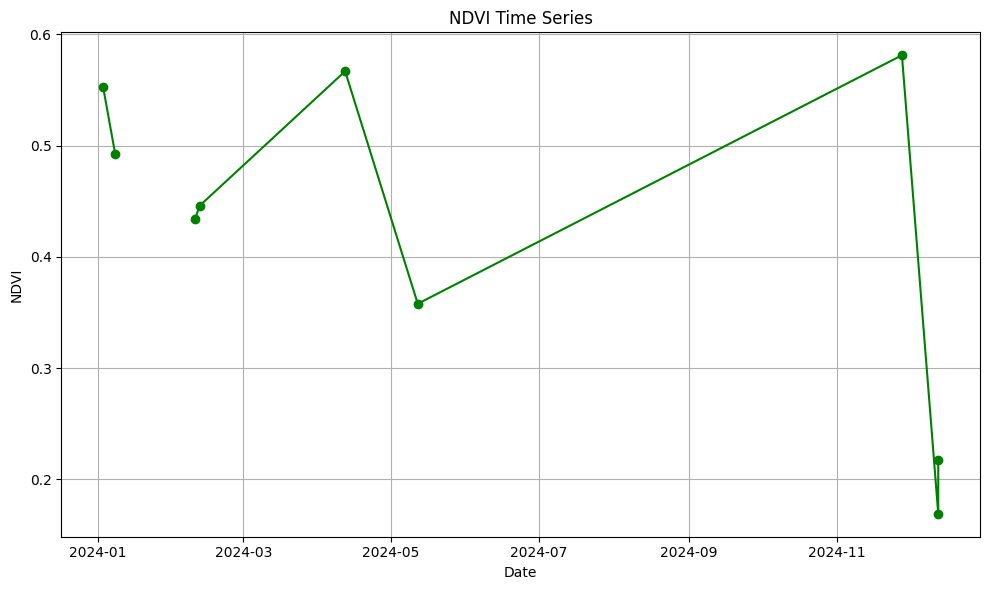

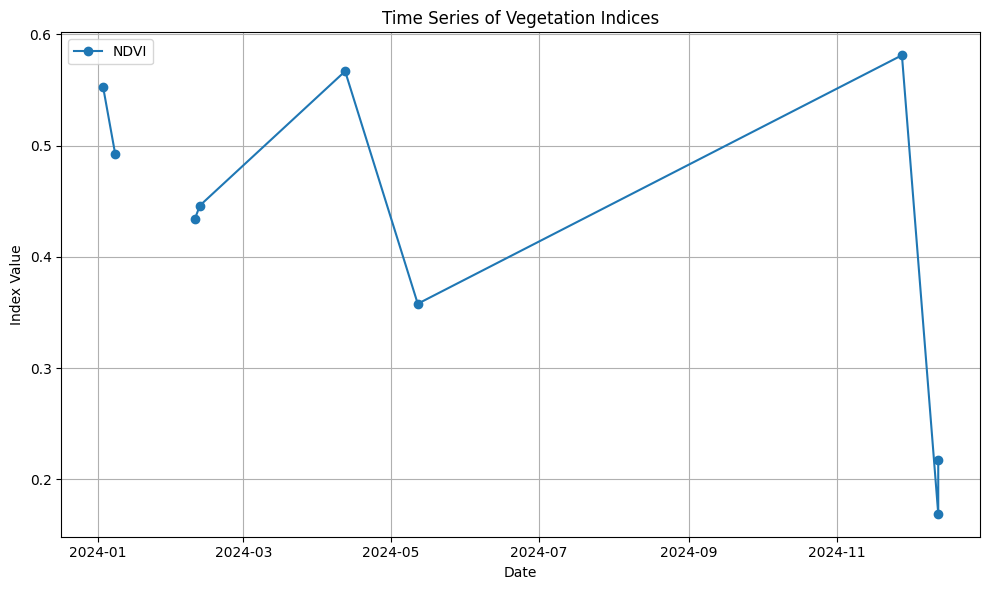

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
csv_path = "/content/TimeSeriesCSV1.csv"

# Read the CSV into a pandas DataFrame.
# Depending on your CSV file, you may need to adjust the delimiter (default is comma).
df = pd.read_csv(csv_path)

# Display the first few rows to inspect the data.
print(df.head())

# Convert the 'date' column to datetime.
# (Make sure the column name exactly matches; here we assume it is named 'date'.)
df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by date
df.sort_values('date', inplace=True)

# Option 1: Plot NDVI time series.
if 'NDVI' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['NDVI'], marker='o', linestyle='-', color='green')
    plt.xlabel('Date')
    plt.ylabel('NDVI')
    plt.title('NDVI Time Series')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'NDVI' not found in the CSV.")

# Option 2: Plot multiple indices if you wish.
# For example, if your CSV contains columns 'NDVI', 'EVI', and 'RVI':
indices = ['NDVI', 'EVI', 'RVI']  # Modify as needed.
available_indices = [col for col in indices if col in df.columns]

if available_indices:
    plt.figure(figsize=(10, 6))
    for col in available_indices:
        plt.plot(df['date'], df[col], marker='o', linestyle='-', label=col)
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.title('Time Series of Vegetation Indices')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("None of the desired index columns were found in the CSV.")


Above is preliminary and does not have explicity coordinates;

// Define the center point of the AOI
var center = ee.Geometry.Point([107.6711967, 33.6639574]);

// Define the AOI as a 640m x 640m square (64 pixels * 10m per pixel)
var AOI = center.buffer(320).bounds();

// Load the Sentinel-2 surface reflectance image collection
var S2 = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
  .filterBounds(AOI)
  .filterDate('2024-01-01', '2024-12-31') // Specify your date range
  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)); // Filter images with less than 20% cloud cover

// Function to mask clouds based on the QA60 band
function maskClouds(image) {
  var qa = image.select('QA60');
  var cloudBitMask = 1 << 10;
  var cirrusBitMask = 1 << 11;
  var mask = qa.bitwiseAnd(cloudBitMask).eq(0).and(
             qa.bitwiseAnd(cirrusBitMask).eq(0));
  return image.updateMask(mask);
}

// Function to calculate NDVI
function addNDVI(image) {
  var ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI');
  return image.addBands(ndvi);
}

// Apply cloud masking and NDVI calculation to the image collection
var S2_processed = S2.map(maskClouds).map(addNDVI);

// Extract NDVI time series for each pixel in the AOI
var ndviTimeSeries = S2_processed.select('NDVI').map(function(image) {
  return image.clip(AOI).sample({
    region: AOI,
    scale: 10,
    projection: 'EPSG:4326',
    geometries: true
  }).map(function(feature) {
    return feature.set('date', image.date().format('YYYY-MM-dd'));
  });
}).flatten();

// Export the time series data to a CSV file
Export.table.toDrive({
  collection: ndviTimeSeries,
  description: 'NDVI_TimeSeries',
  fileFormat: 'CSV'
});


                               system:index      NDVI        date  \
0  20240103T033139_20240103T033136_T48SYC_0  0.477833  2024-01-03   
1  20240103T033139_20240103T033136_T48SYC_1  0.478095  2024-01-03   
2  20240103T033139_20240103T033136_T48SYC_2  0.509248  2024-01-03   
3  20240103T033139_20240103T033136_T48SYC_3  0.509248  2024-01-03   
4  20240103T033139_20240103T033136_T48SYC_4  0.492424  2024-01-03   

                                                .geo  
0  {"geodesic":false,"type":"Point","coordinates"...  
1  {"geodesic":false,"type":"Point","coordinates"...  
2  {"geodesic":false,"type":"Point","coordinates"...  
3  {"geodesic":false,"type":"Point","coordinates"...  
4  {"geodesic":false,"type":"Point","coordinates"...  


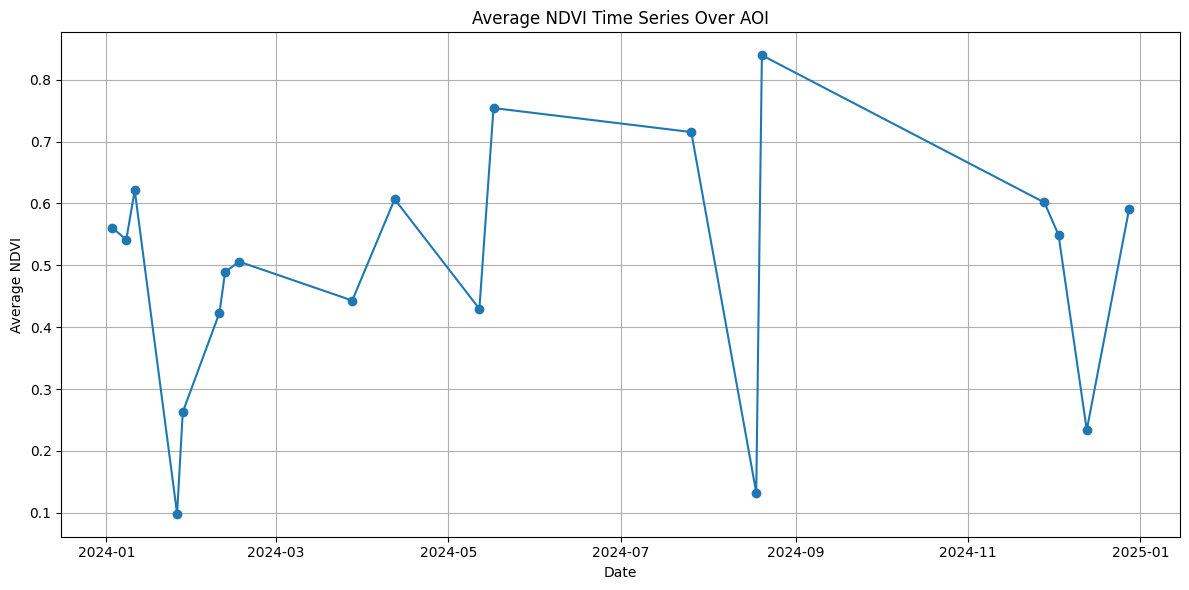

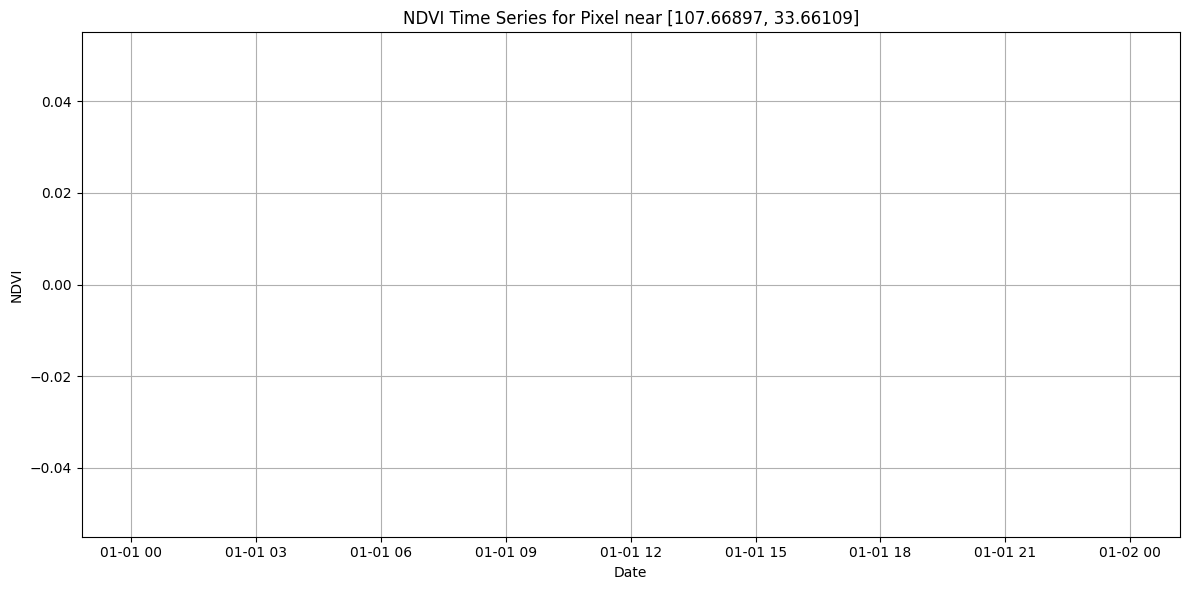

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Read the CSV file (adjust the file path/name as needed)
csv_file = '/content/NDVI_TimeSeries.csv'
df = pd.read_csv(csv_file)

# Inspect the first few rows
print(df.head())

# Convert the 'date' column to datetime format.
# Option 1: Let Pandas infer the format
df['date'] = pd.to_datetime(df['date'])

# Option 2 (if you prefer to specify the format explicitly):
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Option 1: Plot average NDVI for the entire AOI over time
df_grouped = df.groupby('date')['NDVI'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['date'], df_grouped['NDVI'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average NDVI')
plt.title('Average NDVI Time Series Over AOI')
plt.grid(True)
plt.tight_layout()
plt.show()

# Option 2: Plot NDVI time series for a specific pixel
# For example, if you want to see the time series for the pixel with a specific coordinate,
# you might filter by one of the coordinates (or a small range around it).

# Define a function to extract coordinates from the '.geo' column
def extract_coords(geo_str):
    try:
        geo = json.loads(geo_str)
        return geo['coordinates']
    except Exception:
        return [None, None]

# Create separate columns for longitude and latitude from the '.geo' column
df[['lon', 'lat']] = df['.geo'].apply(lambda g: pd.Series(extract_coords(g)))

# Define target coordinates (e.g., one of the pixels in the AOI)
target_lon = 107.66897
target_lat = 33.66109
tol = 1e-6  # tolerance for floating point comparison

# Filter rows that match the target coordinates within the specified tolerance
df_pixel = df[(abs(df['lon'] - target_lon) < tol) & (abs(df['lat'] - target_lat) < tol)]

# Sort by date
df_pixel = df_pixel.sort_values('date')

plt.figure(figsize=(12, 6))
plt.plot(df_pixel['date'], df_pixel['NDVI'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title(f'NDVI Time Series for Pixel near [{target_lon}, {target_lat}]')
plt.grid(True)
plt.tight_layout()
plt.show()


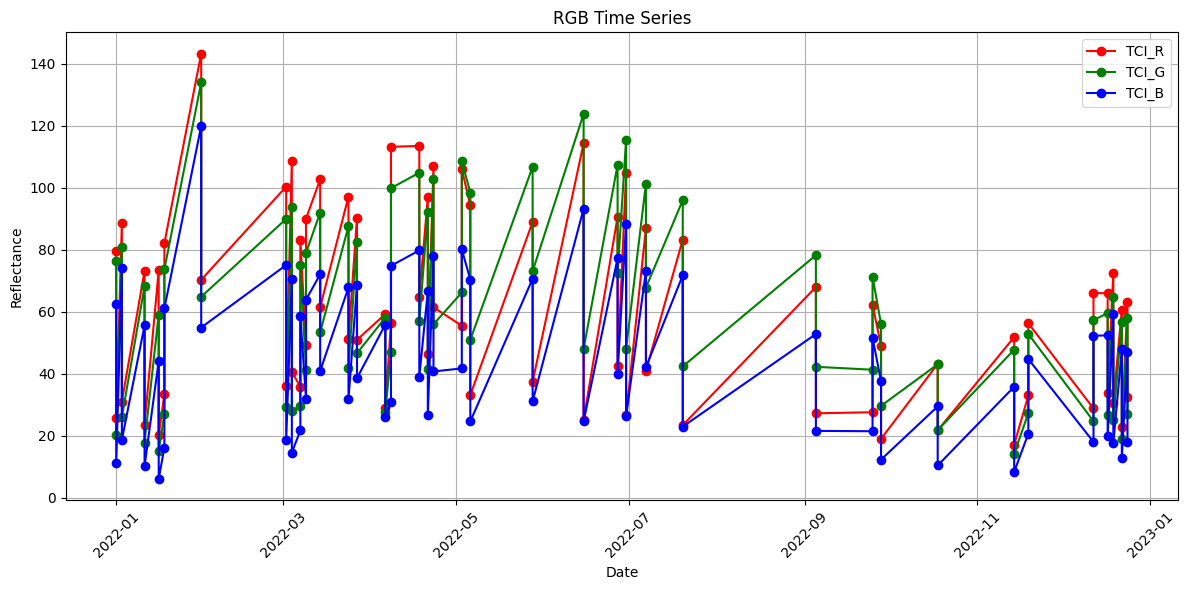

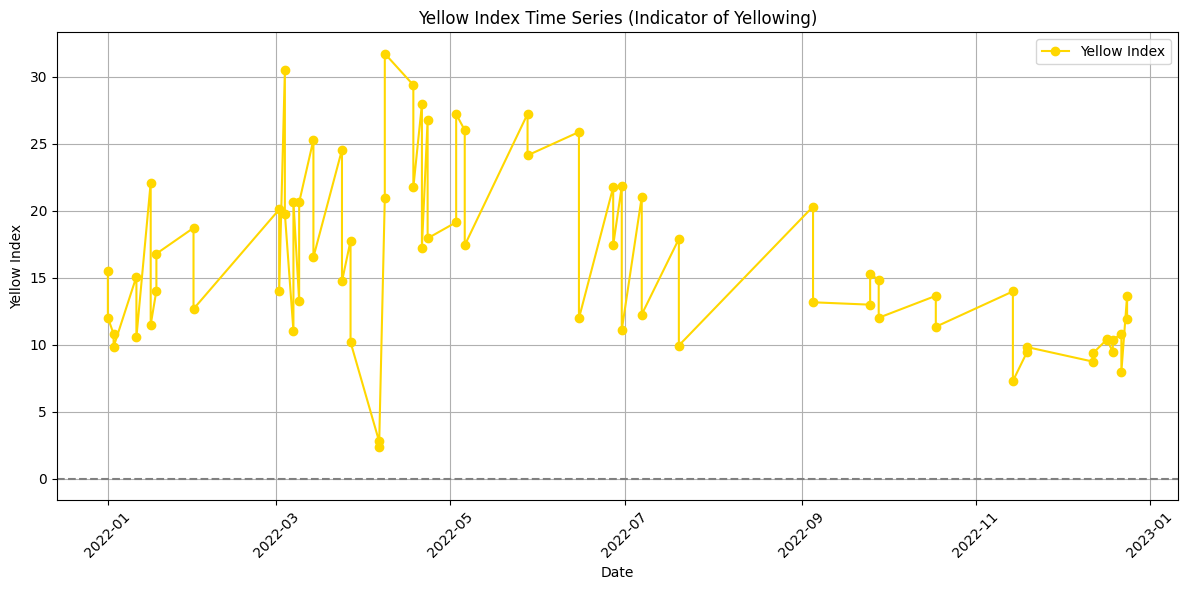

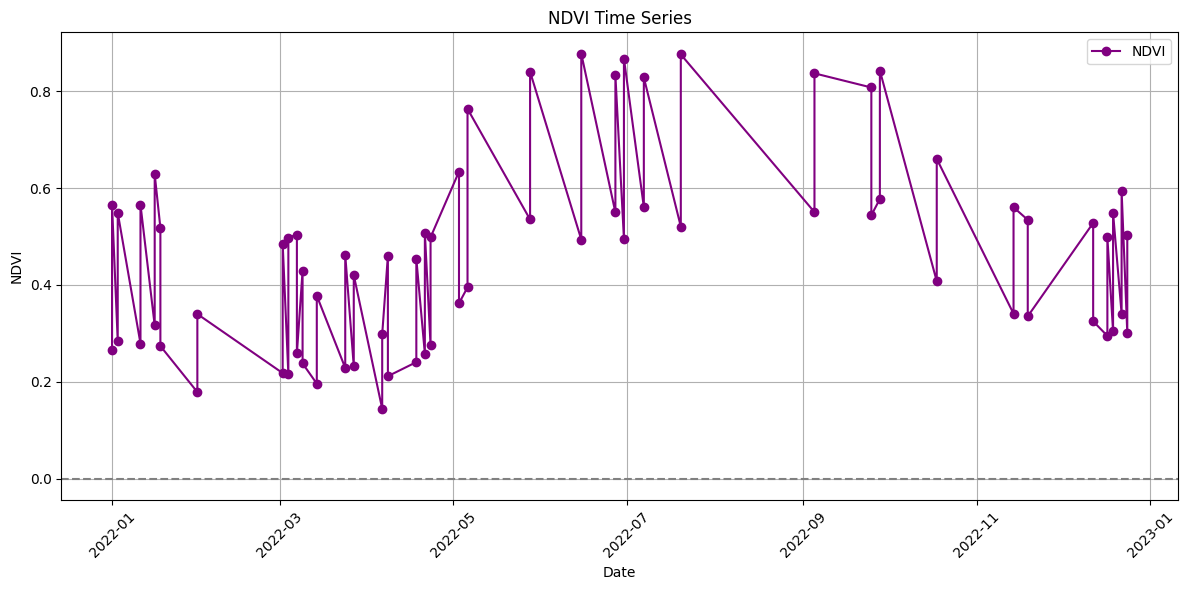

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1. Load your CSV file ---
# Replace 'path/to/your_file.csv' with the actual path to your CSV.
df = pd.read_csv('/content/LarchCN_Yearlong_Sample.csv', parse_dates=['image_date'])

# Sort the DataFrame by date (if not already sorted)
df = df.sort_values('image_date')

# If your CSV includes multiple ground-truth points and you want to graph them separately,
# you might want to filter the data. For example, here we plot for one specific id:
# df = df[df['id'] == '4R01']

# --- Step 2. Plot the RGB time series ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['TCI_R'], label='TCI_R', color='red', marker='o')
plt.plot(df['image_date'], df['TCI_G'], label='TCI_G', color='green', marker='o')
plt.plot(df['image_date'], df['TCI_B'], label='TCI_B', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title('RGB Time Series')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 3. Compute and plot a Yellow Index ---
# Here, we compute a simple yellow index: average(R, G) minus B.
df['Yellow_Index'] = ((df['TCI_R'] + df['TCI_G']) / 2) - df['TCI_B']

plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['Yellow_Index'], label='Yellow Index', color='gold', marker='o')
plt.xlabel('Date')
plt.ylabel('Yellow Index')
plt.title('Yellow Index Time Series (Indicator of Yellowing)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 4. Plot the NDVI time series ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['NDVI'], label='NDVI', color='purple', marker='o')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Time Series')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#smoothing the curve
#get difference between two kinds of forests


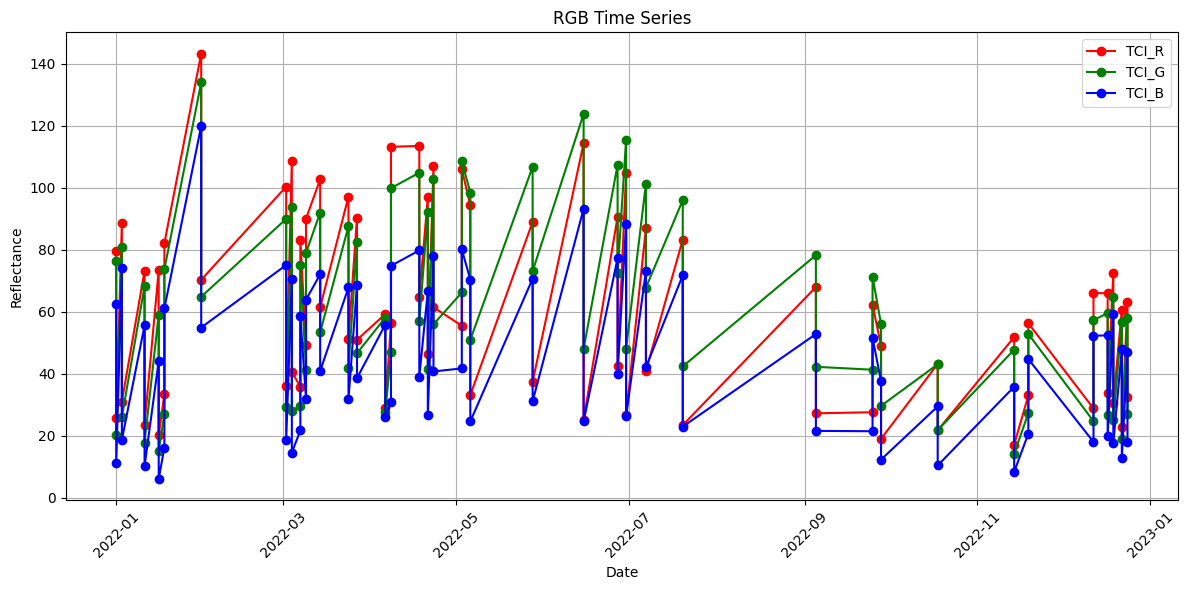

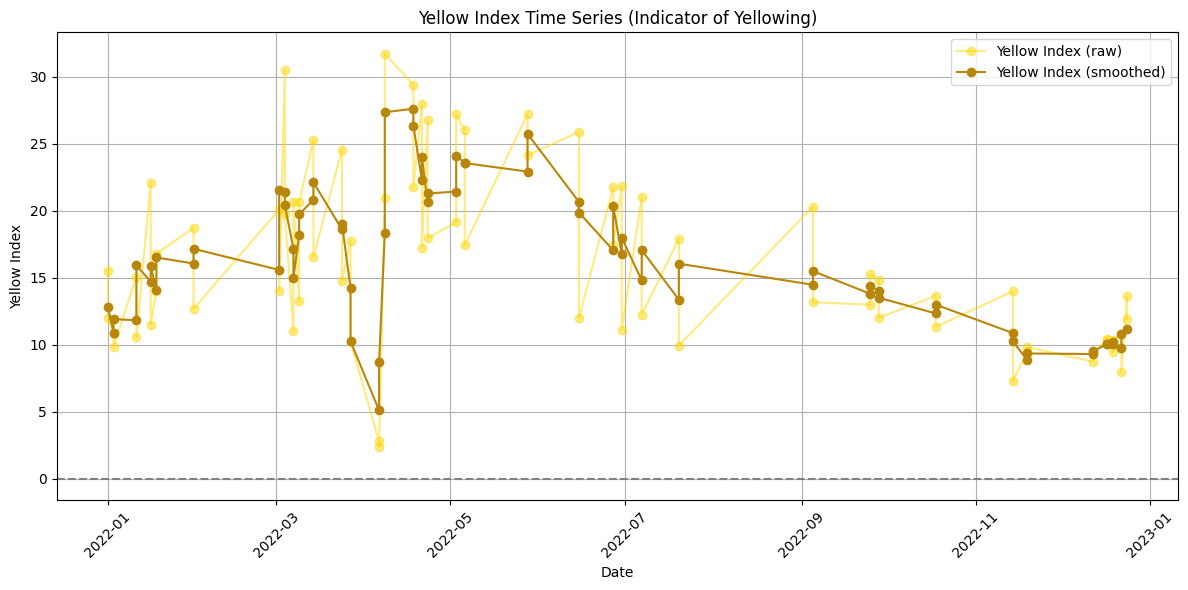

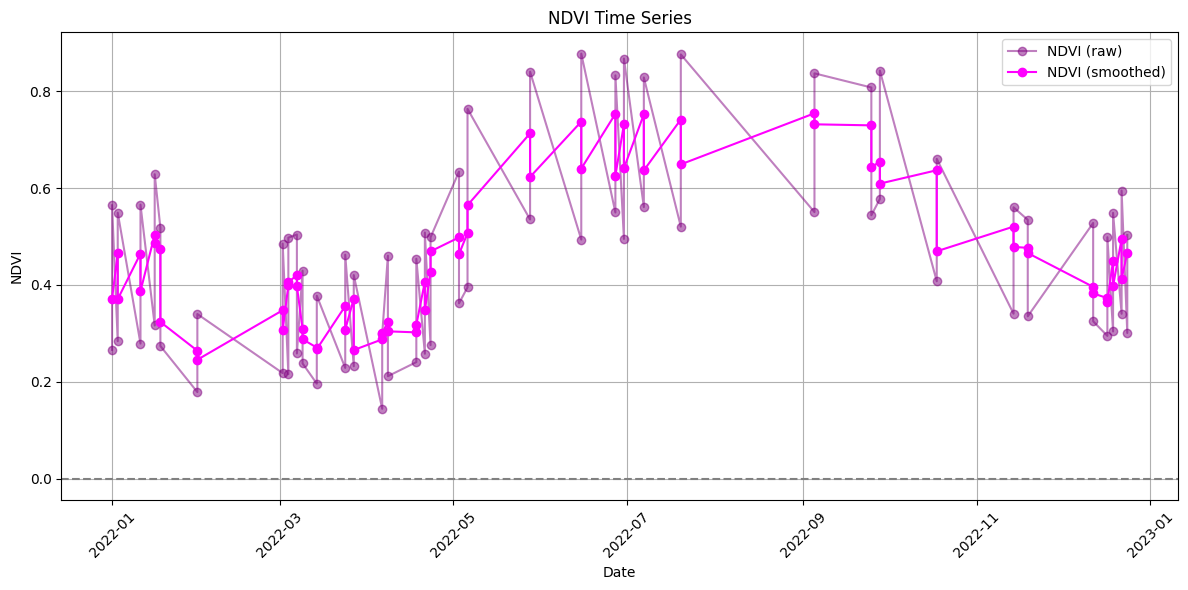

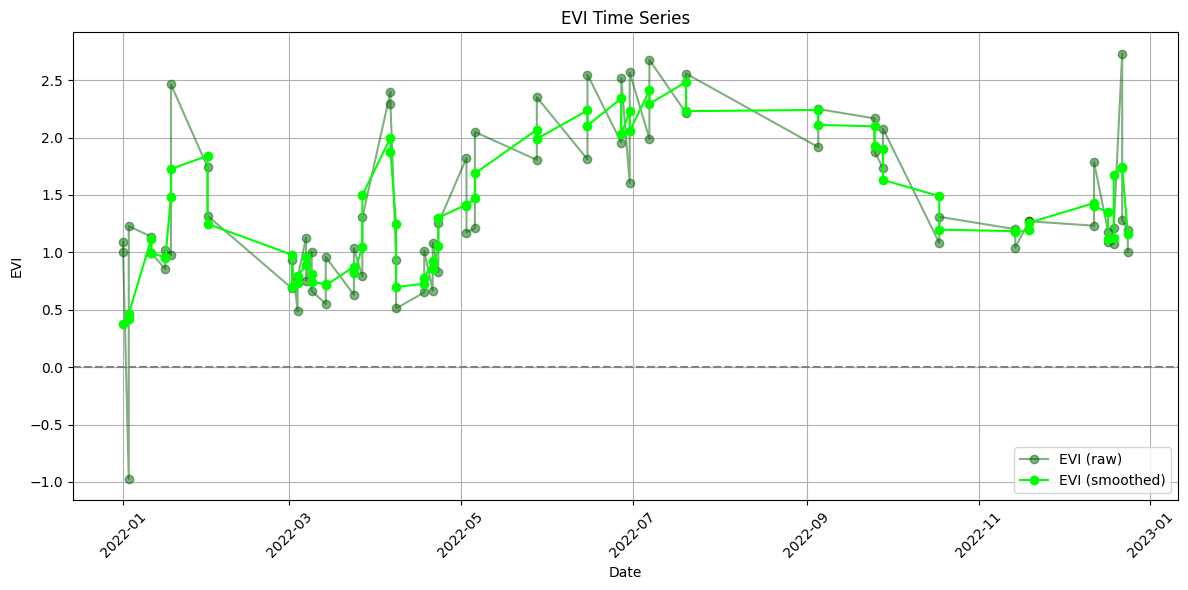

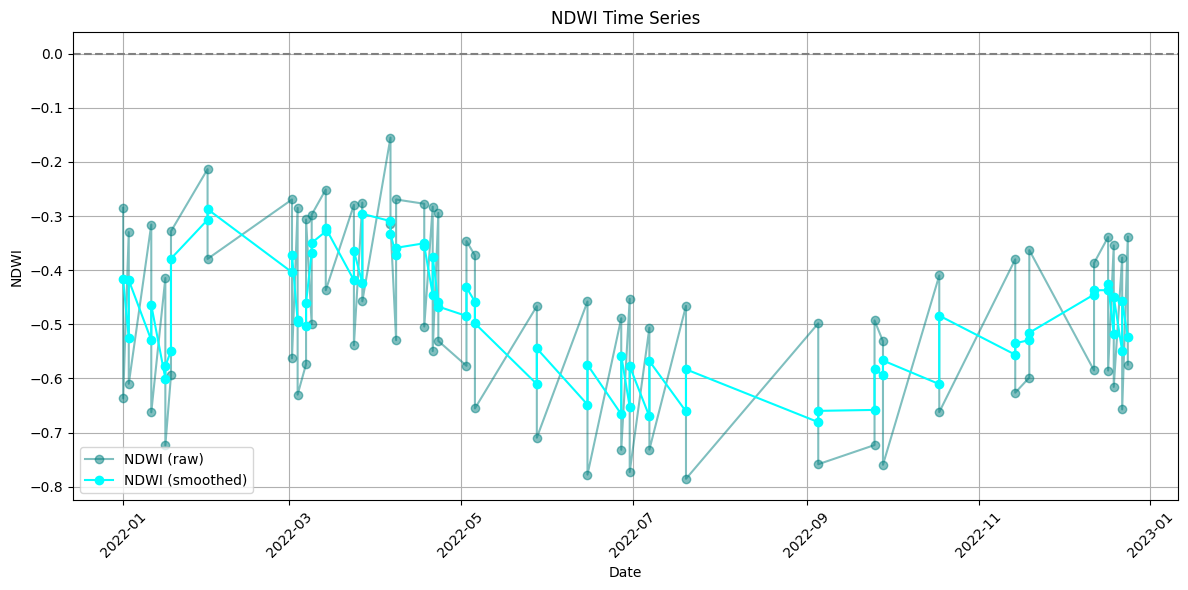

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1. Load your CSV file ---
df = pd.read_csv('/content/LarchCN_Yearlong_Sample.csv', parse_dates=['image_date'])
df = df.sort_values('image_date')

# Optional: If there are multiple ground-truth points and you wish to filter (for example, for id '4R01')
# df = df[df['id'] == '4R01']

# Define a rolling window size for smoothing; adjust as needed
window = 3

# --- Step 2. Compute Smoothed Versions for the Indices ---

# NDVI smoothing
df['NDVI_smoothed'] = df['NDVI'].rolling(window=window, center=True).mean()

# EVI smoothing (assuming column 'EVI' is in your CSV)
df['EVI_smoothed'] = df['EVI'].rolling(window=window, center=True).mean()

# NDWI smoothing (assuming column 'NDWI' is in your CSV)
df['NDWI_smoothed'] = df['NDWI'].rolling(window=window, center=True).mean()

# Compute a Yellow Index: average(TCI_R, TCI_G) minus TCI_B.
df['Yellow_Index'] = ((df['TCI_R'] + df['TCI_G']) / 2) - df['TCI_B']
df['Yellow_Index_smoothed'] = df['Yellow_Index'].rolling(window=window, center=True).mean()

# --- Step 3. Plot the RGB Time Series ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['TCI_R'], 'o-', color='red', label='TCI_R')
plt.plot(df['image_date'], df['TCI_G'], 'o-', color='green', label='TCI_G')
plt.plot(df['image_date'], df['TCI_B'], 'o-', color='blue', label='TCI_B')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title('RGB Time Series')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 4. Plot the Yellow Index (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['Yellow_Index'], 'o-', color='gold', alpha=0.5, label='Yellow Index (raw)')
plt.plot(df['image_date'], df['Yellow_Index_smoothed'], 'o-', color='darkgoldenrod', label='Yellow Index (smoothed)')
plt.xlabel('Date')
plt.ylabel('Yellow Index')
plt.title('Yellow Index Time Series (Indicator of Yellowing)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 5. Plot the NDVI Time Series (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['NDVI'], 'o-', color='purple', alpha=0.5, label='NDVI (raw)')
plt.plot(df['image_date'], df['NDVI_smoothed'], 'o-', color='magenta', label='NDVI (smoothed)')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Time Series')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 6. Plot the EVI Time Series (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['EVI'], 'o-', color='darkgreen', alpha=0.5, label='EVI (raw)')
plt.plot(df['image_date'], df['EVI_smoothed'], 'o-', color='lime', label='EVI (smoothed)')
plt.xlabel('Date')
plt.ylabel('EVI')
plt.title('EVI Time Series')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 7. Plot the NDWI Time Series (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['NDWI'], 'o-', color='teal', alpha=0.5, label='NDWI (raw)')
plt.plot(df['image_date'], df['NDWI_smoothed'], 'o-', color='cyan', label='NDWI (smoothed)')
plt.xlabel('Date')
plt.ylabel('NDWI')
plt.title('NDWI Time Series')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Preliminary Pipeline, JS GEE code time series extraction + python csv grapher + transformer (please disregard)

// 1. Define the two point locations (adjust or remove properties if not needed)
var points = [
  { lon: 107.6268413, lat: 33.76795597, id: '4R01' }
];

// 2. Create a FeatureCollection of 256×256 tiles.
// At 10 m resolution, a 256-pixel square covers 2560 m; buffer by 1280 m.
var tiles = points.map(function(pt) {
  var geom = ee.Geometry.Point([pt.lon, pt.lat]).buffer(1280).bounds();
  // Compute the centroid with a non-zero error margin.
  var center = geom.centroid({maxError: 1}).coordinates();
  // You can include the center if you want it for naming; otherwise, omit.
  return ee.Feature(geom, { id: pt.id, center: center });
});
var tileFC = ee.FeatureCollection(tiles);

// 3. Define the date range (for 2022).
var startDate = '2022-01-01';
var endDate   = '2022-12-31';

// 4. Define the Sentinel-2 image collection.
var s2Collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
  .filterDate(startDate, endDate)
  .filterBounds(tileFC.geometry())
  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20));

// 5. Define functions for cloud masking, index calculations, and band selection.
function maskClouds(image) {
  var qa = image.select('QA60');
  var cloudBitMask = 1 << 10;
  var cirrusBitMask = 1 << 11;
  var mask = qa.bitwiseAnd(cloudBitMask).eq(0)
              .and(qa.bitwiseAnd(cirrusBitMask).eq(0));
  return image.updateMask(mask);
}

function addIndices(image) {
  var ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI');
  var evi = image.expression(
    '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
    {
      'NIR': image.select('B8'),
      'RED': image.select('B4'),
      'BLUE': image.select('B2')
    }
  ).rename('EVI');
  var ndwi = image.expression(
    '(GREEN - NIR) / (GREEN + NIR)',
    {
      'GREEN': image.select('B3'),
      'NIR': image.select('B8')
    }
  ).rename('NDWI');
  return image.addBands([ndvi, evi, ndwi]);
}

function selectBands(image) {
  var originalBands = ['B1','B2','B3','B4','B5','B6','B7',
                       'B8','B8A','B9','B11','B12','AOT','WVP'];
  var rgbBands = ['TCI_R','TCI_G','TCI_B'];
  var indexBands = ['NDVI','EVI','NDWI'];
  return image.select(originalBands.concat(rgbBands).concat(indexBands));
}

// 6. Process the image collection.
var s2Processed = s2Collection
  .map(maskClouds)
  .map(addIndices)
  .map(selectBands)
  .map(function(img) { return img.unmask(-999); });

// 7. Create a list of months (1 through 12).
var months = ee.List.sequence(1, 12);

// 8. For each tile, for each month, select the earliest image and sample every pixel.
var monthlySamples = tileFC.map(function(tile) {
  var tileGeom = tile.geometry();
  var tileId = tile.get('id');
  var samplesForTile = months.map(function(m) {
    var monthlyImages = s2Processed
      .filter(ee.Filter.calendarRange(m, m, 'month'))
      .filterBounds(tileGeom);
    var sorted = monthlyImages.sort('system:time_start');
    var firstImage = ee.Image(sorted.first());
    var sampleCollection = ee.Algorithms.If(
      sorted.size().gt(0),
      firstImage.sample({
        region: tileGeom,
        scale: 10,
        geometries: true
      }).map(function(feat) {
        return feat.set({
          'image_date': firstImage.date().format('YYYY-MM-dd'),
          'tile_id': tileId
        });
      }),
      ee.FeatureCollection([])
    );
    return ee.FeatureCollection(sampleCollection);
  });
  return ee.FeatureCollection(samplesForTile).flatten();
}).flatten();

// 9. Print the total number of samples (using print() as recommended).
print("Total number of samples:", monthlySamples.size());

// 10. Export the results as a CSV file.
Export.table.toDrive({
  collection: monthlySamples,
  description: 'LarchCN_256x256_2022_monthly',
  fileFormat: 'CSV'
});

print("Script executed. Check the Tasks tab for export.");


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1. Load your CSV file ---
df = pd.read_csv('/content/LarchCN_Yearlong_Sample.csv', parse_dates=['image_date'])
df = df.sort_values('image_date')

# Optional: If there are multiple ground-truth points and you wish to filter (for example, for id '4R01')
# df = df[df['id'] == '4R01']

# Define a rolling window size for smoothing; adjust as needed
window = 3

# --- Step 2. Compute Smoothed Versions for the Indices ---

# NDVI smoothing
df['NDVI_smoothed'] = df['NDVI'].rolling(window=window, center=True).mean()

# EVI smoothing (assuming column 'EVI' is in your CSV)
df['EVI_smoothed'] = df['EVI'].rolling(window=window, center=True).mean()

# NDWI smoothing (assuming column 'NDWI' is in your CSV)
df['NDWI_smoothed'] = df['NDWI'].rolling(window=window, center=True).mean()

# Compute a Yellow Index: average(TCI_R, TCI_G) minus TCI_B.
df['Yellow_Index'] = ((df['TCI_R'] + df['TCI_G']) / 2) - df['TCI_B']
df['Yellow_Index_smoothed'] = df['Yellow_Index'].rolling(window=window, center=True).mean()

# --- Step 3. Plot the RGB Time Series ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['TCI_R'], 'o-', color='red', label='TCI_R')
plt.plot(df['image_date'], df['TCI_G'], 'o-', color='green', label='TCI_G')
plt.plot(df['image_date'], df['TCI_B'], 'o-', color='blue', label='TCI_B')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title('RGB Time Series')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 4. Plot the Yellow Index (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['Yellow_Index'], 'o-', color='gold', alpha=0.5, label='Yellow Index (raw)')
plt.plot(df['image_date'], df['Yellow_Index_smoothed'], 'o-', color='darkgoldenrod', label='Yellow Index (smoothed)')
plt.xlabel('Date')
plt.ylabel('Yellow Index')
plt.title('Yellow Index Time Series (Indicator of Yellowing)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 5. Plot the NDVI Time Series (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['NDVI'], 'o-', color='purple', alpha=0.5, label='NDVI (raw)')
plt.plot(df['image_date'], df['NDVI_smoothed'], 'o-', color='magenta', label='NDVI (smoothed)')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Time Series')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 6. Plot the EVI Time Series (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['EVI'], 'o-', color='darkgreen', alpha=0.5, label='EVI (raw)')
plt.plot(df['image_date'], df['EVI_smoothed'], 'o-', color='lime', label='EVI (smoothed)')
plt.xlabel('Date')
plt.ylabel('EVI')
plt.title('EVI Time Series')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 7. Plot the NDWI Time Series (Raw and Smoothed) ---
plt.figure(figsize=(12, 6))
plt.plot(df['image_date'], df['NDWI'], 'o-', color='teal', alpha=0.5, label='NDWI (raw)')
plt.plot(df['image_date'], df['NDWI_smoothed'], 'o-', color='cyan', label='NDWI (smoothed)')
plt.xlabel('Date')
plt.ylabel('NDWI')
plt.title('NDWI Time Series')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import math
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split

###############################
# 1. Dataset: Larch Time Series
###############################
class LarchTimeSeriesDataset(Dataset):
    """
    Reads a CSV (e.g., LarchCN_Yearlong_Sample.csv) with columns like:
    system:index, AOT, B1, B11, B12, B2, B3, B4, B5, B6, B7, B8, B8A, B9,
    EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, class, id, image_date, lat, lon, source, time, .geo

    It groups rows by the "id" field (each representing one pixel’s time series)
    and orders them by image_date. The features used are all the spectral and index bands.
    The label is set to a dummy value (0) because we disregard the CSV “class” field.
    """
    def __init__(self, csv_path, feature_cols=None):
        # Read CSV with image_date parsed as dates.
        self.df = pd.read_csv(csv_path, parse_dates=['image_date'])
        # Define default feature columns (20 features) if not provided.
        if feature_cols is None:
            self.feature_cols = [
                "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5", "B6",
                "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
                "TCI_B", "TCI_G", "TCI_R", "WVP"
            ]
        else:
            self.feature_cols = feature_cols

        # Group by "id" (each group corresponds to one pixel/time series).
        self.groups = self.df.groupby('id')
        self.samples = []
        for group_name, group in self.groups:
            group_sorted = group.sort_values('image_date')
            arr = group_sorted[self.feature_cols].to_numpy(dtype=float)
            # Optionally: you can pad/truncate if time-series lengths vary.
            ts_tensor = torch.tensor(arr, dtype=torch.float)  # shape (T, D)
            # Dummy label (e.g., 0) since we are not using the class column.
            label = 0
            self.samples.append((ts_tensor, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        ts_data, label = self.samples[idx]
        return ts_data, torch.tensor(label, dtype=torch.long)

###############################
# 2. Transformer Components
###############################
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.shape
        # Add a sinusoidal offset for each time and feature dimension.
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1)*(i+1)/30.0)
                x[:, t, i] += offset
        return x

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, _ = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)

        def split_heads(tensor):
            return tensor.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        Q = split_heads(Q)
        K = split_heads(K)
        V = split_heads(V)

        scores = torch.matmul(Q, K.transpose(-2,-1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)  # (B, num_heads, T, T)
        out = torch.matmul(attn, V)           # (B, num_heads, T, head_dim)
        out = out.transpose(1,2).contiguous().view(B, T, self.d_model)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x_attn = self.attn(x)
        x = x + x_attn
        x = self.norm1(x)
        x_ff = self.ff(x)
        x = x + x_ff
        x = self.norm2(x)
        return x

class MiniTransformerClassifier(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2):
        super().__init__()
        self.posenc = SimplePosEncoding()
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)
        ])
        self.classifier = nn.Linear(d_model, n_classes)

    def forward(self, x):
        # x: (B, T, D)
        x = self.posenc(x)
        for layer in self.layers:
            x = layer(x)
        # Pool over time dimension (mean)
        x_mean = x.mean(dim=1)
        logits = self.classifier(x_mean)
        return logits

###############################
# 3. Main: Training & Inference
###############################
def main():
    # Create dataset from the exported CSV.
    csv_path = "LarchCN_Yearlong_Sample.csv"  # update path if needed
    dataset = LarchTimeSeriesDataset(csv_path)
    print("Dataset length:", len(dataset))

    # Split into train and test sets.
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=2, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=2, shuffle=False)

    # Set d_model to the number of features (here, 20).
    d_model = len(dataset.feature_cols)
    model = MiniTransformerClassifier(d_model=d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2)
    print(model)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    epochs = 10
    for ep in range(1, epochs+1):
        model.train()
        total_loss = 0.0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * batch_x.size(0)
        avg_loss = total_loss / len(train_ds)

        # Evaluate on test set.
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for bx, by in test_loader:
                out = model(bx)
                preds = torch.argmax(out, dim=1)
                correct += (preds == by).sum().item()
                total += by.size(0)
        acc = correct / total if total > 0 else 0
        print(f"Epoch {ep}, loss={avg_loss:.3f}, test_acc={acc:.2f}")

    torch.save(model.state_dict(), "transformer_larch.pth")
    print("Saved transformer model as transformer_larch.pth")

    # Inference example: Get prediction for the first sample.
    sample_ts, _ = dataset[0]
    sample_ts = sample_ts.unsqueeze(0)  # shape (1, T, D)
    model.eval()
    with torch.no_grad():
        logits = model(sample_ts)
        pred_class = torch.argmax(logits, dim=1).item()
    print(f"Predicted class for first sample: {pred_class}  (dummy labels used)")

if __name__ == "__main__":
    main()


CSV reader and transformer input


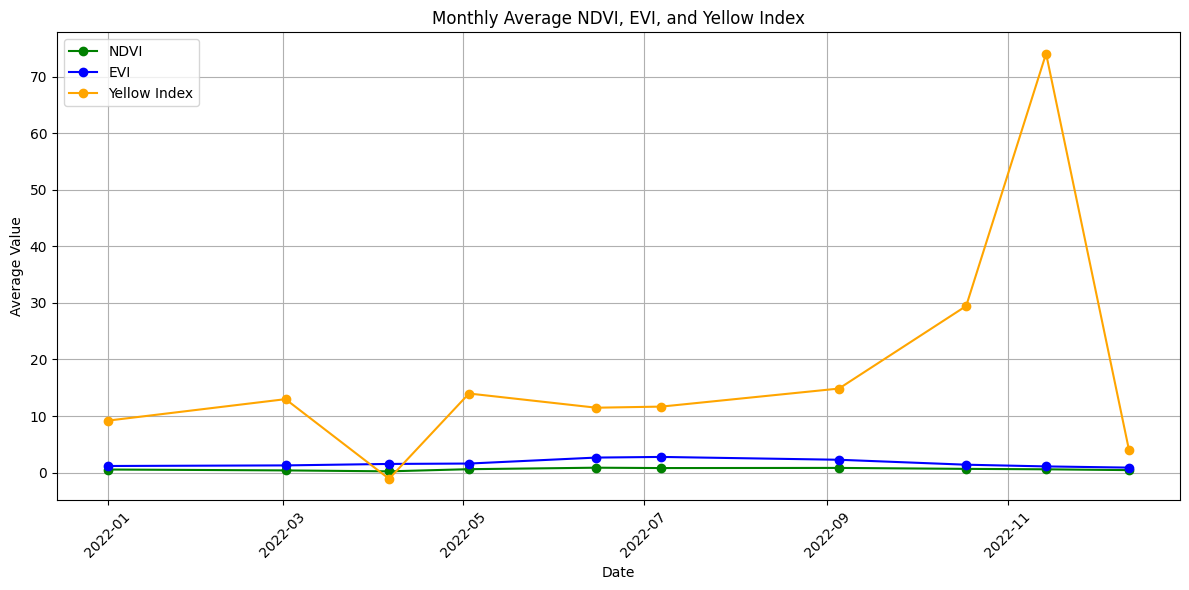

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV (change the file path as needed)
df = pd.read_csv('/content/LarchCN_256x256_2022_monthly.csv', parse_dates=['image_date'])

# Compute Yellow Index: average of TCI_R and TCI_G minus TCI_B
df['Yellow_Index'] = ((df['TCI_R'] + df['TCI_G']) / 2) - df['TCI_B']

# Group by image_date and take the average of the indices across pixels
monthly_avg = df.groupby('image_date').agg({
    'NDVI': 'mean',
    'EVI': 'mean',
    'Yellow_Index': 'mean'
}).reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['image_date'], monthly_avg['NDVI'], marker='o', label='NDVI', color='green')
plt.plot(monthly_avg['image_date'], monthly_avg['EVI'], marker='o', label='EVI', color='blue')
plt.plot(monthly_avg['image_date'], monthly_avg['Yellow_Index'], marker='o', label='Yellow Index', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Monthly Average NDVI, EVI, and Yellow Index')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Full pipeline, from CSV cleaner to transformer

In [ ]:
#CSV non-numeric checker
import pandas as pd
import csv

def detect_non_numeric_columns(csv_file):
    # Read CSV with the Python engine, skip bad lines, and disable quoting.
    df = pd.read_csv(
        csv_file,
        engine='python',
        on_bad_lines='skip',
        quoting=csv.QUOTE_NONE
    )

    non_numeric = {}
    for col in df.columns:
        try:
            # Attempt to convert the column to numeric.
            converted = pd.to_numeric(df[col], errors='coerce')
            # Count the number of entries that become NaN after conversion but were not NaN originally.
            additional_nans = converted.isna() & ~df[col].isna()
            count = additional_nans.sum()
            if count > 0:
                non_numeric[col] = count
        except Exception as e:
            # If an exception occurs during conversion, record it.
            non_numeric[col] = str(e)
    return non_numeric

# Example usage:
csv_file = "/content/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv"  # Change the path as needed.
problems = detect_non_numeric_columns(csv_file)

print("Columns containing non-numeric values or extra NaNs after conversion:")
for col, count in problems.items():
    print(f"{col}: {count}")


In [ ]:
# CSV cleaner (drops .geo col, extract lat and long from .geo col)
import pandas as pd
import re
import os

def clean_csv(input_path):
    # Read the CSV file
    df = pd.read_csv(input_path)

    # Extract latitude and longitude from .geo column using regex
    def extract_coordinates(geo_str):
        match = re.search(r'\[([-+]?\d*\.\d+),\s*([-+]?\d*\.\d+)\]', geo_str)
        if match:
            return float(match.group(1)), float(match.group(2))
        return None, None

    df['longitude'], df['latitude'] = zip(*df['.geo'].apply(extract_coordinates))

    # Drop unnecessary columns
    df = df.drop(columns=['system:index', 'tile_id', '.geo'])

    # Ensure all feature columns are numeric
    feature_cols = [
        "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
        "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
        "TCI_B", "TCI_G", "TCI_R", "WVP"
    ]
    for col in feature_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Handle missing values (forward fill)
    df[feature_cols] = df[feature_cols].ffill()

    # Save the cleaned CSV
    output_path = os.path.splitext(input_path)[0] + "_cleaned.csv"
    df.to_csv(output_path, index=False)
    print(f"Cleaned CSV saved to: {output_path}")

# Example usage
if __name__ == "__main__":
    input_csv_path = "/content/LarchCN_256x256_2022_monthly.csv"  # Update this path
    clean_csv(input_csv_path)

Cleaned CSV saved to: /content/LarchCN_256x256_2022_monthly_cleaned.csv


My first iteration of the transformer

In [ ]:
import math
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv  # For quoting options
from tqdm import tqdm

# -------------------------------
# 1. Dataset: Pixel Monthly Time Series
# -------------------------------
class PixelMonthlyDataset(Dataset):
    """
    Reads a CSV with columns such as:
      system:index, AOT, B1, B11, B12, B2, B3, B4, B5, B6, B7, B8, B8A, B9,
      EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, tile_id, .geo

    This class groups rows by 'system:index' and 'image_date', averages the numeric feature columns,
    and then groups by 'system:index' to form a time series per pixel.
    It returns one tensor per pixel of shape (T, D) where T is the number of dates (ideally 12)
    and D is the number of available features.
    If a pixel has fewer than desired_length timesteps, we pad by repeating the last sample;
    if more, we truncate.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print("Reading CSV file...")
        self.df = pd.read_csv(
            csv_path,
            parse_dates=['image_date'],
            usecols=lambda col: col not in ['.geo', 'tile_id', 'system:index'],
            engine='python',
            on_bad_lines='skip',
            quoting=csv.QUOTE_NONE
        )

        # Define desired feature columns.
        desired_features = [
            "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
            "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
            "TCI_B", "TCI_G", "TCI_R", "WVP"
        ]
        if feature_cols is None:
            self.feature_cols = desired_features
        else:
            self.feature_cols = feature_cols

        # Use only the feature columns that actually exist in the CSV.
        self.feature_cols = [col for col in self.feature_cols if col in self.df.columns]
        print(f"Detected feature columns: {self.feature_cols}")

        self.desired_length = desired_length

        # Ensure all desired feature columns are numeric.
        for col in self.feature_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

        # Optionally, fill missing numeric values (here we use forward fill grouped by image_date)
        self.df[self.feature_cols] = self.df.groupby('image_date')[self.feature_cols].ffill()

        # Group by 'system:index' and 'image_date' and average only the feature columns.
        # (Note: 'system:index' was removed by usecols, so we assume that each unique pixel is identified by its coordinates.)
        # In our case, we will group by the coordinate columns (latitude and longitude) if they exist.
        # Here, we assume the cleaned CSV has 'latitude' and 'longitude' columns.
        if 'latitude' in self.df.columns and 'longitude' in self.df.columns:
            group_keys = ['latitude', 'longitude', 'image_date']
        else:
            # Otherwise, we group by image_date only.
            group_keys = ['image_date']
        print(f"Grouping by keys: {group_keys}")
        grouped = self.df.groupby(group_keys)[self.feature_cols].mean().reset_index()

        # Now group by the pixel identifier. We'll use the combination of latitude and longitude as the key if available.
        self.samples = []
        if 'latitude' in grouped.columns and 'longitude' in grouped.columns:
            for (lat, lon), grp in grouped.groupby(['latitude', 'longitude']):
                grp_sorted = grp.sort_values('image_date')
                arr = grp_sorted[self.feature_cols].values  # shape (T, D)
                T, D = arr.shape
                if T < desired_length:
                    pad = np.tile(arr[-1:], (desired_length - T, 1))
                    arr = np.vstack([arr, pad])
                elif T > desired_length:
                    arr = arr[:desired_length]
                ts_tensor = torch.tensor(arr, dtype=torch.float)
                self.samples.append(ts_tensor)
        else:
            # If no coordinates, group by image_date alone (less ideal for pixel identification)
            grp_sorted = grouped.sort_values('image_date')
            arr = grp_sorted[self.feature_cols].values
            T, D = arr.shape
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)
            self.samples.append(ts_tensor)
        print(f"Constructed {len(self.samples)} time series samples.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        # Return sample and a dummy label.
        return self.samples[idx], torch.tensor(0, dtype=torch.long)

# -------------------------------
# 2. Transformer Autoencoder Components
# -------------------------------

# (A) Positional Encoding
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.shape
        pos = torch.arange(T, dtype=torch.float).unsqueeze(1)  # (T,1)
        i = torch.arange(D, dtype=torch.float).unsqueeze(0)      # (1,D)
        angle_rates = 1 / (10000 ** ((2 * (i // 2)) / D))
        angle_rads = pos * angle_rates
        pe = torch.zeros(T, D)
        pe[:, 0::2] = torch.sin(angle_rads[:, 0::2])
        pe[:, 1::2] = torch.cos(angle_rads[:, 1::2])
        pe = pe.unsqueeze(0)  # (1, T, D)
        if x.is_cuda:
            pe = pe.cuda()
        return x + pe

# (B) Multi-head Self-Attention
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1, 2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

# (C) Transformer Encoder Block
class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.norm1(x + self.attn(x))
        x = self.norm2(x + self.ff(x))
        return x

# (D) Transformer Encoder (extracting a latent representation)
class TransformerEncoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2):
        super().__init__()
        self.pos_enc = SimplePosEncoding()
        self.layers = nn.ModuleList(
            [TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)]
        )

    def forward(self, x):
        x = self.pos_enc(x)
        for layer in self.layers:
            x = layer(x)
        latent = x.mean(dim=1)  # (B, d_model)
        return latent

# (E) Simple Decoder: Map latent vector back to the full sequence.
class SimpleDecoder(nn.Module):
    def __init__(self, latent_dim, seq_len, d_model):
        super().__init__()
        self.seq_len = seq_len
        self.fc = nn.Linear(latent_dim, seq_len * d_model)
        self.d_model = d_model

    def forward(self, latent):
        x = self.fc(latent)  # (B, seq_len * d_model)
        x = x.view(-1, self.seq_len, self.d_model)  # (B, seq_len, d_model)
        return x

# (F) Transformer Autoencoder: Encoder + Decoder.
class TransformerAutoencoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, seq_len=12):
        super().__init__()
        self.encoder = TransformerEncoder(d_model, num_heads, ff_hidden, num_layers)
        self.decoder = SimpleDecoder(latent_dim=d_model, seq_len=seq_len, d_model=d_model)

    def forward(self, x):
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon, latent

# -------------------------------
# 3. Training the Transformer Autoencoder with tqdm and debug prints
# -------------------------------
def train_autoencoder(csv_path):
    print("Initializing dataset...")
    dataset = PixelMonthlyDataset(csv_path, desired_length=12)
    ds_len = len(dataset)
    print(f"Dataset contains {ds_len} samples.")
    if ds_len < 2:
        print("Dataset has less than 2 samples; using the entire dataset for training/testing.")
        train_ds = dataset
        test_ds = dataset
    else:
        train_size = int(0.8 * ds_len)
        test_size = ds_len - train_size
        train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

    d_model = len(dataset.feature_cols)  # This is the dimension of our features (e.g., 20)
    seq_len = 12
    print(f"Using d_model = {d_model} and sequence length = {seq_len}.")
    model = TransformerAutoencoder(d_model=d_model, num_heads=2, ff_hidden=64, num_layers=2, seq_len=seq_len)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    epochs = 20
    print("Starting training...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        # Use tqdm for progress display.
        for X, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} training", leave=False):
            optimizer.zero_grad()
            recon, _ = model(X)
            loss = criterion(recon, X)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            total_loss += loss.item() * X.size(0)
        avg_loss = total_loss / len(train_ds)

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X, _ in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} testing", leave=False):
                recon, _ = model(X)
                loss = criterion(recon, X)
                test_loss += loss.item() * X.size(0)
        avg_test_loss = test_loss / len(test_ds)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    print("Training complete.")
    return model

# -------------------------------
# 4. Extract Latent Representations and Cluster Them
# -------------------------------
def extract_latents(model, csv_path):
    print("Extracting latent representations...")
    dataset = PixelMonthlyDataset(csv_path, desired_length=12)
    loader = DataLoader(dataset, batch_size=16, shuffle=False)
    model.eval()
    latents = []
    with torch.no_grad():
        for X, _ in tqdm(loader, desc="Extracting latents"):
            _, latent = model(X)
            latents.append(latent.cpu().numpy())
    latents = np.concatenate(latents, axis=0)
    print(f"Extracted latent shape: {latents.shape}")
    return latents

def cluster_latents(latents, n_clusters=3):
    print("Clustering latent representations...")
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)pth
    clusters = kmeans.fit_predict(latents)
    print("Clustering complete.")
    return clusters, kmeans

# -------------------------------
# 5. Example Usage: Training, Clustering, and Visualization
# -------------------------------
if __name__ == "__main__":
    csv_path = "/content/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv"  # Adjust the path as needed.
    print("Starting the autoencoder training and clustering pipeline...")
    model = train_autoencoder(csv_path)
    latents = extract_latents(model, csv_path)
    clusters, kmeans = cluster_latents(latents, n_clusters=3)
    print("Cluster assignments for each pixel (latent representation):")
    print(clusters)

    # Optionally, plot the distribution of clusters.
    plt.figure(figsize=(8, 4))
    plt.hist(clusters, bins=np.arange(0, 4)-0.5, rwidth=0.8)
    plt.xlabel("Cluster")
    plt.ylabel("Number of Pixels")
    plt.title("Cluster Distribution")
    plt.show()


SyntaxError: invalid syntax (<ipython-input-5-63c54a41d260>, line 293)

The transformer autoencoder is trained to reconstruct the input time series from a compressed (latent) representation. The printed train and test losses show that the model is gradually learning to compress and reconstruct these per-pixel time series. After training, you see the latent representation has shape (65,224, 20) – meaning for each pixel, the encoder produces a 20‑dimensional latent vector (here, the latent dimension is equal to the input feature dimension).

The latent representations are then fed to KMeans clustering (with 3 clusters, in your example). The printed cluster assignments and the histogram show how many pixels fall into each cluster. For instance, one cluster might contain over 40,000 pixels, another around 15,000, and another around 7,500. These clusters represent groups of pixels that the autoencoder has learned to represent similarly—that is, they share similar seasonal (or phenological) trends. For example, one cluster may correspond to pixels with a noticeable “yellowing” trend in the fall, while the others might have different seasonal patterns.

In [ ]:
import math
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv  # For quoting options
from tqdm import tqdm

# -------------------------------
# 1. Dataset: Pixel Monthly Time Series
# -------------------------------
class PixelMonthlyDataset(Dataset):
    """
    Reads a CSV with columns such as:
      system:index, AOT, B1, B11, B12, B2, B3, B4, B5, B6, B7, B8, B8A, B9,
      EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, tile_id, .geo

    Groups rows by 'system:index' and 'image_date' (here, using coordinate columns 'latitude' and 'longitude'),
    averages the numeric feature columns, and then builds a 12‐step time series per pixel.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print("Reading CSV file...")
        self.df = pd.read_csv(
            csv_path,
            parse_dates=['image_date'],
            usecols=lambda col: col not in ['.geo', 'tile_id', 'system:index'],
            engine='python',
            on_bad_lines='skip',
            quoting=csv.QUOTE_NONE
        )

        desired_features = [
            "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
            "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
            "TCI_B", "TCI_G", "TCI_R", "WVP"
        ]
        if feature_cols is None:
            self.feature_cols = desired_features
        else:
            self.feature_cols = feature_cols
        # Use only columns that exist.
        self.feature_cols = [col for col in self.feature_cols if col in self.df.columns]
        print(f"Detected feature columns: {self.feature_cols}")

        self.desired_length = desired_length
        for col in self.feature_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        self.df[self.feature_cols] = self.df.groupby('image_date')[self.feature_cols].ffill()

        # Group by coordinates and image_date.
        if 'latitude' in self.df.columns and 'longitude' in self.df.columns:
            group_keys = ['latitude', 'longitude', 'image_date']
        else:
            group_keys = ['image_date']
        print(f"Grouping by keys: {group_keys}")
        grouped = self.df.groupby(group_keys)[self.feature_cols].mean().reset_index()

        self.samples = []
        if 'latitude' in grouped.columns and 'longitude' in grouped.columns:
            for (lat, lon), grp in grouped.groupby(['latitude', 'longitude']):
                grp_sorted = grp.sort_values('image_date')
                arr = grp_sorted[self.feature_cols].values
                T, D = arr.shape
                if T < desired_length:
                    pad = np.tile(arr[-1:], (desired_length - T, 1))
                    arr = np.vstack([arr, pad])
                elif T > desired_length:
                    arr = arr[:desired_length]
                ts_tensor = torch.tensor(arr, dtype=torch.float)
                self.samples.append(ts_tensor)
        else:
            grp_sorted = grouped.sort_values('image_date')
            arr = grp_sorted[self.feature_cols].values
            T, D = arr.shape
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)
            self.samples.append(ts_tensor)
        print(f"Constructed {len(self.samples)} time series samples.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], torch.tensor(0, dtype=torch.long)

# -------------------------------
# 2. Transformer Autoencoder Components
# -------------------------------

class SimplePosEncoding(nn.Module):
    def forward(self, x):
        B, T, D = x.shape
        pos = torch.arange(T, dtype=torch.float).unsqueeze(1)
        i = torch.arange(D, dtype=torch.float).unsqueeze(0)
        angle_rates = 1 / (10000 ** ((2 * (i // 2)) / D))
        angle_rads = pos * angle_rates
        pe = torch.zeros(T, D)
        pe[:, 0::2] = torch.sin(angle_rads[:, 0::2])
        pe[:, 1::2] = torch.cos(angle_rads[:, 1::2])
        pe = pe.unsqueeze(0)
        if x.is_cuda:
            pe = pe.cuda()
        return x + pe

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        scores = torch.matmul(Q, K.transpose(-2,-1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1,2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.norm1(x + self.attn(x))
        x = self.norm2(x + self.ff(x))
        return x

class TransformerEncoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2):
        super().__init__()
        self.pos_enc = SimplePosEncoding()
        self.layers = nn.ModuleList([TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)])

    def forward(self, x):
        x = self.pos_enc(x)
        for layer in self.layers:
            x = layer(x)
        latent = x.mean(dim=1)
        return latent

class SimpleDecoder(nn.Module):
    def __init__(self, latent_dim, seq_len, d_model):
        super().__init__()
        self.seq_len = seq_len
        self.fc = nn.Linear(latent_dim, seq_len * d_model)
        self.d_model = d_model

    def forward(self, latent):
        x = self.fc(latent)
        x = x.view(-1, self.seq_len, self.d_model)
        return x

class TransformerAutoencoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, seq_len=12):
        super().__init__()
        self.encoder = TransformerEncoder(d_model, num_heads, ff_hidden, num_layers)
        self.decoder = SimpleDecoder(latent_dim=d_model, seq_len=seq_len, d_model=d_model)

    def forward(self, x):
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon, latent

# -------------------------------
# 3. Training and Saving the Model
# -------------------------------
def train_and_save_autoencoder(csv_path, save_path="transformer_larch.pth"):
    print("Initializing dataset...")
    dataset = PixelMonthlyDataset(csv_path, desired_length=12)
    ds_len = len(dataset)
    print(f"Dataset contains {ds_len} samples.")
    if ds_len < 2:
        print("Dataset has less than 2 samples; using entire dataset for training/testing.")
        train_ds = dataset
        test_ds = dataset
    else:
        train_size = int(0.8 * ds_len)
        test_size = ds_len - train_size
        train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

    d_model = len(dataset.feature_cols)
    seq_len = 12
    print(f"Using d_model = {d_model} and sequence length = {seq_len}.")
    model = TransformerAutoencoder(d_model=d_model, num_heads=2, ff_hidden=64, num_layers=2, seq_len=seq_len)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    epochs = 20
    print("Starting training...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} training", leave=False):
            optimizer.zero_grad()
            recon, _ = model(X)
            loss = criterion(recon, X)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            total_loss += loss.item() * X.size(0)
        avg_loss = total_loss / len(train_ds)

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X, _ in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} testing", leave=False):
                recon, _ = model(X)
                loss = criterion(recon, X)
                test_loss += loss.item() * X.size(0)
        avg_test_loss = test_loss / len(test_ds)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    print("Training complete.")
    # Save the model weights to a file.
    torch.save(model.state_dict(), save_path)
    print(f"Model saved as {save_path}")
    return model

if __name__ == "__main__":
    csv_path = "/content/LarchCN_256x256_2022_monthly_cleaned.csv"  # Adjust as needed.
    model = train_and_save_autoencoder(csv_path)


Initializing dataset...
Reading CSV file...
Detected feature columns: ['AOT', 'B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'EVI', 'NDVI', 'NDWI', 'TCI_B', 'TCI_G', 'TCI_R', 'WVP']
Grouping by keys: ['latitude', 'longitude', 'image_date']
Constructed 65224 time series samples.
Dataset contains 65224 samples.
Using d_model = 20 and sequence length = 12.
Starting training...


Epoch 1/20, Train Loss: 1139804.7943, Test Loss: 444401.9960


Epoch 2/20, Train Loss: 271416.3816, Test Loss: 186327.8809


Epoch 3/20, Train Loss: 154578.7819, Test Loss: 113011.4753


Epoch 4/20, Train Loss: 85975.2761, Test Loss: 60482.6864


Epoch 5/20, Train Loss: 49905.5247, Test Loss: 39717.9159


Epoch 6/20, Train Loss: 34828.6957, Test Loss: 28872.9021


Epoch 7/20, Train Loss: 27062.4995, Test Loss: 23578.8983


Epoch 8/20, Train Loss: 23106.5946, Test Loss: 21015.1374


Epoch 9/20, Train Loss: 20606.8370, Test Loss: 18505.7841


Epoch 10/20, Train Loss: 18125.4515, Test Loss: 16191.3105


Epoch 11/20, Train Loss: 16314.9511, Test Loss: 14974.1961


Epoch 12/20, Train Loss: 15093.1650, Test Loss: 14025.6448


Epoch 13/20, Train Loss: 14214.3596, Test Loss: 13350.9030


Epoch 14/20, Train Loss: 13850.5667, Test Loss: 13307.0289


Epoch 15/20, Train Loss: 13327.5546, Test Loss: 12905.3500


Epoch 16/20, Train Loss: 12831.9256, Test Loss: 12468.5245


Epoch 17/20, Train Loss: 12395.0384, Test Loss: 11483.3345


Epoch 18/20, Train Loss: 11972.6801, Test Loss: 11116.4901


Epoch 19/20, Train Loss: 11628.9710, Test Loss: 10946.4472


Epoch 20/20, Train Loss: 11250.6358, Test Loss: 10435.6309
Training complete.
Model saved as transformer_larch.pth


Loading the trained model from 'transformer_larch.pth'...
Model loaded.
Reading CSV file for analysis...


<ipython-input-6-916a04dae25f>:178: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("transformer_larch.pth", map_location=torch.device("cpu"))

Detected feature columns: ['AOT', 'B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'EVI', 'NDVI', 'NDWI', 'TCI_B', 'TCI_G', 'TCI_R', 'WVP']
Grouping by keys: ['latitude', 'longitude', 'image_date']
Constructed 65224 time series samples with coordinates.


Extracting latents: 100%|██████████| 4077/4077 [00:09<00:00, 422.14it/s]


Extracted latent shape: (65224, 20)
Number of coordinate entries: 8154, Number of latent vectors: 65224
Clustering latent representations into 3 clusters...
Clustering complete.
Sample cluster assignments:
                                latitude  \
0   tensor(33.7564, dtype=torch.float64)   
1  tensor(107.6197, dtype=torch.float64)   
2   tensor(33.7564, dtype=torch.float64)   
3  tensor(107.6321, dtype=torch.float64)   
4   tensor(33.7565, dtype=torch.float64)   

                               longitude  cluster  
0   tensor(33.7564, dtype=torch.float64)        2  
1  tensor(107.6239, dtype=torch.float64)        2  
2   tensor(33.7564, dtype=torch.float64)        2  
3  tensor(107.6363, dtype=torch.float64)        2  
4   tensor(33.7565, dtype=torch.float64)        2  

Key Trends per Cluster:

Cluster 0:
Average Yellowing Index Trend over 12 months:
[ 7.9142075 13.22509   -3.8357162 -1.2845173 12.112469  11.847149
 14.370464  69.175095  72.79732    2.2499275  2.2499275  2.2499275]


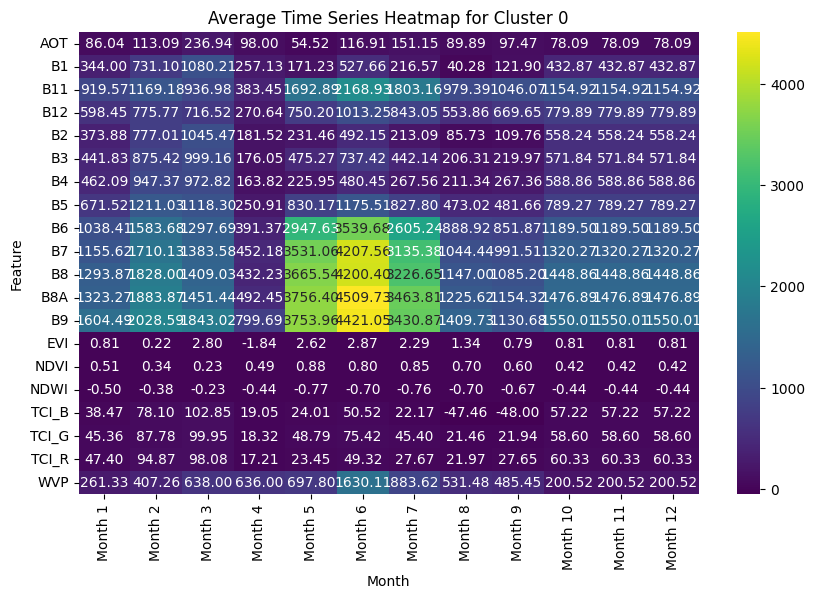

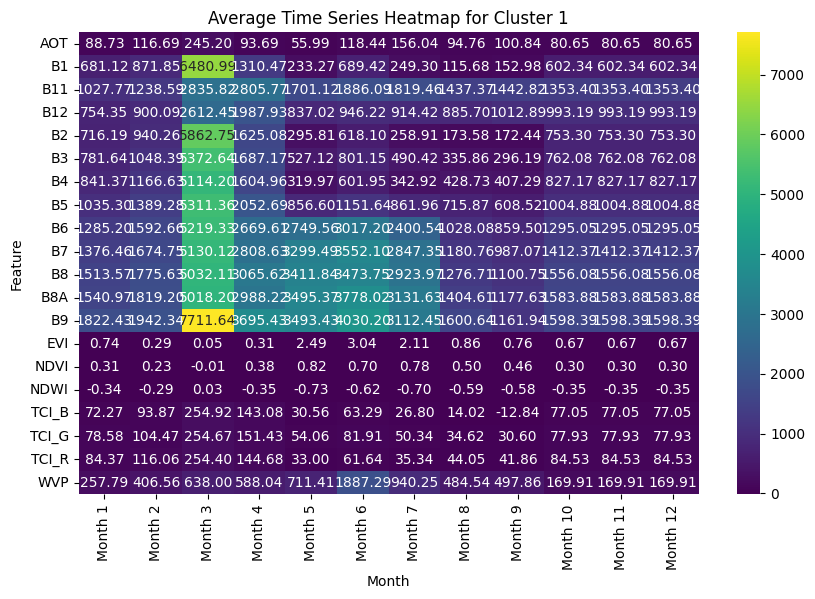

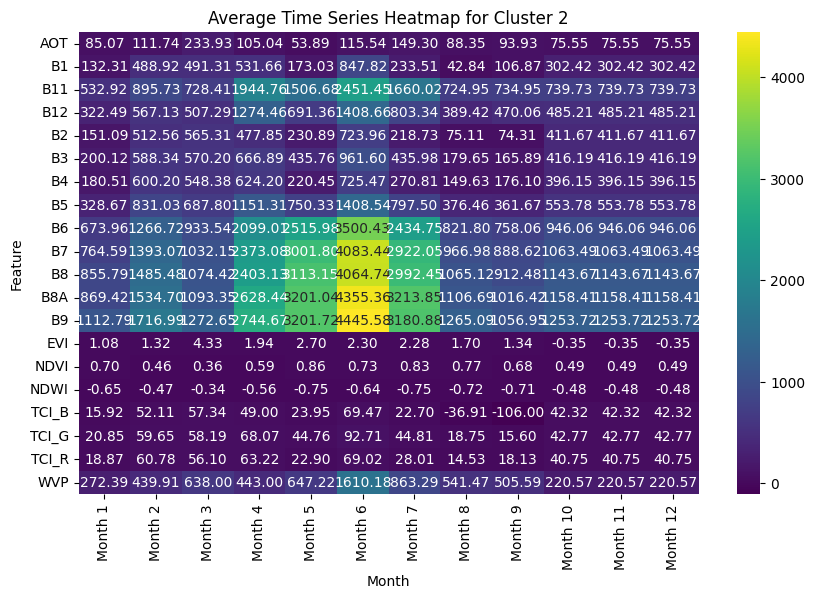

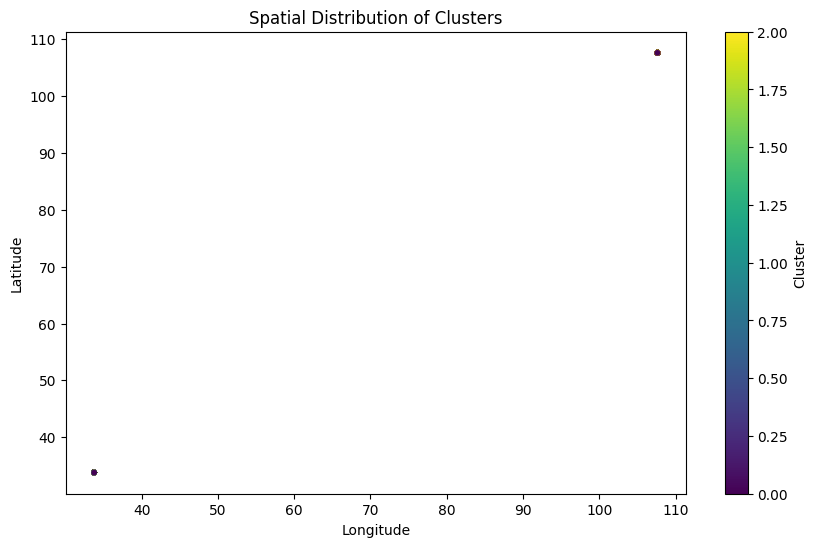

In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import csv

# -------------------------------
# Dataset with Coordinates for Analysis
# -------------------------------
class PixelMonthlyDatasetWithCoords(Dataset):
    """
    Reads a cleaned CSV with columns including:
      system:index, AOT, B1, B11, B12, B2, B3, B4, B5, B6, B7, B8, B8A, B9,
      EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, latitude, longitude

    It groups by ['latitude', 'longitude', 'image_date'] to average the feature columns,
    then groups by (latitude, longitude) to build a time series (of length desired_length) per pixel.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print("Reading CSV file for analysis...")
        self.df = pd.read_csv(
            csv_path,
            parse_dates=['image_date'],
            engine='python',
            on_bad_lines='skip',
            quoting=csv.QUOTE_NONE
        )
        desired_features = [
            "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
            "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
            "TCI_B", "TCI_G", "TCI_R", "WVP"
        ]
        if feature_cols is None:
            self.feature_cols = desired_features
        else:
            self.feature_cols = feature_cols
        # Ensure the desired feature columns are present.
        self.feature_cols = [col for col in self.feature_cols if col in self.df.columns]
        print(f"Detected feature columns: {self.feature_cols}")
        for col in self.feature_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        self.df[self.feature_cols] = self.df.groupby('image_date')[self.feature_cols].ffill()
        if 'latitude' not in self.df.columns or 'longitude' not in self.df.columns:
            raise ValueError("CSV must contain 'latitude' and 'longitude' columns.")
        group_keys = ['latitude', 'longitude', 'image_date']
        print(f"Grouping by keys: {group_keys}")
        grouped = self.df.groupby(group_keys)[self.feature_cols].mean().reset_index()
        self.samples = []
        self.coords = []
        for (lat, lon), grp in grouped.groupby(['latitude', 'longitude']):
            grp_sorted = grp.sort_values('image_date')
            arr = grp_sorted[self.feature_cols].values  # shape (T, D)
            T, D = arr.shape
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)
            self.samples.append(ts_tensor)
            self.coords.append((lat, lon))
        print(f"Constructed {len(self.samples)} time series samples with coordinates.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], torch.tensor(0, dtype=torch.long), self.coords[idx]

# -------------------------------
# (Re)Define the Transformer Autoencoder Architecture (same as during training)
# -------------------------------
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        B, T, D = x.shape
        pos = torch.arange(T, dtype=torch.float).unsqueeze(1)
        i = torch.arange(D, dtype=torch.float).unsqueeze(0)
        angle_rates = 1 / (10000 ** ((2 * (i // 2)) / D))
        angle_rads = pos * angle_rates
        pe = torch.zeros(T, D)
        pe[:, 0::2] = torch.sin(angle_rads[:, 0::2])
        pe[:, 1::2] = torch.cos(angle_rads[:, 1::2])
        pe = pe.unsqueeze(0)
        if x.is_cuda:
            pe = pe.cuda()
        return x + pe

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1, 2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.norm1(x + self.attn(x))
        x = self.norm2(x + self.ff(x))
        return x

class TransformerEncoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2):
        super().__init__()
        self.pos_enc = SimplePosEncoding()
        self.layers = nn.ModuleList([TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)])

    def forward(self, x):
        x = self.pos_enc(x)
        for layer in self.layers:
            x = layer(x)
        latent = x.mean(dim=1)
        return latent

class SimpleDecoder(nn.Module):
    def __init__(self, latent_dim, seq_len, d_model):
        super().__init__()
        self.seq_len = seq_len
        self.fc = nn.Linear(latent_dim, seq_len * d_model)
        self.d_model = d_model

    def forward(self, latent):
        x = self.fc(latent)
        x = x.view(-1, self.seq_len, self.d_model)
        return x

class TransformerAutoencoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, seq_len=12):
        super().__init__()
        self.encoder = TransformerEncoder(d_model, num_heads, ff_hidden, num_layers)
        self.decoder = SimpleDecoder(latent_dim=d_model, seq_len=seq_len, d_model=d_model)

    def forward(self, x):
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon, latent

# -------------------------------
# 3. Load the Saved Model
# -------------------------------
d_model = 20  # Number of features
seq_len = 12
print("Loading the trained model from 'transformer_larch.pth'...")
model = TransformerAutoencoder(d_model=d_model, num_heads=2, ff_hidden=64, num_layers=2, seq_len=seq_len)
model.load_state_dict(torch.load("transformer_larch.pth", map_location=torch.device("cpu")))
model.eval()
print("Model loaded.")

# -------------------------------
# 4. Extract Latent Representations and Coordinates
# -------------------------------
def extract_latents_with_coords(model, csv_path):
    dataset = PixelMonthlyDatasetWithCoords(csv_path, desired_length=12)
    loader = DataLoader(dataset, batch_size=16, shuffle=False)
    model.eval()
    latents = []
    coords = []
    time_series = []  # For later trend analysis
    with torch.no_grad():
        for X, _, coord in tqdm(loader, desc="Extracting latents"):
            _, latent = model(X)
            latents.append(latent.cpu().numpy())
            time_series.extend(X.cpu().numpy())
            coords.extend(coord)
    latents = np.concatenate(latents, axis=0)
    print(f"Extracted latent shape: {latents.shape}")
    return latents, coords, time_series

latents, coords, time_series = extract_latents_with_coords(model, "/content/LarchCN_256x256_2022_monthly_cleaned.csv")

# Check that the number of coordinate entries matches the number of latent vectors.
print(f"Number of coordinate entries: {len(coords)}, Number of latent vectors: {latents.shape[0]}")
min_len = min(len(coords), latents.shape[0])
if len(coords) != latents.shape[0]:
    print("Warning: Mismatch between coordinates and latent vectors. Trimming to the minimum length.")
    coords = coords[:min_len]
    latents = latents[:min_len]

# -------------------------------
# 5. Perform Clustering on the Latents
# -------------------------------
n_clusters = 3  # Manually set number of clusters.
print(f"Clustering latent representations into {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
clusters = kmeans.fit_predict(latents)
print("Clustering complete.")

# Create a DataFrame with coordinates and cluster assignments.
analysis_df = pd.DataFrame({
    'latitude': [c[0] for c in coords],
    'longitude': [c[1] for c in coords],
    'cluster': clusters
})
print("Sample cluster assignments:")
print(analysis_df.head())

# -------------------------------
# 6. Compute Average Time Series Trends per Cluster
# -------------------------------
cluster_avg = {}
for cluster_id in range(n_clusters):
    indices = analysis_df.index[analysis_df['cluster'] == cluster_id].tolist()
    if indices:
        avg_ts = np.mean(np.array([time_series[j] for j in indices]), axis=0)  # shape: (seq_len, num_features)
        cluster_avg[cluster_id] = avg_ts

# -------------------------------
# 7. Print Key Trends per Cluster
# -------------------------------
# Features order: ["AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
# "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI", "TCI_B", "TCI_G", "TCI_R", "WVP"]
# Define Yellowing Index = ((TCI_R + TCI_G) / 2) - TCI_B; (TCI_R index 18, TCI_G index 17, TCI_B index 16)
print("\nKey Trends per Cluster:")
for cluster_id, avg_ts in cluster_avg.items():
    yellowing = ((avg_ts[:, 18] + avg_ts[:, 17]) / 2) - avg_ts[:, 16]
    print(f"\nCluster {cluster_id}:")
    print("Average Yellowing Index Trend over 12 months:")
    print(yellowing)
    print("Average NDVI Trend (index 14):")
    print(avg_ts[:, 14])
    print("Average EVI Trend (index 13):")
    print(avg_ts[:, 13])
    print("Average NDWI Trend (index 15):")
    print(avg_ts[:, 15])
    # You can add additional prints here for other features.

# -------------------------------
# 8. Plot Heatmaps for Each Cluster's Average Time Series
# -------------------------------
feature_names = [
    "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
    "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
    "TCI_B", "TCI_G", "TCI_R", "WVP"
]
for cluster_id, avg_ts in cluster_avg.items():
    plt.figure(figsize=(10, 6))
    df_heat = pd.DataFrame(avg_ts, columns=feature_names)
    df_heat.index = [f"Month {i+1}" for i in range(avg_ts.shape[0])]
    sns.heatmap(df_heat.T, cmap='viridis', annot=True, fmt=".2f")
    plt.title(f"Average Time Series Heatmap for Cluster {cluster_id}")
    plt.xlabel("Month")
    plt.ylabel("Feature")
    plt.show()

# -------------------------------
# 9. Plot Spatial Distribution of Clusters
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(analysis_df['longitude'], analysis_df['latitude'], c=analysis_df['cluster'], cmap='viridis', s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Clusters")
plt.colorbar(label="Cluster")
plt.show()


Loading the trained model from 'transformer_larch.pth'...
Model loaded.
Reading CSV file for segmentation analysis...


<ipython-input-18-d32e613d1627>:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("transformer_larch.pth", map_location=torch.device("cpu")

Grouping by keys: ['latitude', 'longitude', 'image_date']
Constructed 65224 time series samples with coordinates.


Extracted latent shape: (65224, 20)
Number of coordinate entries: 8154, Number of latent vectors: 65224
Sample converted & rounded coordinates: [(33.756, 33.756), (107.624, 107.62), (33.756, 33.756), (107.636, 107.632), (33.756, 33.756)]
Clustering latent representations into 3 clusters...
Clustering complete.
Plotting spatial distribution of clusters using lat/long...


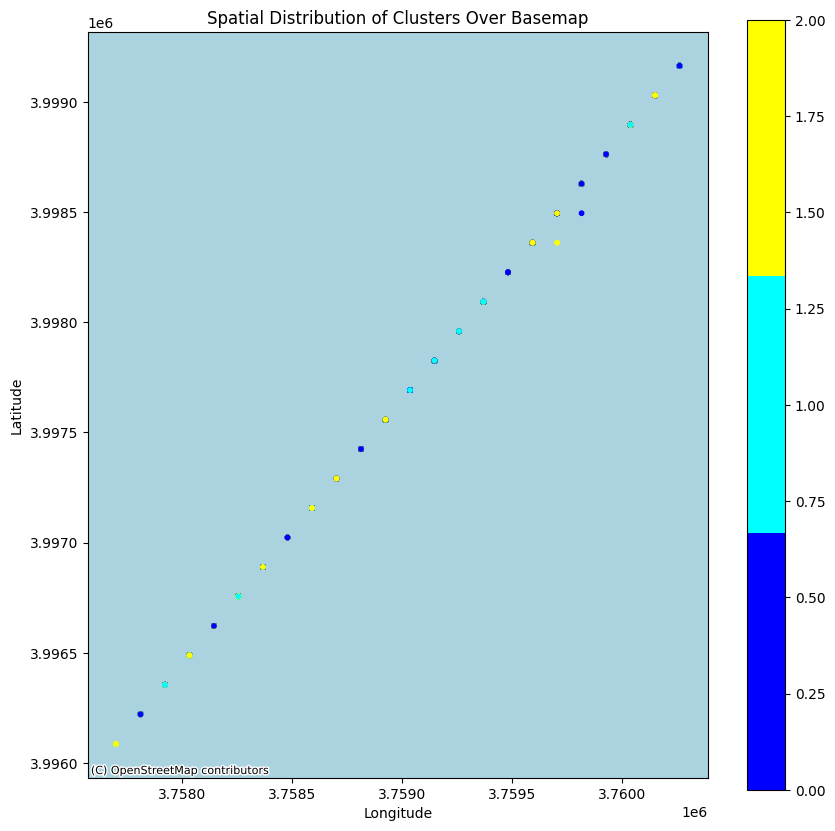


Key Trends per Cluster:

Cluster 0:
Average Yellowing Index Trend (per month):
[ 7.9142075 13.22509   -3.8357162 -1.2845173 12.112469  11.847149
 14.370464  69.175095  72.79732    2.2499275  2.2499275  2.2499275]
Average NDVI Trend (index 14):
[0.5060686  0.34254333 0.23261742 0.4851666  0.8802997  0.7972635
 0.8460009  0.69648653 0.6022357  0.42172158 0.42172158 0.42172158]
Average EVI Trend (index 13):
[ 0.8132601   0.22107172  2.8045022  -1.836278    2.6197586   2.8684962
  2.286039    1.3443216   0.7901214   0.81260586  0.81260586  0.81260586]
Average NDWI Trend (index 15):
[-0.5033394  -0.38308147 -0.22602582 -0.44476804 -0.76651657 -0.7014306
 -0.75871533 -0.7036729  -0.6711788  -0.43784058 -0.43784058 -0.43784058]

Cluster 1:
Average Yellowing Index Trend (per month):
[ 9.203987   16.393204   -0.38908386  4.9701233  12.966347    8.486954
 16.041553   25.316624   49.06662     4.1799545   4.1799545   4.1799545 ]
Average NDVI Trend (index 14):
[ 0.3135103   0.23114848 -0.00639563 

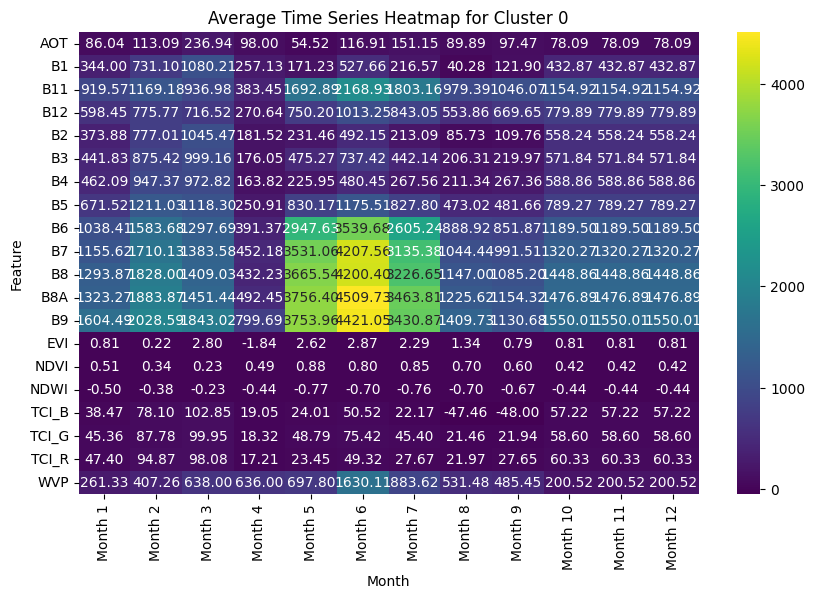

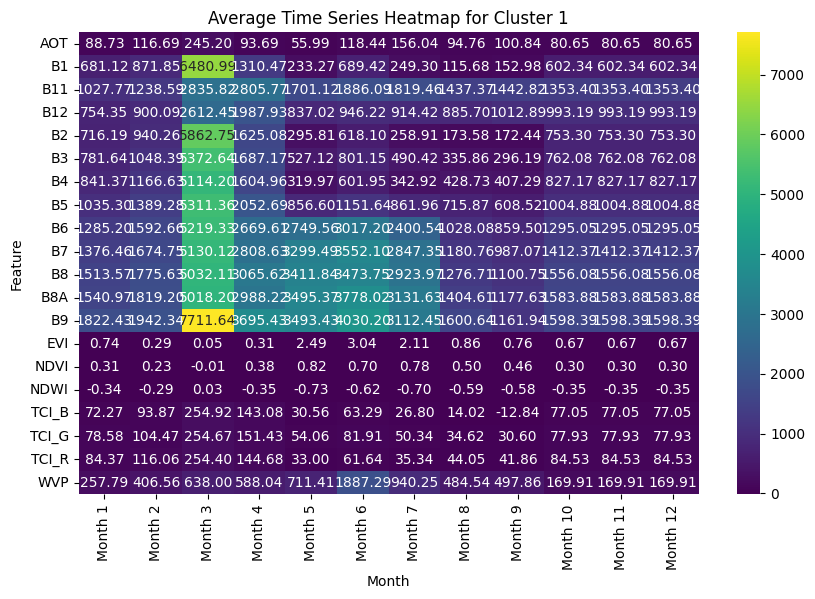

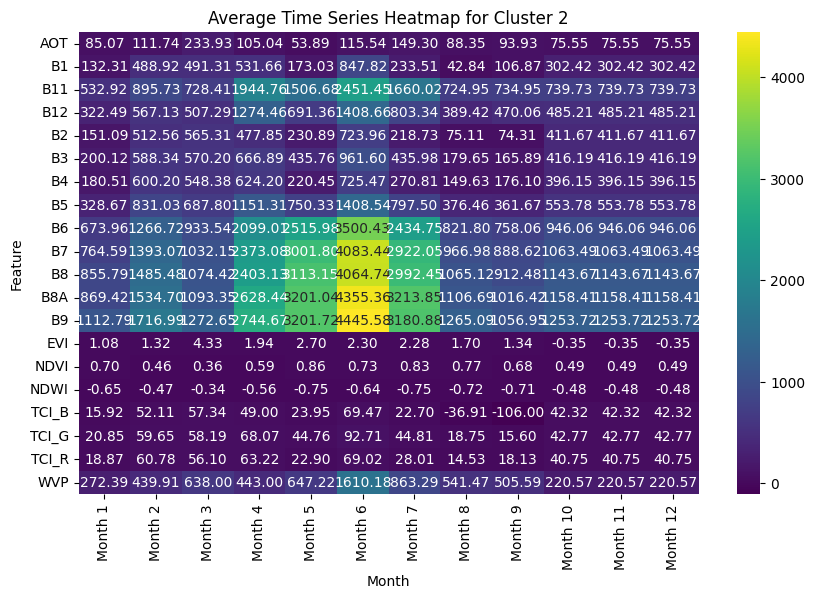

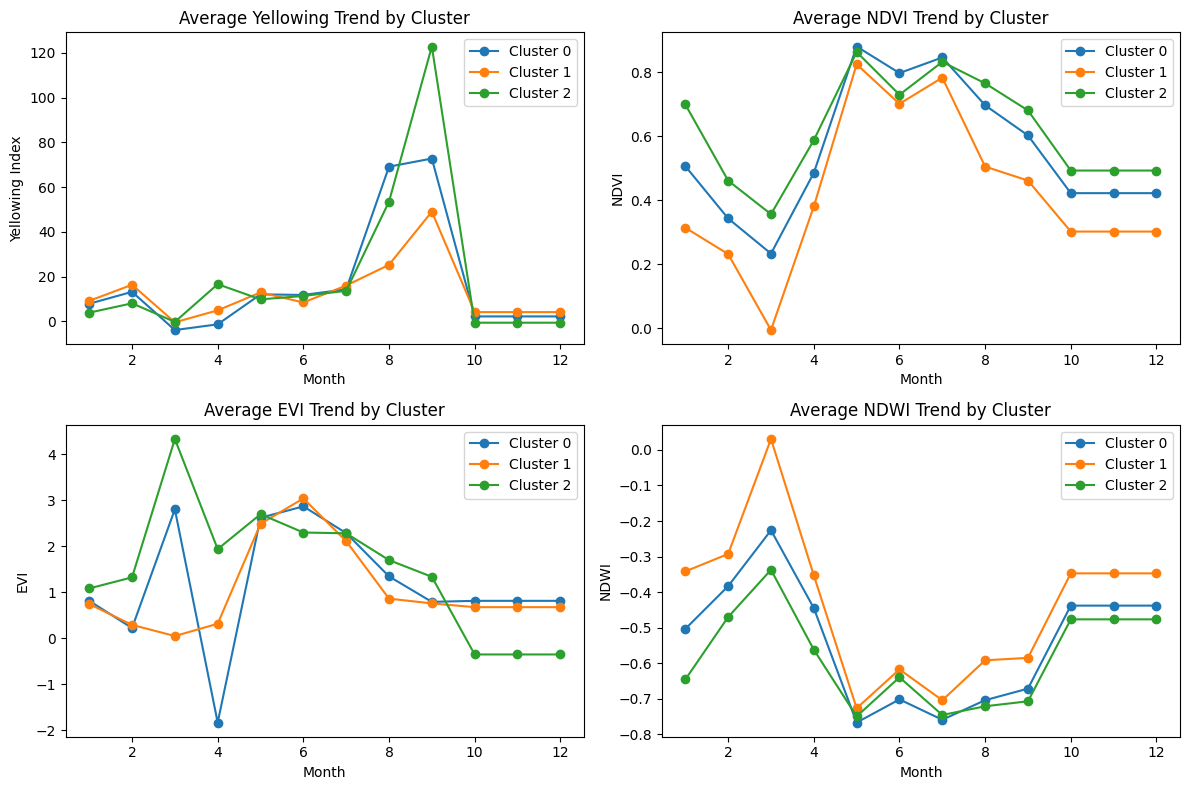

In [ ]:
import math
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from tqdm import tqdm
import contextily as ctx  # for basemap overlay
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import ListedColormap

# -----------------------------------
# 1. Dataset with Coordinates (for segmentation)
# -----------------------------------
class PixelMonthlyDatasetWithCoords(Dataset):
    """
    Reads a cleaned CSV with columns including:
      [AOT, B1, B11, B12, B2, B3, B4, B5, B6, B7, B8, B8A, B9,
       EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, latitude, longitude]

    It groups the data by [latitude, longitude, image_date] (averaging the numeric features)
    and then by (latitude, longitude) to create a time series (of length desired_length) per pixel.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print("Reading CSV file for segmentation analysis...")
        self.df = pd.read_csv(
            csv_path,
            parse_dates=['image_date'],
            engine='python',
            on_bad_lines='skip',
            quoting=csv.QUOTE_NONE
        )
        desired_features = [
            "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
            "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
            "TCI_B", "TCI_G", "TCI_R", "WVP"
        ]
        if feature_cols is None:
            self.feature_cols = desired_features
        else:
            self.feature_cols = feature_cols
        # Ensure features are numeric.
        for col in self.feature_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        self.df[self.feature_cols] = self.df.groupby('image_date')[self.feature_cols].ffill()

        if 'latitude' not in self.df.columns or 'longitude' not in self.df.columns:
            raise ValueError("CSV must contain 'latitude' and 'longitude' columns.")
        group_keys = ['latitude', 'longitude', 'image_date']
        print(f"Grouping by keys: {group_keys}")
        grouped = self.df.groupby(group_keys)[self.feature_cols].mean().reset_index()

        self.samples = []
        self.coords = []  # List of (latitude, longitude) tuples.
        for (lat, lon), grp in grouped.groupby(['latitude', 'longitude']):
            grp_sorted = grp.sort_values('image_date')
            arr = grp_sorted[self.feature_cols].values  # shape (T, D)
            T, D = arr.shape
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)
            self.samples.append(ts_tensor)
            self.coords.append((lat, lon))
        print(f"Constructed {len(self.samples)} time series samples with coordinates.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], torch.tensor(0, dtype=torch.long), self.coords[idx]

# -----------------------------------
# 2. Transformer Autoencoder Components (Same as during training)
# -----------------------------------
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        B, T, D = x.shape
        pos = torch.arange(T, dtype=torch.float).unsqueeze(1)
        i = torch.arange(D, dtype=torch.float).unsqueeze(0)
        angle_rates = 1 / (10000 ** ((2 * (i // 2)) / D))
        angle_rads = pos * angle_rates
        pe = torch.zeros(T, D)
        pe[:, 0::2] = torch.sin(angle_rads[:, 0::2])
        pe[:, 1::2] = torch.cos(angle_rads[:, 1::2])
        pe = pe.unsqueeze(0)
        if x.is_cuda:
            pe = pe.cuda()
        return x + pe

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1,2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.norm1(x + self.attn(x))
        x = self.norm2(x + self.ff(x))
        return x

class TransformerEncoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2):
        super().__init__()
        self.pos_enc = SimplePosEncoding()
        self.layers = nn.ModuleList([TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)])

    def forward(self, x):
        x = self.pos_enc(x)
        for layer in self.layers:
            x = layer(x)
        latent = x.mean(dim=1)
        return latent

class SimpleDecoder(nn.Module):
    def __init__(self, latent_dim, seq_len, d_model):
        super().__init__()
        self.seq_len = seq_len
        self.fc = nn.Linear(latent_dim, seq_len * d_model)
        self.d_model = d_model

    def forward(self, latent):
        x = self.fc(latent)
        x = x.view(-1, self.seq_len, self.d_model)
        return x

class TransformerAutoencoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, seq_len=12):
        super().__init__()
        self.encoder = TransformerEncoder(d_model, num_heads, ff_hidden, num_layers)
        self.decoder = SimpleDecoder(latent_dim=d_model, seq_len=seq_len, d_model=d_model)

    def forward(self, x):
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon, latent

# -----------------------------------
# 3. Load the Saved Model (without retraining)
# -----------------------------------
d_model = 20  # number of features (adjust if necessary)
seq_len = 12
print("Loading the trained model from 'transformer_larch.pth'...")
model = TransformerAutoencoder(d_model=d_model, num_heads=2, ff_hidden=64, num_layers=2, seq_len=seq_len)
model.load_state_dict(torch.load("transformer_larch.pth", map_location=torch.device("cpu")))
model.eval()
print("Model loaded.")

# -----------------------------------
# 4. Extract Latents, Coordinates, and Original Time Series
# -----------------------------------
def extract_latents_with_coords(model, csv_path):
    dataset = PixelMonthlyDatasetWithCoords(csv_path, desired_length=12)
    loader = DataLoader(dataset, batch_size=16, shuffle=False)
    model.eval()
    latents = []
    coords = []
    time_series = []  # original time series per sample
    with torch.no_grad():
        for X, _, coord in tqdm(loader, desc="Extracting latents", leave=False):
            _, latent = model(X)
            latents.append(latent.cpu().numpy())
            time_series.extend(X.cpu().numpy())
            coords.extend(coord)
    latents = np.concatenate(latents, axis=0)
    print(f"Extracted latent shape: {latents.shape}")
    return latents, coords, time_series

latents, coords, time_series = extract_latents_with_coords(model, "/content/LarchCN_256x256_2022_monthly_cleaned.csv")
print(f"Number of coordinate entries: {len(coords)}, Number of latent vectors: {latents.shape[0]}")
min_len = min(len(coords), latents.shape[0])
if len(coords) != latents.shape[0]:
    print("Warning: Mismatch between coordinates and latent vectors. Trimming to minimum length.")
    coords = coords[:min_len]
    latents = latents[:min_len]

# --- Extra Step: Convert, Check, and Round Coordinates to Floats ---
coords_fixed = []
for item in coords:
    try:
        lat = float(item[0])
        lon = float(item[1])
    except Exception as e:
        lat = float(item[0].item()) if hasattr(item[0], 'item') else float(item[0])
        lon = float(item[1].item()) if hasattr(item[1], 'item') else float(item[1])
    # Optional: If the latitude value is > 90, swap them.
    if lat > 90:
        lat, lon = lon, lat
    # Round to 3 decimals.
    coords_fixed.append((round(lat, 3), round(lon, 3)))
print("Sample converted & rounded coordinates:", coords_fixed[:5])

# -----------------------------------
# 5. Cluster the Latents
# -----------------------------------
n_clusters = 3  # manually specified
print(f"Clustering latent representations into {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
clusters = kmeans.fit_predict(latents)
print("Clustering complete.")

# -----------------------------------
# 6. Spatial Distribution of Clusters (Scatter Plot)
# -----------------------------------
# Use the rounded coordinates and actual lat/long.
coords_df = pd.DataFrame(coords_fixed, columns=["latitude", "longitude"])
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(coords_df, geometry=gpd.points_from_xy(coords_df.longitude, coords_df.latitude))
gdf["cluster"] = clusters[:len(gdf)]
gdf.crs = "EPSG:4326"  # WGS84
gdf_proj = gdf.to_crs(epsg=3857)  # Convert to Web Mercator

print("Plotting spatial distribution of clusters using lat/long...")
fig, ax = plt.subplots(figsize=(10, 10))
# Use a custom ListedColormap with 3 colors: assign cluster 0 = blue, 1 = cyan, 2 = yellow.
cmap_custom = ListedColormap(["blue", "cyan", "yellow"])
gdf_proj.plot(column="cluster", ax=ax, cmap=cmap_custom, markersize=10, legend=True)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Spatial Distribution of Clusters Over Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# -----------------------------------
# 7. Analyze and Print Key Trends per Cluster
# -----------------------------------
# Feature order is assumed:
# ["AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
#  "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI", "TCI_B", "TCI_G", "TCI_R", "WVP"]
# Define Yellowing Index = ((TCI_R + TCI_G)/2) - TCI_B; (indices: TCI_R=18, TCI_G=17, TCI_B=16)
cluster_avg = {}
for cluster_id in range(n_clusters):
    indices = [i for i, cl in enumerate(clusters) if cl == cluster_id]
    if indices:
        avg_ts = np.mean(np.array([time_series[i] for i in indices]), axis=0)  # shape: (seq_len, num_features)
        cluster_avg[cluster_id] = avg_ts

print("\nKey Trends per Cluster:")
for cluster_id, avg_ts in cluster_avg.items():
    yellowing = ((avg_ts[:, 18] + avg_ts[:, 17]) / 2) - avg_ts[:, 16]
    print(f"\nCluster {cluster_id}:")
    print("Average Yellowing Index Trend (per month):")
    print(yellowing)
    print("Average NDVI Trend (index 14):")
    print(avg_ts[:, 14])
    print("Average EVI Trend (index 13):")
    print(avg_ts[:, 13])
    print("Average NDWI Trend (index 15):")
    print(avg_ts[:, 15])

# -----------------------------------
# 8. Plot Heatmaps of Average Time Series per Cluster
# -----------------------------------
feature_names = [
    "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
    "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
    "TCI_B", "TCI_G", "TCI_R", "WVP"
]
for cluster_id, avg_ts in cluster_avg.items():
    plt.figure(figsize=(10, 6))
    df_heat = pd.DataFrame(avg_ts, columns=feature_names)
    df_heat.index = [f"Month {i+1}" for i in range(avg_ts.shape[0])]
    sns.heatmap(df_heat.T, cmap='viridis', annot=True, fmt=".2f")
    plt.title(f"Average Time Series Heatmap for Cluster {cluster_id}")
    plt.xlabel("Month")
    plt.ylabel("Feature")
    plt.show()

# -----------------------------------
# 9. Plot 2D Time Series Graphs for Key Indices per Cluster
# -----------------------------------
indices_info = {
    "Yellowing": {"calc": lambda ts: ((ts[:, 18] + ts[:, 17]) / 2) - ts[:, 16], "ylabel": "Yellowing Index"},
    "NDVI": {"index": 14, "ylabel": "NDVI"},
    "EVI": {"index": 13, "ylabel": "EVI"},
    "NDWI": {"index": 15, "ylabel": "NDWI"}
}
months = np.arange(1, seq_len+1)

plt.figure(figsize=(12, 8))
for idx_name, info in indices_info.items():
    plt.subplot(2, 2, list(indices_info.keys()).index(idx_name)+1)
    for cluster_id, avg_ts in cluster_avg.items():
        if idx_name == "Yellowing":
            values = ((avg_ts[:, 18] + avg_ts[:, 17]) / 2) - avg_ts[:, 16]
        else:
            values = avg_ts[:, info["index"]]
        plt.plot(months, values, marker='o', label=f"Cluster {cluster_id}")
    plt.xlabel("Month")
    plt.ylabel(info["ylabel"])
    plt.title(f"Average {idx_name} Trend by Cluster")
    plt.legend()
plt.tight_layout()
plt.show()


Fine tuning the model
we iterate over 15 256x256 patches.

In [ ]:
# ----- 0. Google Drive Authentication -----
from google.colab import drive
drive.mount('/content/drive')

import glob
import os
import pandas as pd

# ----- 1. Combine CSV Files from a Google Drive Folder -----
# Set the folder path where your 15 patch CSVs are stored.
folder_path = '/content/drive/MyDrive/2025-02-09_larch'  # adjust if needed
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
print("Found CSV files:", csv_files)

# Read and concatenate all CSV files into one DataFrame.
df_list = []
for f in csv_files:
    print("Reading file:", f)
    df = pd.read_csv(f)
    df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)
# Optionally, save the combined CSV for reference.
combined_csv_path = "combined_larch_patches.csv"
combined_df.to_csv(combined_csv_path, index=False)
print("Combined CSV saved to", combined_csv_path)

# ----- 2. Define the PixelMonthlyDataset Class -----
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import csv

class PixelMonthlyDataset(Dataset):
    """
    Reads a CSV with columns such as:
      system:index, AOT, B1, B11, B12, B2, B3, B4, B5, B6, B7, B8, B8A, B9,
      EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, tile_id, .geo,
      latitude, longitude
    Groups rows by the coordinate columns (latitude, longitude) and image_date,
    averages the numeric feature columns, and then builds a 12‐step time series per pixel.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print("Reading CSV file for transformer training...")
        self.df = pd.read_csv(
            csv_path,
            parse_dates=['image_date'],
            usecols=lambda col: col not in ['.geo', 'tile_id', 'system:index'],
            engine='python',
            on_bad_lines='skip',
            quoting=csv.QUOTE_NONE
        )
        desired_features = [
            "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
            "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
            "TCI_B", "TCI_G", "TCI_R", "WVP"
        ]
        if feature_cols is None:
            self.feature_cols = desired_features
        else:
            self.feature_cols = feature_cols
        # Use only the columns that exist.
        self.feature_cols = [col for col in self.feature_cols if col in self.df.columns]
        print(f"Detected feature columns: {self.feature_cols}")
        self.desired_length = desired_length
        for col in self.feature_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        self.df[self.feature_cols] = self.df.groupby('image_date')[self.feature_cols].ffill()

        # Group by coordinates and image_date.
        if 'latitude' in self.df.columns and 'longitude' in self.df.columns:
            group_keys = ['latitude', 'longitude', 'image_date']
        else:
            group_keys = ['image_date']
        print(f"Grouping by keys: {group_keys}")
        grouped = self.df.groupby(group_keys)[self.feature_cols].mean().reset_index()

        self.samples = []
        if 'latitude' in grouped.columns and 'longitude' in grouped.columns:
            for (lat, lon), grp in grouped.groupby(['latitude', 'longitude']):
                grp_sorted = grp.sort_values('image_date')
                arr = grp_sorted[self.feature_cols].values  # shape (T, D)
                T, D = arr.shape
                if T < desired_length:
                    pad = np.tile(arr[-1:], (desired_length - T, 1))
                    arr = np.vstack([arr, pad])
                elif T > desired_length:
                    arr = arr[:desired_length]
                ts_tensor = torch.tensor(arr, dtype=torch.float)
                self.samples.append(ts_tensor)
        else:
            grp_sorted = grouped.sort_values('image_date')
            arr = grp_sorted[self.feature_cols].values
            T, D = arr.shape
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)
            self.samples.append(ts_tensor)
        print(f"Constructed {len(self.samples)} time series samples.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], torch.tensor(0, dtype=torch.long)

# ----- 3. Define the Transformer Autoencoder Components -----
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        B, T, D = x.shape
        pos = torch.arange(T, dtype=torch.float).unsqueeze(1)
        i = torch.arange(D, dtype=torch.float).unsqueeze(0)
        angle_rates = 1 / (10000 ** ((2 * (i // 2)) / D))
        angle_rads = pos * angle_rates
        pe = torch.zeros(T, D)
        pe[:, 0::2] = torch.sin(angle_rads[:, 0::2])
        pe[:, 1::2] = torch.cos(angle_rads[:, 1::2])
        pe = pe.unsqueeze(0)
        if x.is_cuda:
            pe = pe.cuda()
        return x + pe

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1,2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.norm1(x + self.attn(x))
        x = self.norm2(x + self.ff(x))
        return x

class TransformerEncoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2):
        super().__init__()
        self.pos_enc = SimplePosEncoding()
        self.layers = nn.ModuleList([TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)])

    def forward(self, x):
        x = self.pos_enc(x)
        for layer in self.layers:
            x = layer(x)
        latent = x.mean(dim=1)
        return latent

class SimpleDecoder(nn.Module):
    def __init__(self, latent_dim, seq_len, d_model):
        super().__init__()
        self.seq_len = seq_len
        self.fc = nn.Linear(latent_dim, seq_len * d_model)
        self.d_model = d_model

    def forward(self, latent):
        x = self.fc(latent)
        x = x.view(-1, self.seq_len, self.d_model)
        return x

class TransformerAutoencoder(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, seq_len=12):
        super().__init__()
        self.encoder = TransformerEncoder(d_model, num_heads, ff_hidden, num_layers)
        self.decoder = SimpleDecoder(latent_dim=d_model, seq_len=seq_len, d_model=d_model)

    def forward(self, x):
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon, latent

# ----- 4. Training and Saving the Model -----
def train_and_save_autoencoder(csv_path, save_path="transformer_larch_finetuned.pth", epochs=50):
    print("Initializing dataset...")
    dataset = PixelMonthlyDataset(csv_path, desired_length=12)
    ds_len = len(dataset)
    print(f"Dataset contains {ds_len} samples.")
    if ds_len < 2:
        print("Dataset has less than 2 samples; using entire dataset for training/testing.")
        train_ds = dataset
        test_ds = dataset
    else:
        train_size = int(0.8 * ds_len)
        test_size = ds_len - train_size
        train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

    d_model = len(dataset.feature_cols)
    seq_len = 12
    print(f"Using d_model = {d_model} and sequence length = {seq_len}.")
    model = TransformerAutoencoder(d_model=d_model, num_heads=2, ff_hidden=64, num_layers=2, seq_len=seq_len)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    print("Starting training for", epochs, "epochs...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} training", leave=False):
            optimizer.zero_grad()
            recon, _ = model(X)
            loss = criterion(recon, X)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            total_loss += loss.item() * X.size(0)
        avg_loss = total_loss / len(train_ds)
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for X, _ in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} testing", leave=False):
                recon, _ = model(X)
                loss = criterion(recon, X)
                test_loss += loss.item() * X.size(0)
        avg_test_loss = test_loss / len(test_ds)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    print("Training complete.")
    torch.save(model.state_dict(), save_path)
    print(f"Model saved as {save_path}")
    return model

# ----- 5. Main Execution -----
if __name__ == "__main__":
    # Use the combined CSV file created earlier.
    csv_path = combined_csv_path  # "combined_larch_patches.csv"
    model = train_and_save_autoencoder(csv_path, save_path="transformer_larch_finetuned.pth", epochs=50)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found CSV files: ['/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_4.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_3.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_2.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_1.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_0.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_0.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_2.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_0.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_3.csv', '/content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_1

#Feb 9 update

incorporating DEM data will not work as there is not an available dataset that gives us DEM data at 10m resolution.

We have defined a new area of study with a total of 28 patches instead of 1500.

[107.57481296526105, 33.62952626245739],
[107.67265995012433, 33.62952626245739],
[107.67265995012433, 33.786036563473694],
[107.57481296526105, 33.786036563473694]

When you approximate the distances at this latitude, the width is roughly 9,060 meters and the height about 17,440 meters.
At 10 m resolution that is about 906 × 1744 pixels.
To “snap” the study area so that it is exactly divisible by 256×256 patches (each patch being 256 pixels on a side, or 2560 m at 10 m resolution), we adjust the study area to have dimensions that are multiples of 2560 m.
For example, we can choose a study area of 10,240 m in width (i.e. 1024 pixels) and 17,920 m in height (i.e. 1792 pixels).
Then, the number of 256×256 patches is:
• Horizontal patches: 10,240 m ÷ 2560 m = 4
• Vertical patches: 17,920 m ÷ 2560 m = 7
• Total patches: 4 × 7 = 28 patches




#latest working GEE code:


// ======================================================
// GEE Script: Export One CSV Per 256x256 Patch Over an Adjusted Study Area (using lat/lon arithmetic)
// ======================================================

// ----- 1. Define the Original Study Area Polygon (in lat/lon) -----
var origPolygon = ee.Geometry.Polygon([
  [
    [107.57481296526105, 33.62952626245739],
    [107.67265995012433, 33.62952626245739],
    [107.67265995012433, 33.786036563473694],
    [107.57481296526105, 33.786036563473694],
    [107.57481296526105, 33.62952626245739]
  ]
]);

// Compute the centroid of the original polygon.
var centroid = origPolygon.centroid();
var centerCoords = centroid.coordinates();
var centerLon = ee.Number(centerCoords.get(0));
var centerLat = ee.Number(centerCoords.get(1));
print("Centroid (lon, lat):", centerLon, centerLat);

// ----- 2. Define the New Study Area Using Approximate Meter-to-Degree Conversions -----
// Desired new dimensions (in meters) to allow an integer number of 256×256 patches.
// For 28 patches we choose: width = 10,240 m, height = 17,920 m.
var desiredWidthMeters = 10240;
var desiredHeightMeters = 17920;

// Conversion factors at the centroid (approximate)
var metersPerDegLat = 111320;  // roughly
var cosLat = centerLat.multiply(Math.PI).divide(180).cos();
var metersPerDegLon = ee.Number(111320).multiply(cosLat);

// Compute new dimensions in degrees.
var newWidthDeg = ee.Number(desiredWidthMeters).divide(metersPerDegLon);
var newHeightDeg = ee.Number(desiredHeightMeters).divide(metersPerDegLat);
print("New study area dimensions (degrees):", newWidthDeg, "x", newHeightDeg);

// Define the new study area (centered on the centroid).
var halfWidthDeg = newWidthDeg.divide(2);
var halfHeightDeg = newHeightDeg.divide(2);
var newLonMin = centerLon.subtract(halfWidthDeg);
var newLonMax = centerLon.add(halfWidthDeg);
var newLatMin = centerLat.subtract(halfHeightDeg);
var newLatMax = centerLat.add(halfHeightDeg);
var newStudyArea = ee.Geometry.Rectangle([newLonMin, newLatMin, newLonMax, newLatMax]);
Map.centerObject(newStudyArea, 10);
Map.addLayer(newStudyArea, {color: 'red'}, 'Adjusted Study Area');

// ----- 3. Generate a Grid of 256x256 Patches in Degrees -----
// At 10 m resolution, a 256×256 patch covers 256*10 = 2560 m on a side.
// Convert 2560 m to degrees using the same conversion factors.
var patchWidthDeg = ee.Number(2560).divide(metersPerDegLon);
var patchHeightDeg = ee.Number(2560).divide(metersPerDegLat);
print("Patch size (degrees):", patchWidthDeg, "x", patchHeightDeg);

// Compute number of patches horizontally and vertically.
var numCols = newWidthDeg.divide(patchWidthDeg).floor();
var numRows = newHeightDeg.divide(patchHeightDeg).floor();
print("Number of patches (cols x rows):", numCols.getInfo(), "x", numRows.getInfo(),
      "=", numCols.multiply(numRows).getInfo(), "patches.");

// Create grid features.
var gridFeatures = [];
var nCols = numCols.getInfo();
var nRows = numRows.getInfo();
for (var i = 0; i < nCols; i++) {
  for (var j = 0; j < nRows; j++) {
    var lon0 = newLonMin.add(ee.Number(i).multiply(patchWidthDeg));
    var lat0 = newLatMin.add(ee.Number(j).multiply(patchHeightDeg));
    var lon1 = lon0.add(patchWidthDeg);
    var lat1 = lat0.add(patchHeightDeg);
    var patchGeom = ee.Geometry.Rectangle([lon0, lat0, lon1, lat1]);
    var patchFeature = ee.Feature(patchGeom, { id: 'patch_' + i + '_' + j });
    gridFeatures.push(patchFeature);
  }
}
var gridFC = ee.FeatureCollection(gridFeatures);
print("Total patches in grid:", gridFC.size());
Map.addLayer(gridFC, {color: 'blue'}, "Grid Patches");

// ----- 4. Define Date Range and Sentinel-2 Image Collection -----
var startDate = '2022-01-01';
var endDate   = '2022-12-31';
var s2Collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
  .filterDate(startDate, endDate)
  .filterBounds(newStudyArea)
  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20));

// ----- 5. Define Functions for Image Processing (Without DEM) -----
function maskClouds(image) {
  var qa = image.select('QA60');
  var cloudBitMask = 1 << 10;
  var cirrusBitMask = 1 << 11;
  var mask = qa.bitwiseAnd(cloudBitMask).eq(0)
              .and(qa.bitwiseAnd(cirrusBitMask).eq(0));
  return image.updateMask(mask);
}

function addIndices(image) {
  var ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI');
  var evi = image.expression(
    '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
    {
      'NIR': image.select('B8'),
      'RED': image.select('B4'),
      'BLUE': image.select('B2')
    }
  ).rename('EVI');
  var ndwi = image.expression(
    '(GREEN - NIR) / (GREEN + NIR)',
    {
      'GREEN': image.select('B3'),
      'NIR': image.select('B8')
    }
  ).rename('NDWI');
  return image.addBands([ndvi, evi, ndwi]);
}

function selectBands(image) {
  var originalBands = ['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B11','B12','AOT','WVP'];
  var rgbBands = ['TCI_R','TCI_G','TCI_B'];
  var indexBands = ['NDVI','EVI','NDWI'];
  return image.select(originalBands.concat(rgbBands).concat(indexBands));
}

var s2Processed = s2Collection
  .map(maskClouds)
  .map(addIndices)
  .map(selectBands)
  .map(function(img) { return img.unmask(-999); });

// ----- 6. For Each Patch and Each Month, Sample Pixels -----
// For each patch and for each month (1–12), select the earliest image and sample every pixel.
var months = ee.List.sequence(1, 12);
var patchList = gridFC.toList(gridFC.size());
var numPatches = patchList.size().getInfo();
print("Number of patches to process:", numPatches);

for (var i = 0; i < numPatches; i++) {
  var patch = ee.Feature(patchList.get(i));
  var patchId = patch.get('id');
  print("Processing patch:", patchId);
  
  var monthlySamples = months.map(function(m) {
    var monthlyImages = s2Processed
      .filter(ee.Filter.calendarRange(m, m, 'month'))
      .filterBounds(patch.geometry());
    var sorted = monthlyImages.sort('system:time_start');
    var firstImage = ee.Image(sorted.first());
    var samples = ee.Algorithms.If(
      sorted.size().gt(0),
      firstImage.sample({
        region: patch.geometry(),
        scale: 10,
        projection: 'EPSG:4326',
        geometries: true
      }).map(function(feat) {
        return feat.set({
          'image_date': firstImage.date().format('YYYY-MM-dd'),
          'patch_id': patchId
        });
      }),
      ee.FeatureCollection([])
    );
    return ee.FeatureCollection(samples);
  });
  
  var patchSamples = ee.FeatureCollection(monthlySamples).flatten();
  print("Patch", patchId, "samples count:", patchSamples.size());
  
  Export.table.toDrive({
    collection: patchSamples,
    description: 'LarchCN_256x256_2022_monthly_' + patchId.getInfo(),
    fileFormat: 'CSV',
    folder: '2025-02-09_larch'
  });
}

print("Script executed. Check the Tasks tab for exports.");


#Feb 12 update
downloaded the 28 patches
clean all 28 patches first


In [ ]:
import pandas as pd
import re
import os

def clean_csv(input_path):
    # Read the CSV file
    df = pd.read_csv(input_path)

    # Extract latitude and longitude from .geo column using regex
    def extract_coordinates(geo_str):
        match = re.search(r'\[([-+]?\d*\.\d+),\s*([-+]?\d*\.\d+)\]', geo_str)
        if match:
            return float(match.group(1)), float(match.group(2))
        return None, None

    df['longitude'], df['latitude'] = zip(*df['.geo'].apply(extract_coordinates))

    # Drop unnecessary columns
    df = df.drop(columns=['system:index', 'patch_id', '.geo'])

    # Ensure all feature columns are numeric
    feature_cols = [
        "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
        "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
        "TCI_B", "TCI_G", "TCI_R", "WVP"
    ]
    for col in feature_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Handle missing values (forward fill)
    df[feature_cols] = df[feature_cols].ffill()

    # Save the cleaned CSV
    output_path = os.path.splitext(input_path)[0] + "_cleaned.csv"
    df.to_csv(output_path, index=False)
    print(f"Cleaned CSV saved to: {output_path}")

# Example usage
if __name__ == "__main__":
    input_csv_path = "/content/LarchCN_256x256_2022_monthly_patch_1_1.csv"  # Update this path
    clean_csv(input_csv_path)

Cleaned CSV saved to: /content/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv


In [ ]:
import pandas as pd
import re
import os
import glob
import csv
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive (if running in Colab)
drive.mount('/content/drive')

# -------------------------------------------------------------------
# DO NOT MODIFY THE FOLLOWING clean_csv FUNCTION (including its comments)
# -------------------------------------------------------------------
def clean_csv(input_path):
    # Read the CSV file
    df = pd.read_csv(input_path)

    # Extract latitude and longitude from .geo column using regex
    def extract_coordinates(geo_str):
        match = re.search(r'\[([-+]?\d*\.\d+),\s*([-+]?\d*\.\d+)\]', geo_str)
        if match:
            return float(match.group(1)), float(match.group(2))
        return None, None

    df['longitude'], df['latitude'] = zip(*df['.geo'].apply(extract_coordinates))

    # Drop unnecessary columns
    df = df.drop(columns=['system:index', 'patch_id', '.geo'])

    # Ensure all feature columns are numeric
    feature_cols = [
        "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
        "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
        "TCI_B", "TCI_G", "TCI_R", "WVP"
    ]
    for col in feature_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Handle missing values (forward fill)
    df[feature_cols] = df[feature_cols].ffill()

    # Save the cleaned CSV
    output_path = os.path.splitext(input_path)[0] + "_cleaned.csv"
    df.to_csv(output_path, index=False)
    print(f"Cleaned CSV saved to: {output_path}")
    return output_path

# -------------------------------------------------------------------
# Function to Detect Non-Numeric Columns
# -------------------------------------------------------------------
def detect_non_numeric_columns(csv_file):
    """
    Reads csv_file and checks each column for non-numeric values.
    Returns a dictionary mapping column names to the number of entries that become NaN
    after converting to numeric (i.e. problematic entries).
    """
    df = pd.read_csv(csv_file, engine='python', on_bad_lines='skip', quoting=csv.QUOTE_NONE)
    non_numeric = {}
    for col in df.columns:
        try:
            converted = pd.to_numeric(df[col], errors='coerce')
            additional_nans = converted.isna() & ~df[col].isna()
            count = additional_nans.sum()
            if count > 0:
                non_numeric[col] = count
        except Exception as e:
            non_numeric[col] = str(e)
    return non_numeric

# -------------------------------------------------------------------
# Main Processing: Iterate Through All CSV Files in the Google Drive Folder,
# Clean Each One, and Detect Non-Numeric Columns.
# -------------------------------------------------------------------
folder_path = "/content/drive/MyDrive/2025-02-09_larch"  # Update if necessary.
# Get list of all CSV files in the folder.
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
print(f"Found {len(csv_files)} CSV files in {folder_path}")

# Iterate through each CSV file using tqdm.
for csv_file in tqdm(csv_files, desc="Processing CSV files"):
    # If the file is already cleaned (ends with _cleaned.csv), skip cleaning.
    if not csv_file.endswith("_cleaned.csv"):
        cleaned_path = clean_csv(csv_file)
    else:
        cleaned_path = csv_file
    print(f"\nDetecting non-numeric columns in: {cleaned_path}")
    problems = detect_non_numeric_columns(cleaned_path)
    if problems:
        print("Columns with non-numeric issues:")
        for col, count in problems.items():
            print(f"  {col}: {count}")
    else:
        print("All columns are numeric (or properly handled).")


Mounted at /content/drive
Found 31 CSV files in /content/drive/MyDrive/2025-02-09_larch


Processing CSV files:   0%|          | 0/31 [00:00<?, ?it/s]

Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_1_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_1_cleaned.csv


Processing CSV files:   3%|▎         | 1/31 [00:27<13:57, 27.91s/it]

Columns with non-numeric issues:
  image_date: 551874
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_2_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_2_cleaned.csv


Processing CSV files:   6%|▋         | 2/31 [00:59<14:39, 30.33s/it]

Columns with non-numeric issues:
  image_date: 661369
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_5_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_5_cleaned.csv


Processing CSV files:  10%|▉         | 3/31 [01:38<15:57, 34.19s/it]

Columns with non-numeric issues:
  image_date: 785573
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_4_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_4_cleaned.csv


Processing CSV files:  13%|█▎        | 4/31 [02:14<15:44, 34.99s/it]

Columns with non-numeric issues:
  image_date: 772072
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_6_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_6_cleaned.csv


Processing CSV files:  16%|█▌        | 5/31 [02:51<15:24, 35.55s/it]

Columns with non-numeric issues:
  image_date: 785920
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_0_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_0_cleaned.csv


Processing CSV files:  19%|█▉        | 6/31 [03:15<13:08, 31.55s/it]

Columns with non-numeric issues:
  image_date: 524562
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_3_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_3_cleaned.csv


Processing CSV files:  23%|██▎       | 7/31 [03:50<13:04, 32.69s/it]

Columns with non-numeric issues:
  image_date: 743395
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_4_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_4_cleaned.csv


Processing CSV files:  26%|██▌       | 8/31 [04:28<13:15, 34.59s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_5_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_5_cleaned.csv


Processing CSV files:  29%|██▉       | 9/31 [05:06<13:01, 35.51s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_6_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_6_cleaned.csv


Processing CSV files:  32%|███▏      | 10/31 [05:43<12:34, 35.94s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_3_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_3_cleaned.csv


Processing CSV files:  35%|███▌      | 11/31 [06:20<12:05, 36.28s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_2_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_2_cleaned.csv


Processing CSV files:  39%|███▊      | 12/31 [06:59<11:44, 37.10s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_0_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_0_cleaned.csv


Processing CSV files:  42%|████▏     | 13/31 [07:38<11:16, 37.61s/it]

Columns with non-numeric issues:
  image_date: 772376
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_1_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_2_1_cleaned.csv


Processing CSV files:  45%|████▌     | 14/31 [08:15<10:38, 37.57s/it]

Columns with non-numeric issues:
  image_date: 787592
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_6_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_6_cleaned.csv


Processing CSV files:  48%|████▊     | 15/31 [08:56<10:17, 38.62s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_4_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_4_cleaned.csv


Processing CSV files:  52%|█████▏    | 16/31 [09:34<09:34, 38.32s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_5_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_5_cleaned.csv


Processing CSV files:  55%|█████▍    | 17/31 [10:12<08:54, 38.20s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_2_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_2_cleaned.csv


Processing CSV files:  58%|█████▊    | 18/31 [10:54<08:33, 39.46s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_3_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_3_cleaned.csv


Processing CSV files:  61%|██████▏   | 19/31 [11:31<07:44, 38.73s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_0_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_0_cleaned.csv


Processing CSV files:  65%|██████▍   | 20/31 [12:08<06:59, 38.10s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_5_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_5_cleaned.csv


Processing CSV files:  68%|██████▊   | 21/31 [12:47<06:25, 38.54s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv


Processing CSV files:  71%|███████   | 22/31 [13:27<05:50, 38.93s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_6_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_6_cleaned.csv


Processing CSV files:  74%|███████▍  | 23/31 [14:06<05:10, 38.77s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_3_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_3_cleaned.csv


Processing CSV files:  77%|███████▋  | 24/31 [14:43<04:28, 38.40s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_0_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_0_cleaned.csv


Processing CSV files:  81%|████████  | 25/31 [15:24<03:55, 39.24s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_1_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_1_cleaned.csv


Processing CSV files:  84%|████████▍ | 26/31 [16:04<03:16, 39.33s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_4_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_4_cleaned.csv


Processing CSV files:  87%|████████▋ | 27/31 [16:43<02:36, 39.20s/it]

Columns with non-numeric issues:
  image_date: 788480
Cleaned CSV saved to: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_2_cleaned.csv

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_0_2_cleaned.csv


Processing CSV files:  90%|█████████ | 28/31 [17:21<01:56, 38.80s/it]

Columns with non-numeric issues:
  image_date: 788480

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_1_cleaned.csv


Processing CSV files:  94%|█████████▎| 29/31 [17:34<01:02, 31.02s/it]

Columns with non-numeric issues:
  image_date: 551874

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_2_cleaned.csv


Processing CSV files:  97%|█████████▋| 30/31 [17:49<00:26, 26.30s/it]

Columns with non-numeric issues:
  image_date: 661369

Detecting non-numeric columns in: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_5_cleaned.csv


Processing CSV files: 100%|██████████| 31/31 [18:07<00:00, 35.09s/it]

Columns with non-numeric issues:
  image_date: 785573


Transformer code that will iterate through each cleaned CSV file and extract latent features.

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm
import math

# -------------------------------
# 1. Dataset: Larch Time Series for a Single Cleaned CSV File
# -------------------------------
class LarchTimeSeriesDataset(Dataset):
    """
    Reads a cleaned CSV (with columns: AOT, B1, B11, B12, B2, B3, B4, B5,
    B6, B7, B8, B8A, B9, EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, longitude, latitude)
    and groups rows by a pixel “id” (created from longitude and latitude).
    For each pixel, the rows are sorted by image_date and then padded or truncated to a fixed length.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print(f"Reading CSV file: {csv_path}")
        self.df = pd.read_csv(csv_path, parse_dates=['image_date'])
        # Create an 'id' column if not present by concatenating rounded longitude and latitude.
        if 'id' not in self.df.columns:
            if 'longitude' in self.df.columns and 'latitude' in self.df.columns:
                self.df['id'] = self.df['longitude'].round(6).astype(str) + "_" + self.df['latitude'].round(6).astype(str)
            else:
                raise ValueError("CSV file must contain 'longitude' and 'latitude' columns.")
        # Define default feature columns if not provided.
        if feature_cols is None:
            self.feature_cols = [
                "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
                "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
                "TCI_B", "TCI_G", "TCI_R", "WVP"
            ]
        else:
            self.feature_cols = feature_cols
        self.samples = []
        groups = self.df.groupby('id')
        for group_id, group in groups:
            group_sorted = group.sort_values('image_date')
            arr = group_sorted[self.feature_cols].to_numpy(dtype=float)
            T, D = arr.shape
            # Pad (repeat the last row) if there are fewer than desired_length time steps.
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            # Truncate if there are more than desired_length steps.
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)
            label = 0  # Dummy label.
            self.samples.append((ts_tensor, label))
        print(f"Constructed {len(self.samples)} time series samples from {csv_path}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        ts_data, label = self.samples[idx]
        return ts_data, torch.tensor(label, dtype=torch.long)

# -------------------------------
# 2. Transformer Autoencoder Components
# -------------------------------
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.shape
        # Add a sinusoidal offset to each time step and feature.
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1) * (i+1) / 30.0)
                x[:, t, i] += offset
        return x

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        # Split into heads.
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1, 2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x_attn = self.attn(x)
        x = x + x_attn
        x = self.norm1(x)
        x_ff = self.ff(x)
        x = x + x_ff
        x = self.norm2(x)
        return x

class MiniTransformerClassifier(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2):
        super().__init__()
        self.posenc = SimplePosEncoding()
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)
        ])
        self.classifier = nn.Linear(d_model, n_classes)

    def forward(self, x, return_latent=False):
        # x: (B, T, D)
        x = self.posenc(x)
        for layer in self.layers:
            x = layer(x)
        x_mean = x.mean(dim=1)  # Pool over the time dimension.
        logits = self.classifier(x_mean)
        if return_latent:
            return logits, x_mean
        else:
            return logits

# -------------------------------
# 3. Training Function for One CSV File
# -------------------------------
def train_transformer_on_csv(csv_path, epochs=10, save_folder="./"):
    print("\nTraining on:", csv_path)
    dataset = LarchTimeSeriesDataset(csv_path, desired_length=12)
    ds_len = len(dataset)
    print("Dataset contains", ds_len, "samples.")
    if ds_len < 2:
        train_ds = dataset
        test_ds = dataset
    else:
        train_size = int(0.8 * ds_len)
        test_size = ds_len - train_size
        train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

    d_model = len(dataset.feature_cols)  # Should be 20.
    seq_len = 12
    print(f"Using d_model = {d_model} and sequence length = {seq_len}.")
    model = MiniTransformerClassifier(d_model=d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    print("Starting training for", epochs, "epochs...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} training", leave=False):
            optimizer.zero_grad()
            logits = model(X)
            # Dummy labels: all zeros.
            labels = torch.zeros(X.size(0), dtype=torch.long)
            loss = criterion(logits, labels)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            total_loss += loss.item() * X.size(0)
        avg_loss = total_loss / len(train_ds)

        model.eval()
        test_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for X, _ in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} testing", leave=False):
                logits = model(X)
                loss = criterion(logits, torch.zeros(X.size(0), dtype=torch.long))
                test_loss += loss.item() * X.size(0)
                preds = torch.argmax(logits, dim=1)
                correct += (preds == 0).sum().item()
                total += X.size(0)
        avg_test_loss = test_loss / len(test_ds)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Acc (dummy): {correct/total:.2f}")

    # Save the model weights to a .pth file locally.
    base_name = os.path.basename(csv_path).split(".")[0]
    save_path = os.path.join(save_folder, base_name + "_transformer.pth")
    torch.save(model.state_dict(), save_path)
    print("Model weights saved as", save_path)

    # Extract latent features using the trained model.
    model.eval()
    all_latents = []
    with torch.no_grad():
        loader = DataLoader(dataset, batch_size=16, shuffle=False)
        for X, _ in tqdm(loader, desc="Extracting latents"):
            _, latent = model(X, return_latent=True)
            all_latents.append(latent.cpu().numpy())
    all_latents = np.concatenate(all_latents, axis=0)
    print("Extracted latent shape:", all_latents.shape)
    return all_latents, save_path

# -------------------------------
# 4. Main Execution for a Single Cleaned CSV File
# -------------------------------
if __name__ == "__main__":
    csv_path = "/content/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv"  # Update if needed.
    latents, model_path = train_transformer_on_csv(csv_path, epochs=10, save_folder="./")
    print("Training complete. Model saved at:", model_path)
    print("Latent features shape:", latents.shape)


In [ ]:
import pandas as pd

df_latents = pd.DataFrame(latents, columns=[f"latent_dim_{i}" for i in range(latents.shape[1])])
print(df_latents.head())

df_latents.to_csv("my_latent_features.csv", index=False)



   latent_dim_0  latent_dim_1  latent_dim_2  latent_dim_3  latent_dim_4  \
0     -0.451831     -0.584540      0.213078      1.041697     -0.818411   
1     -0.454846     -0.580830      0.211062      1.040501     -0.815912   
2     -0.446490     -0.561514      0.220796      1.043279     -0.820867   
3     -0.453879     -0.557676      0.220959      1.043617     -0.819950   
4     -0.447959     -0.541158      0.209135      1.049401     -0.823983   

   latent_dim_5  latent_dim_6  latent_dim_7  latent_dim_8  latent_dim_9  \
0      0.432161      1.871953      0.502218     -0.465472     -0.212799   
1      0.431709      1.869213      0.501909     -0.463693     -0.214163   
2      0.431629      1.860145      0.505521     -0.468279     -0.199065   
3      0.430222      1.855260      0.507431     -0.465993     -0.198294   
4      0.429465      1.839592      0.511243     -0.455233     -0.206463   

   latent_dim_10  latent_dim_11  latent_dim_12  latent_dim_13  latent_dim_14  \
0       0.933974  

Loaded latent features with shape: (78848, 20)


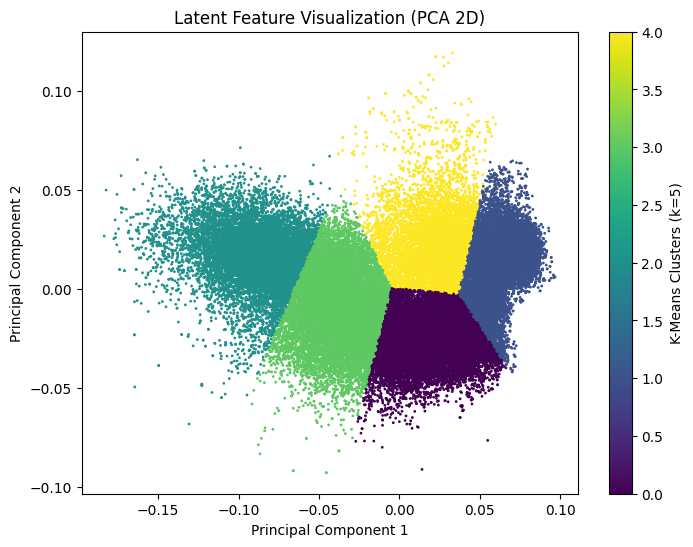


Sample of cluster assignments (first 10 rows):
   cluster     pca_x     pca_y
0        3 -0.051277  0.016879
1        3 -0.044810  0.023856
2        3 -0.020493 -0.006609
3        3 -0.013050 -0.002731
4        4  0.018841  0.003947
5        0  0.017572 -0.001752
6        0  0.037850 -0.011094
7        0  0.024739 -0.011272
8        0  0.020014 -0.035365
9        0  0.019398 -0.028336


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def interpret_latent_features(csv_path, n_clusters=5):
    """
    Loads latent features from a CSV, performs PCA to reduce dimensions,
    does K-means clustering, and plots the results in 2D.

    :param csv_path: Path to the 'my_latent_features.csv' file.
    :param n_clusters: Number of clusters for k-means, just as a demo.
    """
    # 1. Load the CSV
    df = pd.read_csv(csv_path)
    print(f"Loaded latent features with shape: {df.shape}")

    # 2. Convert to numpy array
    X = df.values  # shape (num_samples, 20)

    # 3. Perform PCA (from 20 dims -> 2 dims) for easy visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)  # shape (num_samples, 2)

    # 4. K-Means Clustering (optional, just to show grouping)
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    # 5. Plot the 2D PCA results, coloring by cluster
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=1)
    plt.title("Latent Feature Visualization (PCA 2D)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(scatter, label=f"K-Means Clusters (k={n_clusters})")
    plt.show()

    # 6. Print out a sample of the cluster assignments
    # (Just so we see which cluster each row belongs to)
    df_clusters = pd.DataFrame({
        "cluster": cluster_labels,
        "pca_x": X_pca[:, 0],
        "pca_y": X_pca[:, 1]
    })
    print("\nSample of cluster assignments (first 10 rows):")
    print(df_clusters.head(10))

    # Optional: return these so you can do further analysis
    return X_pca, cluster_labels

if __name__ == "__main__":
    csv_path = "/content/my_latent_features.csv"  # Update if needed
    # You can tune the number of clusters if you like, e.g., 3 or 8
    _ = interpret_latent_features(csv_path, n_clusters=5)


TOP down approach:


[STEP 1: CLUSTER LATENT FEATURES]
Loading latent features from: /content/my_latent_features.csv
Latent feature shape: (78848, 20)
Running K-Means with n_clusters=5 on the latent features...
K-Means clustering completed. Here is a small sample of cluster labels:
[1 1 2 2 0 0 0 0 0 0] ... (etc.)

[STEP 2: MAP CLUSTER LABELS BACK TO RAW DATA]
Loading raw CSV from: /content/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv
Raw data shape: (788480, 23)

[STEP 3: ANALYZE CLUSTERS]
Found clusters: [0, 1, 2, 3, 4] (Total = 5)

=== CLUSTER 0 ===
- # of data rows in raw CSV for cluster 0: 196570
- # of unique pixels in cluster 0: 19657
  Average NDVI, EVI, B4, B8, and Yellowing by month:
           NDVI       EVI           B4           B8  Yellowing
month                                                         
1      0.622117  1.284092   355.316121  1344.904665  10.549219
3      0.477466  1.725788   637.020145  1634.827949  11.601669
4      0.283370  0.502551  2511.322633  2748.858269   8.022

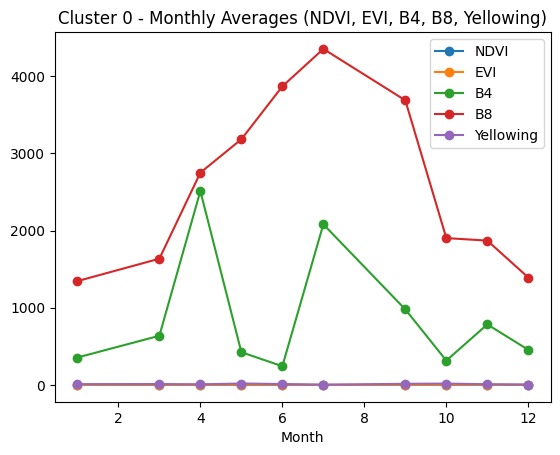


=== CLUSTER 1 ===
- # of data rows in raw CSV for cluster 1: 94520
- # of unique pixels in cluster 1: 9452
  Average NDVI, EVI, B4, B8, and Yellowing by month:
           NDVI       EVI           B4           B8  Yellowing
month                                                         
1      0.659987  1.276788   300.580829  1332.315277  11.081940
3      0.527754  1.584778   508.691600  1554.747249  11.321149
4      0.223964  0.216816  3861.253491  4048.590245  18.097175
5      0.789060  2.499746   389.272006  3383.326809  19.824164
6      0.888630  2.645951   232.646636  3936.133623  11.970006
7      0.308506 -2.300743  2538.517562  4424.646741   1.473392
9      0.783682  2.569212   570.289039  3579.820461  13.003174
10     0.727833  1.594217   311.452391  1958.942658  18.332258
11     0.410221  1.230946   947.604211  1977.396318   9.176153
12     0.531370  1.950075   411.353682  1353.802370   5.789357


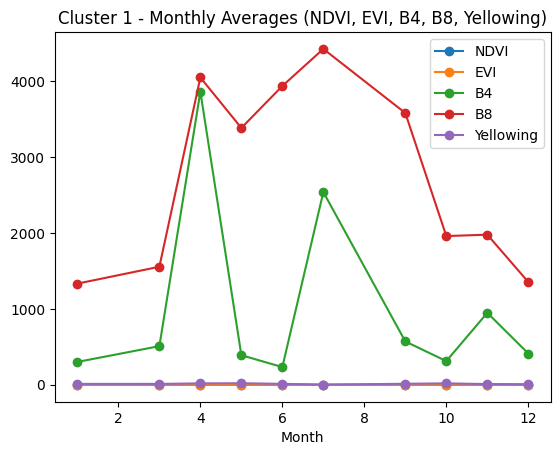


=== CLUSTER 2 ===
- # of data rows in raw CSV for cluster 2: 169660
- # of unique pixels in cluster 2: 16966
  Average NDVI, EVI, B4, B8, and Yellowing by month:
           NDVI       EVI           B4           B8  Yellowing
month                                                         
1      0.665112  1.766527   310.309737  1354.227809  11.141636
3      0.527278  1.574774   529.626370  1591.162089  11.375486
4      0.217138  0.790033  3967.558411  4148.991218  15.673582
5      0.790449  2.529274   393.831015  3425.845986  19.948308
6      0.887084  2.639933   235.661441  3925.271366  12.108069
7      0.309493  0.651669  2533.041731  4414.466050   1.630054
9      0.776774  2.021250   645.711659  3652.288224  12.585966
10     0.726901  1.587260   318.370741  1985.606566  18.824620
11     0.407501  1.717321   974.089945  2015.288106   8.886479
12     0.525772  2.299142   435.713898  1400.256572   5.812890


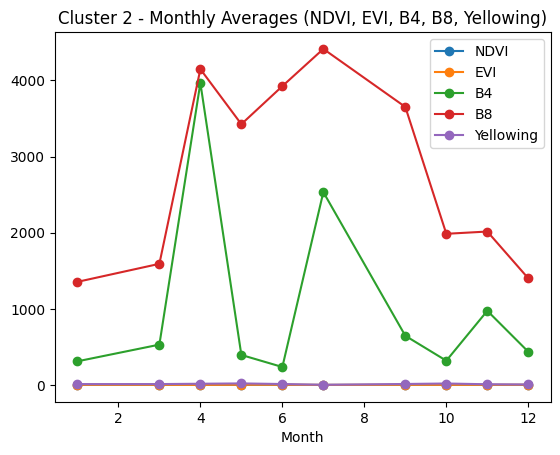


=== CLUSTER 3 ===
- # of data rows in raw CSV for cluster 3: 230620
- # of unique pixels in cluster 3: 23062
  Average NDVI, EVI, B4, B8, and Yellowing by month:
           NDVI       EVI           B4           B8  Yellowing
month                                                         
1      0.635541  1.372795   311.066516  1307.744992   9.977387
3      0.488495  1.680876   583.419565  1583.694172  10.798630
4      0.342657  0.633516  1184.102333  1508.328246  11.689142
5      0.757362  2.436338   400.373775  3009.395022  16.904909
6      0.894200  2.691781   207.109184  3829.187668  11.440226
7      0.468964  2.592607  1692.492022  4211.963360   3.985192
9      0.650736  1.737118  1427.561270  3968.686324  12.622387
10     0.737765  1.663661   280.405906  1868.715506  16.093661
11     0.580338  1.709321   440.134377  1625.308429  12.395759
12     0.530903  2.400263   414.887217  1345.599081   4.905364


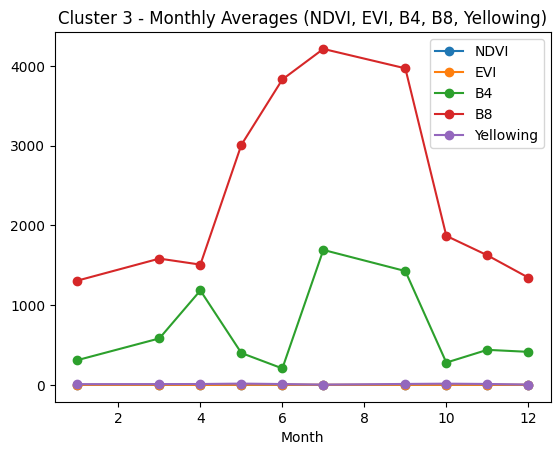


=== CLUSTER 4 ===
- # of data rows in raw CSV for cluster 4: 97110
- # of unique pixels in cluster 4: 9711
  Average NDVI, EVI, B4, B8, and Yellowing by month:
           NDVI       EVI           B4           B8  Yellowing
month                                                         
1      0.658789  1.328119   335.962620  1400.958295  11.721089
3      0.529859  1.585337   523.639893  1592.752343  11.807589
4      0.186406  0.385582  4753.522397  4896.861703  18.591546
5      0.792196  2.529825   409.119349  3538.028524  20.969107
6      0.876744  2.608287   264.504479  3967.027083  12.562970
7      0.286033  0.329477  2619.443312  4407.448461   0.619298
9      0.790912  2.235924   530.070230  3635.131088  13.335753
10     0.716261  1.554693   339.949027  2007.034703  19.394038
11     0.359398  1.269650  1161.229019  2161.087427   7.300793
12     0.521927  2.195641   444.684070  1410.172073   6.361909


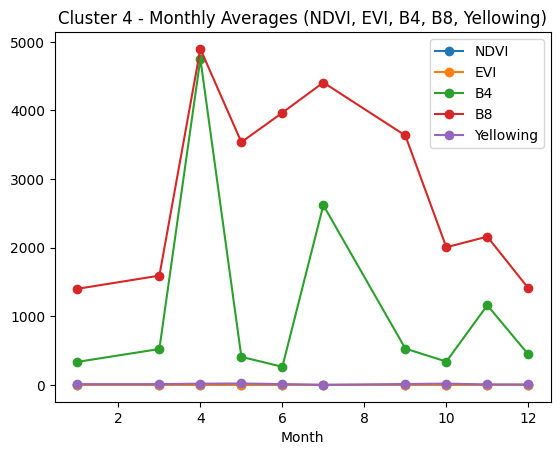

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_latent_features(latent_csv, n_clusters=5):
    """
    1) Load the latent features (each row = one pixel's 20D Transformer embedding).
    2) Run K-Means clustering with n_clusters.
    3) Return a DataFrame with a single column 'cluster_label' (one row per pixel).
    """
    print("\n[STEP 1: CLUSTER LATENT FEATURES]")
    print(f"Loading latent features from: {latent_csv}")
    df_latent = pd.read_csv(latent_csv)  # e.g. shape = (78000+, 20)
    print(f"Latent feature shape: {df_latent.shape}")

    print(f"Running K-Means with n_clusters={n_clusters} on the latent features...")
    X = df_latent.values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    print("K-Means clustering completed. Here is a small sample of cluster labels:")
    print(cluster_labels[:10], "... (etc.)")

    # Build a DataFrame with one column "cluster_label"
    df_clusters = pd.DataFrame({
        "cluster_label": cluster_labels
    })
    return df_clusters

def map_clusters_to_raw(raw_csv, df_clusters):
    """
    1) Load the original time-series CSV (raw data).
    2) Create a 'pixel_index' to match each row in df_clusters (which also has 1 row per pixel).
    3) Merge cluster labels onto the raw data, returning a merged DataFrame with everything.

    NOTE: This approach assumes the order of pixels in 'my_latent_features.csv'
    matches the order of pixel groups in the raw CSV. If that’s not true,
    you may need a more careful indexing approach (e.g. by 'id').
    """
    print("\n[STEP 2: MAP CLUSTER LABELS BACK TO RAW DATA]")
    print(f"Loading raw CSV from: {raw_csv}")
    df_raw = pd.read_csv(raw_csv, parse_dates=['image_date'])
    print(f"Raw data shape: {df_raw.shape}")

    # We create an 'id' column for each pixel
    df_raw['id'] = df_raw['longitude'].round(6).astype(str) + "_" + df_raw['latitude'].round(6).astype(str)

    # Group by 'id' to identify each pixel. We'll sort them in the order they appear.
    grouped = df_raw.groupby('id', sort=False)
    unique_ids = list(grouped.groups.keys())  # a list of distinct pixel IDs in the order they appear

    # Build a map from 'id' to an integer index
    pixel_index_map = {uid: idx for idx, uid in enumerate(unique_ids)}
    # Add that index to df_raw
    df_raw['pixel_index'] = df_raw['id'].map(pixel_index_map)

    # df_clusters should have the same length (# pixels) as len(unique_ids)
    df_clusters = df_clusters.reset_index(drop=True)
    df_clusters['pixel_index'] = df_clusters.index

    # Merge cluster labels onto raw data
    df_merged = pd.merge(df_raw, df_clusters, on='pixel_index', how='left')
    return df_merged

def analyze_clusters(df_merged):
    """
    1) For each cluster, compute average NDVI, EVI, TCI_B, TCI_G, TCI_R, etc. by month.
    2) Print user-friendly summaries and show a plot for each cluster.
    """
    print("\n[STEP 3: ANALYZE CLUSTERS]")

    # Make a new "month" column for convenience, e.g. df_merged['month'] = df_merged['image_date'].dt.month
    df_merged['month'] = df_merged['image_date'].dt.month

    # Example: "Yellowing" = ((TCI_R + TCI_G)/2) - TCI_B
    df_merged['Yellowing'] = ((df_merged['TCI_R'] + df_merged['TCI_G']) / 2) - df_merged['TCI_B']

    # Let's see how many unique clusters we have
    clusters = df_merged['cluster_label'].unique()
    clusters = sorted(clusters)
    print(f"Found clusters: {clusters} (Total = {len(clusters)})")

    for c in clusters:
        print(f"\n=== CLUSTER {c} ===")
        subset = df_merged[df_merged['cluster_label'] == c]
        print(f"- # of data rows in raw CSV for cluster {c}: {len(subset)}")
        print(f"- # of unique pixels in cluster {c}: {subset['id'].nunique()}")

        # Group by month to get average stats across that cluster
        group_month = subset.groupby('month')[['NDVI','EVI','B4','B8','Yellowing']]
        avg_stats = group_month.mean()

        print("  Average NDVI, EVI, B4, B8, and Yellowing by month:")
        print(avg_stats)

        # Plot them quickly
        avg_stats.plot(marker='o', title=f"Cluster {c} - Monthly Averages (NDVI, EVI, B4, B8, Yellowing)")
        plt.xlabel("Month")
        plt.show()

def main_top_down(latent_csv, raw_csv, n_clusters=5):
    """
    Full top-down pipeline:
      1) cluster latent features,
      2) map back to raw,
      3) analyze & print summary.
    """
    df_clust = cluster_latent_features(latent_csv, n_clusters=n_clusters)
    df_merged = map_clusters_to_raw(raw_csv, df_clust)
    analyze_clusters(df_merged)

if __name__ == "__main__":
    # Example usage (adjust file paths as needed):
    latent_csv_path = "/content/my_latent_features.csv"
    raw_csv_path = "/content/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv"

    # We can choose how many clusters
    main_top_down(latent_csv_path, raw_csv_path, n_clusters=5)


Top down with sillhoute
version 2:



[STEP 1: CLUSTER LATENT FEATURES]
Latent feature shape: (78848, 20)
Finding best k via silhouette...
For k=2, silhouette=0.4236
For k=3, silhouette=0.3502
For k=4, silhouette=0.2909
For k=5, silhouette=0.2695
For k=6, silhouette=0.2465
For k=7, silhouette=0.2684
For k=8, silhouette=0.2384
For k=9, silhouette=0.2337
For k=10, silhouette=0.2211


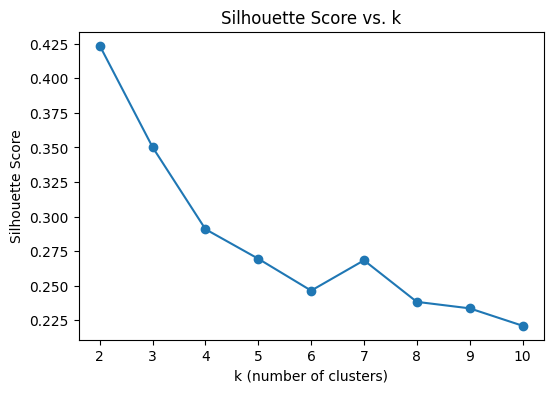

Best k according to silhouette = 2 (score=0.4236)
Using k=2
Running K-Means with n_clusters=2 on the latent features...

[STEP 2: MAP CLUSTER LABELS BACK TO RAW DATA]
Raw data shape: (788480, 23)

[STEP 3: ANALYZE CLUSTERS]
Found clusters: [0, 1] (Total = 2)

=== CLUSTER 0 ===
- # data rows in raw CSV for cluster 0: 462440
- # unique pixels in cluster 0: 46244
  Average NDVI, EVI, B4, B8, Yellowing by month:
           NDVI       EVI           B4           B8  Yellowing
month                                                         
1      0.632061  1.383849   329.335287  1327.654420  10.303358
3      0.486714  1.706954   602.259061  1606.756920  11.170736
4      0.308877  0.537681  1932.660021  2210.455194  10.673741
5      0.760307  2.442901   409.400355  3112.235382  17.772662
6      0.888536  2.668876   223.506833  3853.961746  11.759926
7      0.431299  1.691651  1915.364285  4284.936273   3.506768
9      0.687650  1.815743  1182.873281  3827.036740  13.587157
10     0.729554  1.63

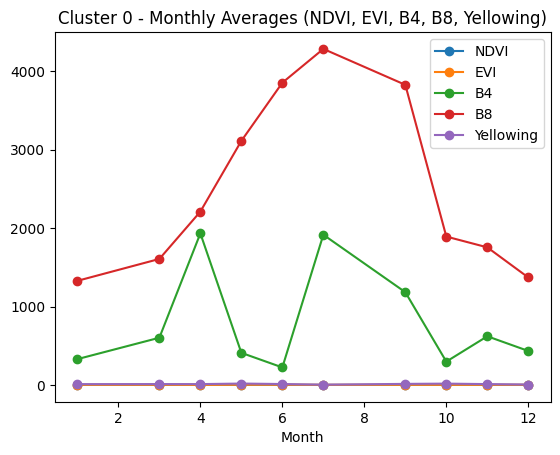


=== CLUSTER 1 ===
- # data rows in raw CSV for cluster 1: 326040
- # unique pixels in cluster 1: 32604
  Average NDVI, EVI, B4, B8, Yellowing by month:
           NDVI       EVI           B4           B8  Yellowing
month                                                         
1      0.661783  1.467383   315.814685  1360.984358  11.305208
3      0.528255  1.559438   521.553184  1580.003865  11.507177
4      0.208561  0.577282  4210.235769  4380.185468  16.905610
5      0.790488  2.520663   397.953840  3449.864863  20.268449
6      0.883987  2.631177   244.435713  3938.732487  12.214682
7      0.300588 -0.350118  2569.036100  4417.911207   1.270028
9      0.784338  2.234184   581.043982  3622.295148  12.854205
10     0.723551  1.577819   323.601675  1983.766440  18.885290
11     0.390824  1.448795  1031.146669  2053.578641   8.520228
12     0.525765  2.132422   431.357165  1387.913232   5.976107


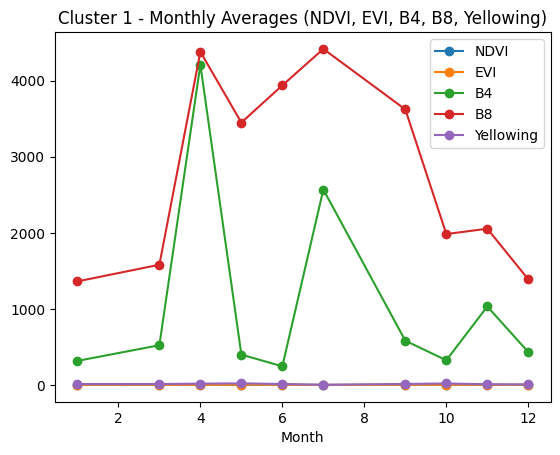

In [ ]:
###############################################
# TOP-DOWN APPROACH (with silhouette-based k)
###############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_k_silhouette(X, kmin=2, kmax=10):
    """
    Tries k from kmin to kmax, fits K-Means, calculates silhouette,
    and returns the k with the best (max) silhouette score.
    Plots the silhouette scores for reference.
    """
    scores = []
    ks = range(kmin, kmax+1)
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
        print(f"For k={k}, silhouette={score:.4f}")

    plt.figure(figsize=(6,4))
    plt.plot(ks, scores, marker='o')
    plt.title("Silhouette Score vs. k")
    plt.xlabel("k (number of clusters)")
    plt.ylabel("Silhouette Score")
    plt.show()

    best_k = ks[np.argmax(scores)]
    print(f"Best k according to silhouette = {best_k} (score={max(scores):.4f})")
    return best_k

def cluster_latent_features(latent_csv, k=None):
    """
    Loads the latent CSV (my_latent_features.csv).
    If k=None, chooses best k via silhouette. Otherwise uses the provided k.
    Returns a DataFrame with 'cluster_label'.
    """
    print("\n[STEP 1: CLUSTER LATENT FEATURES]")
    df_latent = pd.read_csv(latent_csv)
    print(f"Latent feature shape: {df_latent.shape}")

    X = df_latent.values
    if k is None:
        print("Finding best k via silhouette...")
        k = find_best_k_silhouette(X, kmin=2, kmax=10)
        print(f"Using k={k}")
    else:
        print(f"Using user-specified k={k}")

    print(f"Running K-Means with n_clusters={k} on the latent features...")
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    df_clusters = pd.DataFrame({
        "cluster_label": cluster_labels
    })
    return df_clusters

def map_clusters_to_raw(raw_csv, df_clusters):
    """
    Reads the original time-series CSV, merges cluster labels based on pixel index.
    """
    print("\n[STEP 2: MAP CLUSTER LABELS BACK TO RAW DATA]")
    df_raw = pd.read_csv(raw_csv, parse_dates=['image_date'])
    print(f"Raw data shape: {df_raw.shape}")

    df_raw['id'] = df_raw['longitude'].round(6).astype(str) + "_" + df_raw['latitude'].round(6).astype(str)
    grouped = df_raw.groupby('id', sort=False)
    unique_ids = list(grouped.groups.keys())

    pixel_index_map = {uid: idx for idx, uid in enumerate(unique_ids)}
    df_raw['pixel_index'] = df_raw['id'].map(pixel_index_map)

    df_clusters = df_clusters.reset_index(drop=True)
    df_clusters['pixel_index'] = df_clusters.index

    df_merged = pd.merge(df_raw, df_clusters, on='pixel_index', how='left')
    return df_merged

def analyze_clusters(df_merged):
    """
    Analyzes NDVI, EVI, B4, B8, and Yellowing over months for each cluster.
    """
    print("\n[STEP 3: ANALYZE CLUSTERS]")

    df_merged['month'] = df_merged['image_date'].dt.month
    df_merged['Yellowing'] = ((df_merged['TCI_R'] + df_merged['TCI_G']) / 2) - df_merged['TCI_B']

    clusters = df_merged['cluster_label'].dropna().unique()
    clusters = sorted(clusters)
    print(f"Found clusters: {clusters} (Total = {len(clusters)})")

    for c in clusters:
        print(f"\n=== CLUSTER {c} ===")
        subset = df_merged[df_merged['cluster_label'] == c]
        print(f"- # data rows in raw CSV for cluster {c}: {len(subset)}")
        print(f"- # unique pixels in cluster {c}: {subset['id'].nunique()}")

        group_month = subset.groupby('month')[['NDVI','EVI','B4','B8','Yellowing']]
        avg_stats = group_month.mean()

        print("  Average NDVI, EVI, B4, B8, Yellowing by month:")
        print(avg_stats)

        avg_stats.plot(marker='o', title=f"Cluster {c} - Monthly Averages (NDVI, EVI, B4, B8, Yellowing)")
        plt.xlabel("Month")
        plt.show()

def main_top_down(latent_csv, raw_csv, k=None):
    """
    Full top-down pipeline:
      1) cluster latent features (optionally auto-choose k),
      2) map back to raw data,
      3) analyze cluster differences
    """
    df_clust = cluster_latent_features(latent_csv, k=k)
    df_merged = map_clusters_to_raw(raw_csv, df_clust)
    analyze_clusters(df_merged)

if __name__ == "__main__":
    latent_csv_path = "/content/my_latent_features.csv"
    raw_csv_path = "/content/LarchCN_256x256_2022_monthly_patch_1_1_cleaned.csv"
    # Set k=None to pick automatically (silhouette) or use an int (e.g. 5)
    main_top_down(latent_csv_path, raw_csv_path, k=None)


This proves the following:
1. clustering, k-means, on a single patch is not really effective.
2. we should concatenate all latent features into a single or double csv file, run clustering on all of the features again.

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm
import math
from google.colab import drive

# -------------------------------
# 1. Mount Google Drive
# -------------------------------
drive.mount('/content/drive')

# -------------------------------
# 2. Dataset Class for a Patch CSV File
# -------------------------------
class LarchPatchDataset(Dataset):
    """
    Reads a cleaned CSV file (with columns: AOT, B1, B11, B12, B2, B3, B4, B5, B6,
    B7, B8, B8A, B9, EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, longitude, latitude)
    and groups rows into time series for each pixel.
    If an "id" column does not exist, one is created by concatenating the rounded longitude and latitude.
    Each pixel’s time series is padded (or truncated) to a fixed length.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print(f"Reading CSV file: {csv_path}")
        self.df = pd.read_csv(csv_path, parse_dates=['image_date'])
        # If 'id' column does not exist, create one using longitude and latitude.
        if 'id' not in self.df.columns:
            if 'longitude' in self.df.columns and 'latitude' in self.df.columns:
                self.df['id'] = self.df['longitude'].round(6).astype(str) + "_" + self.df['latitude'].round(6).astype(str)
            else:
                raise ValueError("CSV file must contain 'longitude' and 'latitude' columns.")
        # Define default feature columns (20 features) if not provided.
        if feature_cols is None:
            self.feature_cols = [
                "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
                "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
                "TCI_B", "TCI_G", "TCI_R", "WVP"
            ]
        else:
            self.feature_cols = feature_cols
        # Group by 'id'
        self.samples = []
        groups = self.df.groupby('id')
        for group_id, group in groups:
            group_sorted = group.sort_values('image_date')
            arr = group_sorted[self.feature_cols].to_numpy(dtype=float)
            T, D = arr.shape
            # Pad if fewer than desired_length, or truncate if longer.
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)  # shape: (desired_length, D)
            label = 0  # Dummy label for unsupervised feature extraction.
            self.samples.append((ts_tensor, label))
        print(f"Constructed {len(self.samples)} time series samples from {csv_path}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        ts_data, label = self.samples[idx]
        return ts_data, torch.tensor(label, dtype=torch.long)

# -------------------------------
# 3. Transformer Components
# -------------------------------
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.shape
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1)*(i+1)/30.0)
                x[:, t, i] += offset
        return x

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        # Split into heads.
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1,2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1,2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x_attn = self.attn(x)
        x = x + x_attn
        x = self.norm1(x)
        x_ff = self.ff(x)
        x = x + x_ff
        x = self.norm2(x)
        return x

class MiniTransformerClassifier(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2):
        super().__init__()
        self.posenc = SimplePosEncoding()
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)
        ])
        self.classifier = nn.Linear(d_model, n_classes)

    def forward(self, x, return_latent=False):
        # x: (B, T, D)
        x = self.posenc(x)
        for layer in self.layers:
            x = layer(x)
        x_mean = x.mean(dim=1)  # (B, d_model)
        logits = self.classifier(x_mean)
        if return_latent:
            return logits, x_mean
        else:
            return logits

# -------------------------------
# 4. Training Function for a Single CSV File
# -------------------------------
def train_transformer_on_csv(csv_path, epochs=5, save_folder="./"):
    print(f"\nTraining on: {csv_path}")
    dataset = LarchPatchDataset(csv_path, desired_length=12)
    ds_len = len(dataset)
    print("Dataset contains", ds_len, "samples.")
    if ds_len < 2:
        train_ds = dataset
        test_ds = dataset
    else:
        train_size = int(0.8 * ds_len)
        test_size = ds_len - train_size
        train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

    d_model = len(dataset.feature_cols)  # Should be 20.
    seq_len = 12
    print(f"Using d_model = {d_model} and sequence length = {seq_len}.")
    model = MiniTransformerClassifier(d_model=d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    print("Starting training for", epochs, "epochs...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} training", leave=False):
            optimizer.zero_grad()
            logits = model(X)
            labels = torch.zeros(X.size(0), dtype=torch.long)  # Dummy labels.
            loss = criterion(logits, labels)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            total_loss += loss.item() * X.size(0)
        avg_loss = total_loss / len(train_ds)

        model.eval()
        test_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for X, _ in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} testing", leave=False):
                logits = model(X)
                loss = criterion(logits, torch.zeros(X.size(0), dtype=torch.long))
                test_loss += loss.item() * X.size(0)
                preds = torch.argmax(logits, dim=1)
                correct += (preds == 0).sum().item()
                total += X.size(0)
        avg_test_loss = test_loss / len(test_ds)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Dummy Test Acc: {correct/total:.2f}")

    # Save the model weights to a .pth file.
    base_name = os.path.basename(csv_path).split(".")[0]
    save_path = os.path.join(save_folder, base_name + "_transformer.pth")
    torch.save(model.state_dict(), save_path)
    print("Model weights saved as", save_path)

    # Extract latent features from the entire dataset.
    model.eval()
    all_latents = []
    with torch.no_grad():
        loader = DataLoader(dataset, batch_size=16, shuffle=False)
        for X, _ in tqdm(loader, desc="Extracting latents"):
            _, latent = model(X, return_latent=True)
            all_latents.append(latent.cpu().numpy())
    all_latents = np.concatenate(all_latents, axis=0)
    print("Extracted latent shape:", all_latents.shape)

    # Save latent features to a CSV file.
    latent_csv_path = os.path.join(save_folder, base_name + "_latent_features.csv")
    pd.DataFrame(all_latents).to_csv(latent_csv_path, index=False)
    print("Latent features saved as", latent_csv_path)

    return all_latents, save_path

# -------------------------------
# 5. Iterate Over All Cleaned CSV Files in the Google Drive Folder
# -------------------------------
folder_path = "/content/drive/MyDrive/2025-02-09_larch"  # Update if necessary.
csv_files = glob.glob(os.path.join(folder_path, "*_cleaned.csv"))
print(f"Found {len(csv_files)} cleaned CSV files in {folder_path}")

# Create dictionaries to hold latent features and model paths per CSV file.
all_latents_dict = {}
model_paths_dict = {}

for csv_file in tqdm(csv_files, desc="Training on each CSV file"):
    latents, mpath = train_transformer_on_csv(csv_file, epochs=5, save_folder="./")
    key = os.path.basename(csv_file).split(".")[0]
    all_latents_dict[key] = latents
    model_paths_dict[key] = mpath

print("\nAll models trained and latent features extracted.")
print("Model paths:")
for key, path in model_paths_dict.items():
    print(f"{key}: {path}")


Mounted at /content/drive
Found 28 cleaned CSV files in /content/drive/MyDrive/2025-02-09_larch


Training on each CSV file:   0%|          | 0/28 [00:00<?, ?it/s]


Training on: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_1_cleaned.csv
Reading CSV file: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_1_cleaned.csv
Constructed 78592 time series samples from /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_1_cleaned.csv
Dataset contains 78592 samples.
Using d_model = 20 and sequence length = 12.
Starting training for 5 epochs...



Epoch 1/5 training: 100%|██████████| 7860/7860 [01:40<00:00, 62.44it/s]
                                                                       
Epoch 1/5 testing: 100%|█████████▉| 1964/1965 [00:15<00:00, 102.15it/s]
                                                                       

Epoch 1/5, Train Loss: 0.0003, Test Loss: 0.0000, Dummy Test Acc: 1.00



Epoch 2/5 training: 100%|█████████▉| 7857/7860 [01:41<00:00, 85.71it/s]
                                                                       
Epoch 2/5 testing: 100%|█████████▉| 1956/1965 [00:14<00:00, 142.71it/s]
                                                                       

Epoch 2/5, Train Loss: 0.0000, Test Loss: 0.0000, Dummy Test Acc: 1.00



Epoch 3/5 training: 100%|█████████▉| 7853/7860 [01:42<00:00, 80.86it/s]
                                                                       
Epoch 3/5 testing:  99%|█████████▉| 1952/1965 [00:14<00:00, 138.54it/s]
                                                                       

Epoch 3/5, Train Loss: 0.0000, Test Loss: 0.0000, Dummy Test Acc: 1.00



Epoch 4/5 training: 100%|█████████▉| 7858/7860 [01:45<00:00, 80.10it/s]
                                                                       
Epoch 4/5 testing: 100%|█████████▉| 1957/1965 [00:15<00:00, 141.27it/s]
                                                                       

Epoch 4/5, Train Loss: 0.0000, Test Loss: 0.0000, Dummy Test Acc: 1.00



Epoch 5/5 training: 100%|█████████▉| 7854/7860 [01:49<00:00, 61.17it/s]
                                                                       
Epoch 5/5 testing: 100%|█████████▉| 1960/1965 [00:16<00:00, 100.64it/s]
                                                                       

Epoch 5/5, Train Loss: 0.0000, Test Loss: 0.0000, Dummy Test Acc: 1.00
Model weights saved as ./LarchCN_256x256_2022_monthly_patch_3_1_cleaned_transformer.pth



Extracting latents: 100%|██████████| 4912/4912 [00:44<00:00, 109.61it/s]


Extracted latent shape: (78592, 20)


Training on each CSV file:   4%|▎         | 1/28 [11:54<5:21:18, 714.03s/it]

Latent features saved as ./LarchCN_256x256_2022_monthly_patch_3_1_cleaned_latent_features.csv

Training on: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_2_cleaned.csv
Reading CSV file: /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_2_cleaned.csv
Constructed 78592 time series samples from /content/drive/MyDrive/2025-02-09_larch/LarchCN_256x256_2022_monthly_patch_3_2_cleaned.csv
Dataset contains 78592 samples.
Using d_model = 20 and sequence length = 12.
Starting training for 5 epochs...



Epoch 1/5 training: 100%|█████████▉| 7855/7860 [01:58<00:00, 71.61it/s]
                                                                       
Epoch 1/5 testing: 100%|█████████▉| 1962/1965 [00:16<00:00, 131.42it/s]
                                                                       

Epoch 1/5, Train Loss: 0.0004, Test Loss: 0.0000, Dummy Test Acc: 1.00



Epoch 2/5 training: 100%|█████████▉| 7857/7860 [01:51<00:00, 51.99it/s]
                                                                       
Epoch 2/5 testing: 100%|█████████▉| 1958/1965 [00:16<00:00, 112.37it/s]
                                                                       

Epoch 2/5, Train Loss: 0.0000, Test Loss: 0.0000, Dummy Test Acc: 1.00



Epoch 3/5 training:   6%|▌         | 438/7860 [00:05<01:43, 71.96it/s]

Running it on CUDA


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm
import math

# -------------------------------
# 1. Check and Set Device (CUDA)
# -------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)
if device.type == 'cuda':
    print("GPU Name:", torch.cuda.get_device_name())

# -------------------------------
# 2. Dataset Class for a Patch CSV File
# -------------------------------
class LarchPatchDataset(Dataset):
    """
    Reads a cleaned CSV file (with columns: AOT, B1, B11, B12, B2, B3, B4, B5, B6,
    B7, B8, B8A, B9, EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, longitude, latitude)
    and groups rows into time series for each pixel.
    If an "id" column does not exist, one is created by concatenating the rounded longitude and latitude.
    Each pixel’s time series is padded (or truncated) to a fixed length.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print(f"\nReading CSV file: {csv_path}")
        self.df = pd.read_csv(csv_path, parse_dates=['image_date'])
        # If 'id' column does not exist, create one using longitude and latitude.
        if 'id' not in self.df.columns:
            if 'longitude' in self.df.columns and 'latitude' in self.df.columns:
                self.df['id'] = self.df['longitude'].round(6).astype(str) + "_" + self.df['latitude'].round(6).astype(str)
            else:
                raise ValueError("CSV file must contain 'longitude' and 'latitude' columns.")
        # Define default feature columns (20 features) if not provided.
        if feature_cols is None:
            self.feature_cols = [
                "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
                "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
                "TCI_B", "TCI_G", "TCI_R", "WVP"
            ]
        else:
            self.feature_cols = feature_cols
        # Group by 'id'
        self.samples = []
        groups = self.df.groupby('id')
        for group_id, group in groups:
            group_sorted = group.sort_values('image_date')
            arr = group_sorted[self.feature_cols].to_numpy(dtype=float)
            T, D = arr.shape
            # Pad if fewer than desired_length, or truncate if longer.
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)  # shape: (desired_length, D)
            label = 0  # Dummy label for unsupervised feature extraction.
            self.samples.append((ts_tensor, label))
        print(f"Constructed {len(self.samples)} time series samples from {csv_path}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        ts_data, label = self.samples[idx]
        return ts_data, torch.tensor(label, dtype=torch.long)

# -------------------------------
# 3. Transformer Components
# -------------------------------
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.shape
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1) * (i+1) / 30.0)
                x[:, t, i] += offset
        return x

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        # Split into heads.
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1, 2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x_attn = self.attn(x)
        x = x + x_attn
        x = self.norm1(x)
        x_ff = self.ff(x)
        x = x + x_ff
        x = self.norm2(x)
        return x

class MiniTransformerClassifier(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2):
        super().__init__()
        self.posenc = SimplePosEncoding()
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)
        ])
        self.classifier = nn.Linear(d_model, n_classes)

    def forward(self, x, return_latent=False):
        # x: (B, T, D)
        x = self.posenc(x)
        for layer in self.layers:
            x = layer(x)
        x_mean = x.mean(dim=1)  # (B, d_model)
        logits = self.classifier(x_mean)
        if return_latent:
            return logits, x_mean
        else:
            return logits

# -------------------------------
# 4. Training Function for a Single CSV File
# -------------------------------
def train_transformer_on_csv(csv_path, epochs=5, save_folder="./"):
    print(f"\nTraining on: {csv_path}")
    dataset = LarchPatchDataset(csv_path, desired_length=12)
    ds_len = len(dataset)
    print("Dataset contains", ds_len, "samples.")
    if ds_len < 2:
        train_ds = dataset
        test_ds = dataset
    else:
        train_size = int(0.8 * ds_len)
        test_size = ds_len - train_size
        train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

    d_model = len(dataset.feature_cols)  # Should be 20.
    seq_len = 12
    print(f"Using d_model = {d_model} and sequence length = {seq_len}.")
    model = MiniTransformerClassifier(d_model=d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2)
    model.to(device)
    print("Model is on device:", next(model.parameters()).device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    print("Starting training for", epochs, "epochs...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} training", leave=False):
            X = X.to(device)
            optimizer.zero_grad()
            logits = model(X)
            labels = torch.zeros(X.size(0), dtype=torch.long, device=device)  # Dummy labels.
            loss = criterion(logits, labels)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            total_loss += loss.item() * X.size(0)
        avg_loss = total_loss / len(train_ds)

        model.eval()
        test_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for X, _ in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} testing", leave=False):
                X = X.to(device)
                logits = model(X)
                loss = criterion(logits, torch.zeros(X.size(0), dtype=torch.long, device=device))
                test_loss += loss.item() * X.size(0)
                preds = torch.argmax(logits, dim=1)
                correct += (preds == 0).sum().item()
                total += X.size(0)
        avg_test_loss = test_loss / len(test_ds)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Dummy Test Acc: {correct/total:.2f}")

    # Save the model weights to a .pth file.
    base_name = os.path.basename(csv_path).split(".")[0]
    save_path = os.path.join(save_folder, base_name + "_transformer.pth")
    torch.save(model.state_dict(), save_path)
    print("Model weights saved as", save_path)

    # Extract latent features from the entire dataset.
    model.eval()
    all_latents = []
    with torch.no_grad():
        loader = DataLoader(dataset, batch_size=16, shuffle=False)
        for X, _ in tqdm(loader, desc="Extracting latents"):
            X = X.to(device)
            _, latent = model(X, return_latent=True)
            all_latents.append(latent.cpu().numpy())
    all_latents = np.concatenate(all_latents, axis=0)
    print("Extracted latent shape:", all_latents.shape)

    # Save latent features to a CSV file.
    latent_csv_path = os.path.join(save_folder, base_name + "_latent_features.csv")
    pd.DataFrame(all_latents).to_csv(latent_csv_path, index=False)
    print("Latent features saved as", latent_csv_path)

    return all_latents, save_path

# -------------------------------
# 5. Iterate Over All Cleaned CSV Files in the Local Folder
# -------------------------------
# Update folder_path to the directory containing your 28 cleaned CSV files.
folder_path = r"C:\Users\jmm267\Downloads\Binbin\Dataset"
csv_files = glob.glob(os.path.join(folder_path, "*_cleaned.csv"))
print(f"Found {len(csv_files)} cleaned CSV files in {folder_path}")

# Create dictionaries to hold latent features and model paths per CSV file.
all_latents_dict = {}
model_paths_dict = {}

for csv_file in tqdm(csv_files, desc="Training on each CSV file"):
    latents, mpath = train_transformer_on_csv(csv_file, epochs=5, save_folder="./")
    key = os.path.basename(csv_file).split(".")[0]
    all_latents_dict[key] = latents
    model_paths_dict[key] = mpath

print("\nAll models trained and latent features extracted.")
print("Model paths:")
for key, path in model_paths_dict.items():
    print(f"{key}: {path}")


Using device: cuda
GPU Name: NVIDIA RTX 2000 Ada Generation
Found 28 cleaned CSV files in C:\Users\jmm267\Downloads\Binbin\Dataset


Training on each CSV file:   0%|          | 0/28 [00:00<?, ?it/s]


Training on: C:\Users\jmm267\Downloads\Binbin\Dataset\LarchCN_256x256_2022_monthly_patch_0_0_cleaned.csv

Reading CSV file: C:\Users\jmm267\Downloads\Binbin\Dataset\LarchCN_256x256_2022_monthly_patch_0_0_cleaned.csv
Constructed 78848 time series samples from C:\Users\jmm267\Downloads\Binbin\Dataset\LarchCN_256x256_2022_monthly_patch_0_0_cleaned.csv
Dataset contains 78848 samples.
Using d_model = 20 and sequence length = 12.
Model is on device: cuda:0
Starting training for 5 epochs...



Epoch 1/5 training:  84%|████████▎ | 6596/7885 [01:28<00:10, 122.20it/s]

The fact about positional embeddings. Do we need to refer back to the cleaned CSV files when we are extracting its positionale emeddings or not?

Below is a short‐answer summary, followed by a more detailed explanation.

---

### Short‐Answer Summary

1. **Time‐series “positional encoding”** in the code is purely for the **12 monthly time steps**, not for latitude/longitude. The code calls `SimplePosEncoding` on each batch of shape \((B, T=12, D=20)\), adding a sinusoidal offset for each time index \(t\in[1..12]\).

2. **Lat/lon** is **not** included in that positional encoding. We only use latitude/longitude to group rows into “pixels” (the `id` column). The transformer then sees each pixel’s 12×20 array (12 months × 20 features).

3. **The learned latent vector** (the 20D row in your `_latent_features.csv`) is the final result of (a) the original spectral features plus (b) time‐step positional encoding. This time dimension encoding is “baked into” the learned representation. There is **no separate** column for positional offsets in the final CSV.

4. If you want the transformer to also use **spatial** position (lat/lon) as a feature, you must explicitly feed lat/lon (or some 2D “spatial embedding”) into the network as part of the input features. By default, the code does not do that.

---

### Longer Explanation

#### 1. Where the “Positional Embedding” Actually Happens

In your `SimplePosEncoding` class:
```python
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        B, T, D = x.shape
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1)*(i+1)/30.0)
                x[:, t, i] += offset
        return x
```
- We loop over each time index `t` (from 0..T-1) and each feature dimension `i` (0..D-1).
- We add `offset = sin((t+1)*(i+1)/30.0)` directly into `x[:, t, i]`.

This is purely a **time‐based** positional encoding: the model sees different sinusoidal offsets for month 1 vs. month 2 vs. month 3, etc. (12 time steps). It helps the transformer attend to the order of months.

**Key point**: This code does **not** incorporate lat/lon. The line `offset = math.sin(...)` is solely a function of time step `t` and feature index `i`.

#### 2. How That Encoding “Survives” in the Final Latent Features

When you do a forward pass:
1. Each pixel’s 12×20 input is loaded (the 20 features might be NDVI, EVI, B2, B3, etc.).
2. `SimplePosEncoding` adds a small sinusoidal offset to each \((time, feature)\) entry.
3. The transformer block(s) (self‐attention + feedforward) process that augmented data and produce a final “mean pooling” vector \((1, d\_model=20)\) for each pixel.

Because the model sees those time‐varying offsets at every forward pass, it *learns* to interpret them as “month 1, month 2, … month 12.” By the time you get the final latent vector (the row in your `_latent_features.csv`), the effect of time ordering is “baked in” to the representation. There is **no separate** column for “positional offset,” but the learned weights have integrated that time info into the final embedding.

Hence, if you see a row like:
```
-0.11325701, 0.92138314, 0.9174862, -14.079397, ...
```
that is the final “transformed” representation. The time dimension is no longer explicit, because we took a mean over time steps inside `MiniTransformerClassifier`:
```python
x_mean = x.mean(dim=1)  # shape (B, d_model)
```
The month‐by‐month structure is now compressed into that 20D vector.

#### 3. Why We Do Not See lat/lon in the Latent Vectors

By default, the code only uses lat/lon to create a stable pixel “id” so we can group each pixel’s 12 monthly rows into a single time series. But lat/lon is **not** fed as an extra feature to the transformer. The transformer’s input dimension is 20, matching your 20 spectral/index features. If you want the model to also incorporate lat/lon, you must:

- Increase the input dimension to 22 (for example).
- Add lat/lon (or some “eastings, northings,” or 2D sinusoidal embeddings) to each row’s feature vector.

Then the final 22D input would have `(B2, B3, NDVI, …, lat, lon)`. The model could learn that certain lat/lon positions have different phenological patterns. Right now, that’s not happening.

#### 4. Why “Mapping Latent Vectors Back to lat/lon” is Usually Helpful

If you want to produce a final classification map or do cluster analysis with the actual geospatial layout, you do want to know “Which latent vector belongs to which pixel at which lat/lon?” So you typically keep track of:

- `pixel_id` or `(lat, lon)`
- The final 20D embedding
- Possibly a cluster label (0..4)

Then you can do:

```python
df_latent["latitude"] = ...
df_latent["longitude"] = ...
df_latent["cluster_label"] = ...
```

That way you can produce a semantic segmentation or color each lat/lon by cluster in a map.

But note, that is **not** the same as giving lat/lon to the transformer. It’s simply “post-hoc labeling,” letting you do geospatial merges or maps. The transformer itself never used lat/lon as input.

---

### Concluding Remarks

1. **Positional encoding** in your code is purely about the **time dimension** (12 monthly steps).
2. **Latitude/longitude** is used only to group the CSV rows into a single pixel’s 12‐step sequence. It is *not* used by the model as a “spatial embedding.”
3. The final latent vectors reflect a 12‐month time series compressed into a single 20D representation. The time ordering is remembered internally by the transformer’s learned weights, thanks to the sinusoidal offsets.
4. If you want the model to also “learn about lat/lon,” you must explicitly feed lat/lon as input features or create a 2D positional encoding for space.

Thus, *the transformer “remembers” the monthly ordering via that sinusoidal time encoding; it does not store lat/lon in the final embedding unless you incorporate them as part of the input.*


DEC clustering (unsupervised)


In [1]:
import os
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# ===============================================
# 1. Load and Concatenate All Latent CSV Files
# ===============================================
folder_path = r"C:\Users\jmm267\Downloads\Binbin\Dataset\transformer_output"
pattern = os.path.join(folder_path, "*_cleaned_latent_features.csv")
csv_files = glob.glob(pattern)
print(f"Found {len(csv_files)} latent features CSV files in {folder_path}")

all_dfs = []
for f in tqdm(csv_files, desc="Reading latent CSV files"):
    df = pd.read_csv(f)
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
print(f"Combined latent features shape: {combined_df.shape}")

# Convert to NumPy array (float32 is preferable for neural nets)
X = combined_df.values.astype('float32')  # shape (n_samples, 20)

# ===============================================
# 2. Build and Pretrain an Autoencoder
# ===============================================
input_dim = X.shape[1]  # 20 features
encoding_dim = 10      # dimension of the latent space

# Define the encoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='relu', name="latent")(encoded)

# Define the decoder architecture (symmetric)
decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=latent)

autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

# Pretrain the autoencoder
pretrain_epochs = 50
batch_size = 256
print("Pretraining autoencoder...")
autoencoder.fit(X, X, batch_size=batch_size, epochs=pretrain_epochs, verbose=1)

# ===============================================
# 3. Define the DEC Model (with a Clustering Layer)
# ===============================================
class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label,
    i.e. a vector that represents the probability of the sample belonging to each cluster.
    Uses Student's t-distribution.
    """
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights

    def build(self, input_shape):
        # Create trainable weights for cluster centers
        input_dim = input_shape[1]
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim),
                                        initializer='glorot_uniform',
                                        name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        super(ClusteringLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
        # Compute squared Euclidean distance between inputs and cluster centers.
        # Then compute the Student's t-distribution.
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= ((self.alpha + 1.0) / 2.0)
        # Normalize: each row sums to 1.
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.n_clusters)

n_clusters = 5
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(latent)

# The DEC model maps the input to soft cluster assignments.
dec_model = Model(inputs=input_layer, outputs=clustering_layer)

# ===============================================
# 4. Initialize Cluster Centers using KMeans
# ===============================================
from sklearn.cluster import KMeans
print("Initializing cluster centers with KMeans on the latent space...")
latent_features = encoder.predict(X, batch_size=batch_size)
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(latent_features)
# Set the weights of the clustering layer to the KMeans cluster centers.
dec_model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

# ===============================================
# 5. Define the DEC Loss and Fine-Tuning Process
# ===============================================
def target_distribution(q):
    """
    Compute the target distribution p, as in DEC.
    q is the soft assignment probability.
    """
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

dec_model.compile(optimizer=Adam(learning_rate=1e-3), loss='kld')

maxiter = 20000      # maximum iterations (not used directly here)
update_interval = 140  # update target distribution every 'update_interval' iterations
tol = 0.001          # tolerance threshold to stop training
y_pred_last = np.copy(y_pred)
dec_epochs = 10      # number of DEC fine-tuning epochs
steps_per_epoch = X.shape[0] // batch_size

print("Starting DEC fine-tuning...")
for epoch in range(dec_epochs):
    print(f"\nDEC Epoch {epoch+1}/{dec_epochs}")
    # Compute soft assignments for all samples and update the target distribution.
    q = dec_model.predict(X, batch_size=batch_size)
    p = target_distribution(q)

    # Shuffle the indices for this epoch
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Process the data in batches with a tqdm progress bar.
    pbar = tqdm(range(steps_per_epoch), desc="Processing batches", total=steps_per_epoch)
    for step in pbar:
        batch_indices = indices[step*batch_size:(step+1)*batch_size]
        loss = dec_model.train_on_batch(X[batch_indices], p[batch_indices])
        pbar.set_postfix({'loss': loss})

    # Evaluate clustering performance after each epoch.
    q = dec_model.predict(X, batch_size=batch_size)
    y_pred = q.argmax(1)
    delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
    y_pred_last = np.copy(y_pred)
    print(f"Change in cluster assignment: {delta_label*100:.2f}%")
    if delta_label < tol:
        print("Convergence reached. Stopping training.")
        break

# ===============================================
# 6. Save the Final DEC Clustering Results
# ===============================================
combined_df["cluster_label"] = y_pred
output_csv = os.path.join(folder_path, "combined_latent_features_DEC_clustered.csv")
combined_df.to_csv(output_csv, index=False)
print(f"Combined DEC clustering result saved to: {output_csv}")


Found 28 latent features CSV files in C:\Users\jmm267\Downloads\Binbin\Dataset\transformer_output


Reading latent CSV files: 100%|██████████| 28/28 [00:02<00:00, 10.21it/s]


Combined latent features shape: (2205952, 20)
Pretraining autoencoder...
Epoch 1/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 688us/step - loss: 0.4334
Epoch 2/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 760us/step - loss: 4.5700e-04
Epoch 3/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 762us/step - loss: 3.8306e-04
Epoch 4/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 6s 742us/step - loss: 3.3621e-04
Epoch 5/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 752us/step - loss: 3.0910e-04
Epoch 6/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 808us/step - loss: 2.8858e-04
Epoch 7/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 786us/step - loss: 2.7285e-04
Epoch 8/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 774us/step - loss: 2.5653e-04
Epoch 9/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 769us/step - loss: 2.4371e-04
Epoch 10/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 780us/step - loss: 2.3303e-04
Epoch 11/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 799us/step - loss: 2.2462e-04
Epoch 12/50
8617/8617 ━━━━━━━━━━━━━━━━━━━━ 7s 819us/step - loss: 2.1754e-04
Epoch 13/50
8617/8617 ━━━━━━

Processing batches: 100%|██████████| 8617/8617 [00:15<00:00, 560.61it/s, loss=0.0033167594]


8617/8617 ━━━━━━━━━━━━━━━━━━━━ 6s 682us/step
Change in cluster assignment: 0.00%
Convergence reached. Stopping training.
Combined DEC clustering result saved to: C:\Users\jmm267\Downloads\Binbin\Dataset\transformer_output\combined_latent_features_DEC_clustered.csv


Post-dec analysis

Data shape: (2205952, 21)

=== Cluster Counts ===
cluster_label
2    630272
1    551424
4    393984
3    315136
0    315136
Name: count, dtype: int64


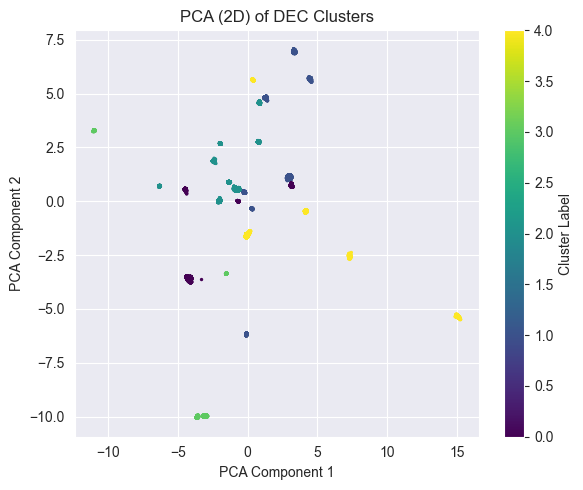

C:\Users\jmm267\Downloads\Binbin\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jmm267\Downloads\Binbin\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


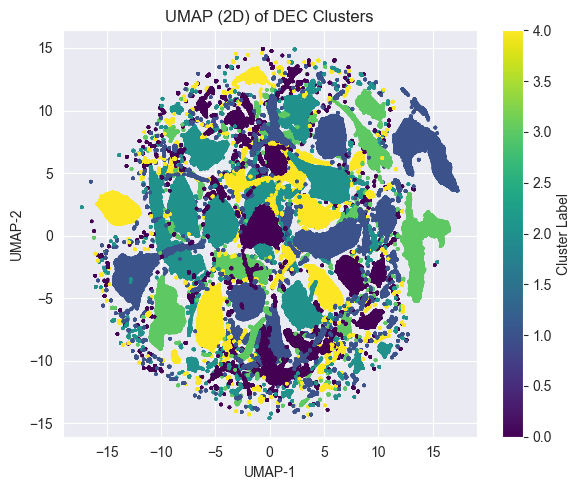

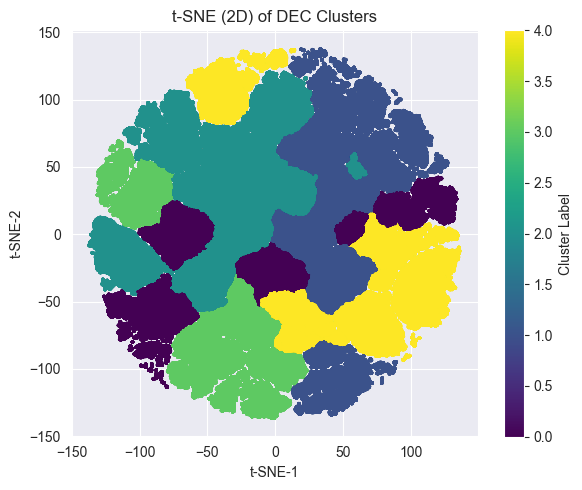


No 'time' column found. Skipping time-series plotting.

No band columns found. Skipping band importance analysis.


In [1]:
w"""
Code Only: Post-DEC Analysis for 5 Clusters

This script demonstrates:
1) Counting the number of samples per cluster.
2) Dimensionality reduction with PCA, UMAP, and t-SNE to visualize clusters.
   - PCA (Principal Component Analysis) is a linear technique that projects data
     onto the directions of maximum variance.
   - UMAP (Uniform Manifold Approximation and Projection) is a non-linear
     dimensionality reduction method that often preserves local/global structure better.
   - t-SNE (t-Distributed Stochastic Neighbor Embedding) is another non-linear
     method focusing on preserving local neighborhoods.
3) (Skipping cross-classification step.)
4) Index mapping over time for each cluster, especially focusing on "yellowing_index",
   "NDWI", "NDVI", and "band" columns. Also includes a simple example of selecting
   the most important bands (via ANOVA F-test).

Requirements:
- pip install pandas numpy scikit-learn matplotlib seaborn tqdm
- pip install umap-learn  (for UMAP)
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap  # pip install umap-learn

# For feature importance (ANOVA F-test)
from sklearn.feature_selection import f_classif

###############################################################################
# 1) Read the DEC Output CSV (Replace with your actual file path if needed)
###############################################################################
input_csv = r"C:\Users\jmm267\Downloads\Binbin\Dataset\transformer_output\combined_latent_features_DEC_clustered.csv"
combined_df = pd.read_csv(input_csv)
print(f"Data shape: {combined_df.shape}")

###############################################################################
# 2) Count the Number of Samples per Cluster
###############################################################################
cluster_counts = combined_df["cluster_label"].value_counts()
print("\n=== Cluster Counts ===")
print(cluster_counts)

###############################################################################
# 3) Dimensionality Reduction (PCA, UMAP, t-SNE)
#    We'll use only the original 20 latent features (columns 0..19).
###############################################################################
feature_cols = [str(i) for i in range(20)]  # columns named "0","1",..., "19"
X = combined_df[feature_cols].values
labels = combined_df["cluster_label"].values

# --- 3a) PCA ---
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X)
plt.figure(figsize=(6, 5))
plt.title("PCA (2D) of DEC Clusters")
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=2)
plt.colorbar(label="Cluster Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

# --- 3b) UMAP ---
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_reducer.fit_transform(X)
plt.figure(figsize=(6, 5))
plt.title("UMAP (2D) of DEC Clusters")
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='viridis', s=2)
plt.colorbar(label="Cluster Label")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

# --- 3c) t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)
plt.figure(figsize=(6, 5))
plt.title("t-SNE (2D) of DEC Clusters")
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=2)
plt.colorbar(label="Cluster Label")
plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.tight_layout()
plt.show()

###############################################################################
# 4) Index Mapping Over Time for Each Cluster
#    We assume you have columns named "time", "yellowing_index", "NDWI", "NDVI",
#    and some band columns like "band1", "band2", etc.
#    Below is an example of grouping by time and plotting mean values per cluster.
###############################################################################

# Example column names (adjust to match your actual DataFrame):
time_col = "time"                # e.g., day-of-year or date
yellow_col = "yellowing_index"
ndwi_col = "NDWI"
ndvi_col = "NDVI"
band_cols = [col for col in combined_df.columns if "band" in col.lower()]

# Check that these columns exist; otherwise, adjust them to your actual column names.
cols_to_plot = [yellow_col, ndwi_col, ndvi_col] + band_cols

if time_col in combined_df.columns:
    # Group by cluster, then by time, compute mean
    for cluster_id in sorted(combined_df["cluster_label"].unique()):
        cluster_data = combined_df[combined_df["cluster_label"] == cluster_id]
        if time_col in cluster_data.columns:
            # Group by time
            group_time = cluster_data.groupby(time_col)[cols_to_plot].mean().reset_index()
            # Plot each index/band over time
            plt.figure(figsize=(8, 5))
            for c in [yellow_col, ndwi_col, ndvi_col]:
                if c in group_time.columns:
                    plt.plot(group_time[time_col], group_time[c], label=c)
            # Optionally plot a few bands
            for b in band_cols[:3]:  # e.g., first 3 bands
                plt.plot(group_time[time_col], group_time[b], label=b)
            plt.title(f"Cluster {cluster_id} - Time Series of Indices/Bands")
            plt.xlabel("Time")
            plt.ylabel("Mean Value")
            plt.legend()
            plt.tight_layout()
            plt.show()
else:
    print(f"\nNo '{time_col}' column found. Skipping time-series plotting.")

###############################################################################
# 5) Simple Example of Selecting the Most Important Bands (ANOVA F-test)
#    This ranks bands by how well they separate the cluster labels.
#    Note: 'cluster_label' is categorical, so this is a rough approach.
###############################################################################
if len(band_cols) > 0:
    X_bands = combined_df[band_cols].values
    y_cluster = combined_df["cluster_label"].values
    f_vals, p_vals = f_classif(X_bands, y_cluster)
    importance_df = pd.DataFrame({
        "band": band_cols,
        "F_value": f_vals,
        "p_value": p_vals
    }).sort_values("F_value", ascending=False)
    print("\n=== Band Importance (ANOVA F-test) ===")
    print(importance_df)
else:
    print("\nNo band columns found. Skipping band importance analysis.")


We now know that only the time dimension (12 month time steps) is encoded into the transformer output.
we essentially fed the time steps and time dimension only, but the spatial positions of the points were not fed at all. that means the transformer only learns to understand the connection of each time step and phenological season with each other over 12 months, but the only spatial features that were encoded were the band values and not the physical lat long location?

In [ ]:
import os
import glob
import math
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm

# -------------------------------
# 1. Set the Device (CUDA)
# -------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)
if device.type == 'cuda':
    print("GPU Name:", torch.cuda.get_device_name())

# -------------------------------
# 2. Dataset Class for a Patch CSV File
# -------------------------------
class LarchPatchDataset(Dataset):
    """
    Reads a cleaned CSV file (with columns: AOT, B1, B11, B12, B2, B3, B4, B5, B6,
    B7, B8, B8A, B9, EVI, NDVI, NDWI, TCI_B, TCI_G, TCI_R, WVP, image_date, longitude, latitude)
    and groups rows into time series for each pixel.
    If an "id" column does not exist, one is created by concatenating the rounded longitude and latitude.
    Each pixel’s time series is padded (or truncated) to a fixed length.

    **IMPORTANT:** The transformer will use only the 20 spectral/index features (i.e. feature_cols).
    The latitude and longitude are stored (for later mapping) but are not used as input.
    """
    def __init__(self, csv_path, desired_length=12, feature_cols=None):
        print(f"\nReading CSV file: {csv_path}")
        self.df = pd.read_csv(csv_path, parse_dates=['image_date'])
        # If 'id' column does not exist, create one using longitude and latitude.
        if 'id' not in self.df.columns:
            if 'longitude' in self.df.columns and 'latitude' in self.df.columns:
                self.df['id'] = self.df['longitude'].round(6).astype(str) + "_" + self.df['latitude'].round(6).astype(str)
            else:
                raise ValueError("CSV file must contain 'longitude' and 'latitude' columns.")
        # Define default feature columns (20 features) if not provided.
        if feature_cols is None:
            self.feature_cols = [
                "AOT", "B1", "B11", "B12", "B2", "B3", "B4", "B5",
                "B6", "B7", "B8", "B8A", "B9", "EVI", "NDVI", "NDWI",
                "TCI_B", "TCI_G", "TCI_R", "WVP"
            ]
        else:
            self.feature_cols = feature_cols
        # We do NOT include 'longitude' and 'latitude' in the transformer features.

        # Prepare a list to store coordinates (in the same order as the pixel groups)
        self.coords = []

        # Group by 'id'
        self.samples = []
        groups = self.df.groupby('id', sort=False)
        for group_id, group in groups:
            group_sorted = group.sort_values('image_date')
            arr = group_sorted[self.feature_cols].to_numpy(dtype=float)
            T, D = arr.shape
            # Pad if fewer than desired_length, or truncate if longer.
            if T < desired_length:
                pad = np.tile(arr[-1:], (desired_length - T, 1))
                arr = np.vstack([arr, pad])
            elif T > desired_length:
                arr = arr[:desired_length]
            ts_tensor = torch.tensor(arr, dtype=torch.float)  # shape: (desired_length, D)
            label = 0  # Dummy label for unsupervised feature extraction.
            self.samples.append((ts_tensor, label))
            # Save the coordinates (we take the first row's lat/lon as representative)
            lat_0 = group_sorted.iloc[0]['latitude']
            lon_0 = group_sorted.iloc[0]['longitude']
            self.coords.append((lat_0, lon_0))
        print(f"Constructed {len(self.samples)} time series samples from {csv_path}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        ts_data, label = self.samples[idx]
        # Also return the corresponding coordinate (lat, lon)
        coord = self.coords[idx]
        return ts_data, torch.tensor(label, dtype=torch.long), coord

# -------------------------------
# 3. Transformer Components
# -------------------------------
class SimplePosEncoding(nn.Module):
    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.shape
        for t in range(T):
            for i in range(D):
                offset = math.sin((t+1) * (i+1) / 30.0)
                x[:, t, i] += offset
        return x

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads=1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_linear = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        Q = self.q_linear(x)
        K = self.k_linear(x)
        V = self.v_linear(x)
        # Split into heads.
        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = torch.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)
        out = out.transpose(1, 2).contiguous().view(B, T, D)
        out = self.out_linear(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64):
        super().__init__()
        self.attn = MultiHeadSelfAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_hidden),
            nn.ReLU(),
            nn.Linear(ff_hidden, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        x_attn = self.attn(x)
        x = x + x_attn
        x = self.norm1(x)
        x_ff = self.ff(x)
        x = x + x_ff
        x = self.norm2(x)
        return x

class MiniTransformerClassifier(nn.Module):
    def __init__(self, d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2):
        super().__init__()
        self.posenc = SimplePosEncoding()
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_hidden) for _ in range(num_layers)
        ])
        self.classifier = nn.Linear(d_model, n_classes)

    def forward(self, x, return_latent=False):
        # x: (B, T, D)
        x = self.posenc(x)
        for layer in self.layers:
            x = layer(x)
        x_mean = x.mean(dim=1)  # (B, d_model)
        logits = self.classifier(x_mean)
        if return_latent:
            return logits, x_mean
        else:
            return logits

# -------------------------------
# 4. Training Function for a Single CSV File
# -------------------------------
def train_transformer_on_csv(csv_path, epochs=5, save_folder="."):
    print(f"\nTraining on: {csv_path}")
    dataset = LarchPatchDataset(csv_path, desired_length=12)
    ds_len = len(dataset)
    print("Dataset contains", ds_len, "samples.")
    if ds_len < 2:
        train_ds = dataset
        test_ds = dataset
    else:
        train_size = int(0.8 * ds_len)
        test_size = ds_len - train_size
        train_ds, test_ds = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

    d_model = len(dataset.feature_cols)  # Should be 20.
    seq_len = 12
    print(f"Using d_model = {d_model} and sequence length = {seq_len}.")
    model = MiniTransformerClassifier(d_model=d_model, num_heads=1, ff_hidden=64, num_layers=2, n_classes=2)
    model.to(device)
    print("Model is on device:", next(model.parameters()).device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    print("Starting training for", epochs, "epochs...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X, _, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} training", leave=True):
            X = X.to(device)
            optimizer.zero_grad()
            logits = model(X)
            labels = torch.zeros(X.size(0), dtype=torch.long, device=device)  # Dummy labels.
            loss = criterion(logits, labels)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            total_loss += loss.item() * X.size(0)
        avg_loss = total_loss / len(train_ds)

        model.eval()
        test_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for X, _, _ in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} testing", leave=True):
                X = X.to(device)
                logits = model(X)
                loss = criterion(logits, torch.zeros(X.size(0), dtype=torch.long, device=device))
                test_loss += loss.item() * X.size(0)
                preds = torch.argmax(logits, dim=1)
                correct += (preds == 0).sum().item()
                total += X.size(0)
        avg_test_loss = test_loss / len(test_ds)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Dummy Test Acc: {correct/total:.2f}")

    # Create output folder "transformer_output_latlong" if it does not exist.
    output_folder = os.path.join(save_folder, "transformer_output_latlong")
    os.makedirs(output_folder, exist_ok=True)

    # Save the model weights to a .pth file.
    base_name = os.path.basename(csv_path).split(".")[0]
    save_path = os.path.join(output_folder, base_name + "_transformer.pth")
    torch.save(model.state_dict(), save_path)
    print("Model weights saved as", save_path)

    # Extract latent features from the entire dataset.
    # Instead of relying on the DataLoader's collated coordinates (which were mismatched),
    # we simply use the dataset's internal coordinates list.
    model.eval()
    all_latents = []
    with torch.no_grad():
        loader = DataLoader(dataset, batch_size=16, shuffle=False)
        for X, _, _ in tqdm(loader, desc="Extracting latents", leave=True):
            X = X.to(device)
            _, latent = model(X, return_latent=True)
            all_latents.append(latent.cpu().numpy())
    all_latents = np.concatenate(all_latents, axis=0)
    print("Extracted latent shape:", all_latents.shape)

    # Use the coordinates stored in the dataset (order preserved)
    all_coords = dataset.coords
    if len(all_coords) != all_latents.shape[0]:
        print("Warning: Number of coordinates does not match latent features. Using dataset.coords directly.")
    # Save latent features along with lat and long to a CSV file.
    latent_df = pd.DataFrame(all_latents)
    lat_list = [coord[0] for coord in all_coords]
    lon_list = [coord[1] for coord in all_coords]
    latent_df["latitude"] = lat_list
    latent_df["longitude"] = lon_list
    latent_csv_path = os.path.join(output_folder, base_name + "_latent_features.csv")
    latent_df.to_csv(latent_csv_path, index=False)
    print("Latent features with coordinates saved as", latent_csv_path)

    return all_latents, save_path

# -------------------------------
# 5. Iterate Over All Cleaned CSV Files in the Local Folder
# -------------------------------
folder_path =    r"C:\Users\jmm267\Downloads\Binbin\Dataset\raw_cleaned"  # Update as needed.
csv_files = glob.glob(os.path.join(folder_path, "*_cleaned.csv"))
print(f"Found {len(csv_files)} cleaned CSV files in {folder_path}")

# Create dictionaries to hold latent features and model paths per CSV file.
all_latents_dict = {}
model_paths_dict = {}

for csv_file in tqdm(csv_files, desc="Training on each CSV file", leave=True):
    latents, mpath = train_transformer_on_csv(csv_file, epochs=5, save_folder=".")
    key = os.path.basename(csv_file).split(".")[0]
    all_latents_dict[key] = latents
    model_paths_dict[key] = mpath

print("\nAll models trained and latent features extracted.")
print("Model paths:")
for key, path in model_paths_dict.items():
    print(f"{key}: {path}")


In [5]:
###############################################################################
# DEC on Combined Latent Features with GPU-based Autoencoder Pretraining
###############################################################################
import os
import glob
import math
import numpy as np
import pandas as pd
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from sklearn.cluster import KMeans


###############################################################################
# 1. COMBINE ALL LATENT-FEATURE CSV FILES
###############################################################################
latent_folder = r"C:\Users\jmm267\Downloads\Binbin\transformer_output_latlong"  # Adjust path
pattern = os.path.join(latent_folder, "*_latent_features.csv")
csv_files = glob.glob(pattern)
print(f"Found {len(csv_files)} latent CSV files in {latent_folder}")

all_dfs = []
for f in tqdm(csv_files, desc="Reading latent CSV files"):
    df = pd.read_csv(f)  # Expects columns: "0","1",...,"19","latitude","longitude"
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
print("Combined latent features shape:", combined_df.shape)

# Separate the 20 latent columns from lat/long
latent_cols = [str(i) for i in range(20)]
X = combined_df[latent_cols].values.astype("float32")  # shape (n_samples, 20)
latlong_df = combined_df[["latitude","longitude"]].copy()


###############################################################################
# 2. BUILD & PRETRAIN A SIMPLE AUTOENCODER (USING GPU)
###############################################################################
input_dim = X.shape[1]   # 20
encoding_dim = 10        # latent dimension in the AE

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='relu', name="latent")(encoded)

# Decoder
decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=latent)

autoencoder.compile(optimizer=Adam(1e-3), loss='mse')

pretrain_epochs = 30
batch_size = 1024  # Adjust based on GPU/CPU memory
print("\nPretraining autoencoder with GPU (if available)...")

# Force training on GPU if available
with tf.device("/GPU:0"):
    autoencoder.fit(
        X, X,
        batch_size=batch_size,
        epochs=pretrain_epochs,
        verbose=1
    )


###############################################################################
# 3. BUILD DEC MODEL (CLUSTERING LAYER) & INIT CENTERS VIA K-MEANS
###############################################################################
class ClusteringLayer(Layer):
    """
    Converts input sample (feature) to a soft label (prob distribution)
    using Student's t-distribution, as in DEC.
    """
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        super().__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights

    def build(self, input_shape):
        input_dim = input_shape[1]
        self.clusters = self.add_weight(
            shape=(self.n_clusters, input_dim),
            initializer='glorot_uniform',
            name='clusters'
        )
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        super().build(input_shape)

    def call(self, inputs, **kwargs):
        # Student's t-distribution
        q = 1.0 / (1.0 + (K.sum(K.square(
            K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        # normalize each row
        q = tf.transpose(tf.transpose(q) / tf.reduce_sum(q, axis=1))
        return q

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.n_clusters)

n_clusters = 5
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(latent)
dec_model = Model(inputs=input_layer, outputs=clustering_layer)

# Initialize cluster centers with KMeans in AE latent space
print("\nInitializing cluster centers with KMeans on AE latent space...")
latent_features = encoder.predict(X, batch_size=batch_size)
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
y_pred_init = kmeans.fit_predict(latent_features)
dec_model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])


###############################################################################
# 4. FINE-TUNE WITH DEC
###############################################################################
def target_distribution(q):
    """Compute the target distribution p in DEC."""
    weight = (q ** 2) / q.sum(0)
    return (weight.T / weight.sum(1)).T

dec_model.compile(optimizer=Adam(1e-3), loss='kld')

dec_epochs = 10
tol = 0.001
y_pred_last = np.copy(y_pred_init)

for epoch in range(dec_epochs):
    print(f"\n[DEC] Epoch {epoch+1}/{dec_epochs}")
    # Compute soft assignments q
    q = dec_model.predict(X, batch_size=batch_size)
    # Compute target distribution p
    p = target_distribution(q)

    # Shuffle indices
    idxs = np.arange(X.shape[0])
    np.random.shuffle(idxs)
    steps_per_epoch = X.shape[0] // batch_size

    # Mini-batch training
    for step in range(steps_per_epoch):
        batch_idxs = idxs[step*batch_size:(step+1)*batch_size]
        dec_model.train_on_batch(X[batch_idxs], p[batch_idxs])

    # Evaluate assignment changes
    q = dec_model.predict(X, batch_size=batch_size)
    y_pred = q.argmax(axis=1)
    delta_label = (y_pred != y_pred_last).sum() / y_pred.shape[0]
    y_pred_last = np.copy(y_pred)
    print(f"Change in assignment: {delta_label*100:.2f}%")
    if delta_label < tol:
        print("Converged early.")
        break


###############################################################################
# 5. SAVE DEC RESULTS, SPLIT IF > EXCEL ROW LIMIT
###############################################################################
q_final = dec_model.predict(X, batch_size=batch_size)
cluster_labels = q_final.argmax(axis=1)

combined_df["cluster_label"] = cluster_labels

MAX_EXCEL_ROWS = 1_048_576
n_rows = len(combined_df)
if n_rows <= MAX_EXCEL_ROWS:
    combined_df.to_csv("combined_DEC_clustered.csv", index=False)
    print(f"Saved DEC result to 'combined_DEC_clustered.csv' with {n_rows} rows.")
else:
    num_parts = (n_rows // MAX_EXCEL_ROWS) + 1
    for i in range(num_parts):
        start = i * MAX_EXCEL_ROWS
        end = min((i+1)*MAX_EXCEL_ROWS, n_rows)
        part_df = combined_df.iloc[start:end]
        part_filename = f"combined_DEC_clustered_part{i+1}.csv"
        part_df.to_csv(part_filename, index=False)
        print(f"Saved rows [{start}:{end}) to {part_filename}")

print("Done! DEC clustering complete.")


Found 28 latent CSV files in C:\Users\jmm267\Downloads\Binbin\transformer_output_latlong


Reading latent CSV files: 100%|██████████| 28/28 [00:03<00:00,  9.24it/s]


Combined latent features shape: (2205952, 22)

Pretraining autoencoder with GPU (if available)...
Epoch 1/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.1374
Epoch 2/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.7097e-04
Epoch 3/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.3885e-04
Epoch 4/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.0915e-04
Epoch 5/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.6553e-04
Epoch 6/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - loss: 3.5504e-04
Epoch 7/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.3771e-04
Epoch 8/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - loss: 3.3196e-04
Epoch 9/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - loss: 3.2441e-04
Epoch 10/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.0025e-04  
Epoch 11/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.9364e-04
Epoch 12/30
2155/2155 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.8064e-04
Epoch 13/30
2155/21

Using device: cuda
GPU Name: NVIDIA RTX 2000 Ada Generation

[Step 1] Reading and combining CSV parts...


Reading CSV parts: 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


Combined latent features shape: (2205952, 23)

[Step 2] Analyzing cluster counts and per‑cluster averages...

Cluster counts:
cluster_label
0    472320
1    315136
2    788224
3    236544
4    393728
Name: count, dtype: int64

Per‑cluster average latent features (proxy for trends):
                      0         1         2         3         4         5  \
cluster_label                                                               
0              3.555500  0.057510  0.294397  0.211433  0.265720 -2.743459   
1             -0.236382 -3.146281  0.534087 -0.304761  0.010832  0.917958   
2             -0.201745  0.996122 -2.108675 -4.503702 -1.473467  0.029112   
3             -0.309154  0.446400 -0.479888 -0.236808  1.814237 -0.322487   
4              0.136693 -0.755957 -0.894343  0.017776  7.590224 -0.033130   

                      6         7         8         9        10        11  \
cluster_label                                                               
0              1.024188

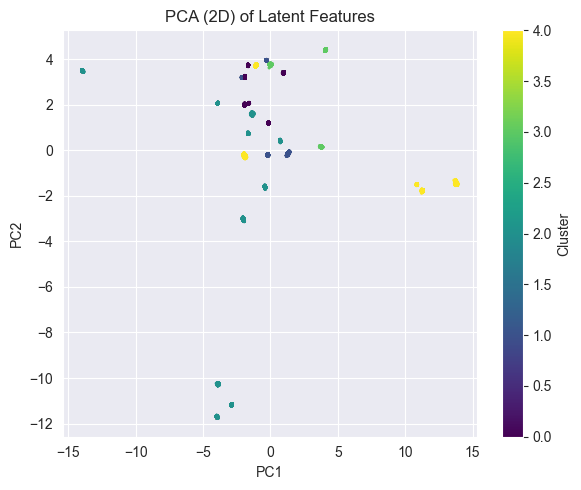

PCA complete.

[Step 4] Mapping sample points from each cluster...


C:\Users\jmm267\AppData\Local\Temp\ipykernel_8132\1106293581.py:85: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled = combined_df.groupby("cluster_label").apply(lambda df: df.sample(min(20, len(df)))).reset_index(drop=True)


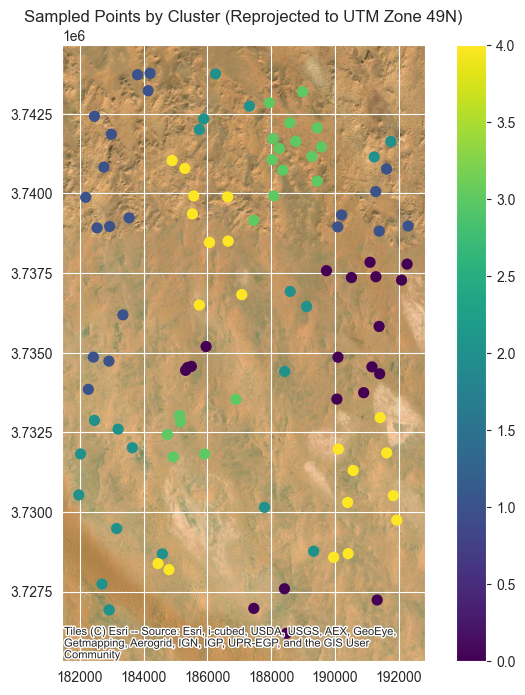

Mapping complete.


In [1]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# For mapping
import geopandas as gpd
import contextily as ctx
import torch

###############################################################################
# Check for GPU (CUDA) for any PyTorch operations
###############################################################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU Name:", torch.cuda.get_device_name())

###############################################################################
# 1. Read the three CSV parts and combine them
###############################################################################
print("\n[Step 1] Reading and combining CSV parts...")
csv_paths = [
    r"C:\Users\jmm267\Downloads\Binbin\combined_DEC_clustered_part1.csv",
    r"C:\Users\jmm267\Downloads\Binbin\combined_DEC_clustered_part2.csv",
    r"C:\Users\jmm267\Downloads\Binbin\combined_DEC_clustered_part3.csv"
]

dfs = []
for path in tqdm(csv_paths, desc="Reading CSV parts"):
    df = pd.read_csv(path)
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
print("Combined latent features shape:", combined_df.shape)

###############################################################################
# 2. Cluster Counts and Average Latent Feature Trends per Cluster
###############################################################################
print("\n[Step 2] Analyzing cluster counts and per‑cluster averages...")
cluster_counts = combined_df["cluster_label"].value_counts().sort_index()
print("\nCluster counts:")
print(cluster_counts)

# The latent features are assumed to be in columns "0" through "19" (as strings)
latent_cols = [str(i) for i in range(20)]
avg_latents = combined_df.groupby("cluster_label")[latent_cols].mean()
print("\nPer‑cluster average latent features (proxy for trends):")
print(avg_latents)

###############################################################################
# 3. Dimensionality Reduction & Visualization: PCA, UMAP, t-SNE
###############################################################################
print("\n[Step 3] Running dimensionality reduction on latent features...")
X = combined_df[latent_cols].values.astype("float32")
labels = combined_df["cluster_label"].values

# PCA (CPU)
print("Running PCA on CPU...")
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X)
plt.figure(figsize=(6,5))
plt.title("PCA (2D) of Latent Features")
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels, cmap='viridis', s=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()
print("PCA complete.")



###############################################################################
# 4. Map Samples from Each Cluster Using ESRI World Imagery
###############################################################################
print("\n[Step 4] Mapping sample points from each cluster...")
# Sample 20 points per cluster (or fewer if not enough)
sampled = combined_df.groupby("cluster_label").apply(lambda df: df.sample(min(20, len(df)))).reset_index(drop=True)
gdf = gpd.GeoDataFrame(sampled, geometry=gpd.points_from_xy(sampled["longitude"], sampled["latitude"]), crs="EPSG:4326")
# Reproject to UTM Zone 49N (EPSG:32649) for China
gdf_utm = gdf.to_crs("EPSG:32649")
fig, ax = plt.subplots(figsize=(8, 8))
gdf_utm.plot(ax=ax, column="cluster_label", cmap="viridis", markersize=50, legend=True)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
ax.set_title("Sampled Points by Cluster (Reprojected to UTM Zone 49N)")
plt.show()
print("Mapping complete.")

###############################################################################
# 5. (Optional) Save Combined Results
###############################################################################
# Uncomment to save the combined DEC clustering result
# output_csv = r"C:\Users\jmm267\Downloads\Binbin\combined_DEC_clustered.csv"
# combined_df.to_csv(output_csv, index=False)
# print(f"Combined DEC clustering result saved to: {output_csv}")


Mapping our groundtruth data